In [40]:
!git clone https://huggingface.co/microsoft/trocr-large-handwritten

fatal: destination path 'trocr-large-handwritten' already exists and is not an empty directory.


In [74]:
#wget csak linuxon műkszik
%wget "https://huggingface.co/datasets/yuntian-deng/im2latex-100k/resolve/main/data/train-00000-of-00001-93885635ef7c6898.parquet"

UsageError: Line magic function `%wget` not found.


import cv2
import matplotlib.pyplot as plt
i

In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import cv2
import numpy as np
import matplotlib.pyplot as plt

def OCR(row):
    print(row["image"]["bytes"])
    nparr = np.fromstring(row["image"]["bytes"], np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
    model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')
    plt.figure(figsize=(10,10)); plt.axis('off'); plt.imshow(img)
    plt.show()
    pixel_values = processor(images=img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_text)
    return generated_text

C:\Users\csabe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

df = pd.read_parquet("./train-00000-of-00001-93885635ef7c6898.parquet")
df

formula        filename  \
0      \widetilde \gamma _ { \mathrm { h o p f } } \s...  66667cee5b.png   
1      ( { \cal L } _ { a } g ) _ { i j } = 0 , \ \ \...  1cbb05a562.png   
2      S _ { s t a t } = 2 \pi \sqrt { N _ { 5 } ^ { ...  ed164cc822.png   
3      \hat { N } _ { 3 } = \sum \sp f _ { j = 1 } a ...  e265f9dc6b.png   
4      \, ^ { * } d \, ^ { * } H = \kappa \, ^ { * } ...  242a58bc3a.png   
...                                                  ...             ...   
55028  \epsilon ^ { a _ { + } } ( x ) T ^ { a _ { + }...  17f012d3b9.png   
55029  G = d U ^ { 1 } d V ^ { 1 } + d U ^ { 2 } d V ...  1bcd3aca22.png   
55030  \psi * \chi \equiv V _ { ( \infty , - 1 ) } ^ ...  4716707d22.png   
55031  D ^ { \prime \prime } = D ^ { \prime } D + \xi...  49efc685a3.png   
55032  \Psi [ A _ { i } ^ { a } ] \rightarrow \Psi [ ...  3bb015355b.png   

                                                   image  
0      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
1      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
2      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
3      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
4      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
...                                                  ...  
55028  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
55029  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
55030  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
55031  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  
55032  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  

[55033 rows x 3 columns]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x15\xa9IDATx\x9c\xed\x9d{tSU\xf6\xc7\xcf}%m\x9a\x96\x16J\x11\xe9\x02d\xd4QX\xcb\x07\xd0\xf2\x18\n\xf4\x05M\xd3\xc7\xa2R\xd6\xa0\x03"\xb3\xc0\x91\x87R\x0b\x82\x94\xda\x96\x0e\xaf\xe88\xa08\xb3\xc6\xaa\x0b\x17*\x8cUK\x1f\xa1`m\x8b\xa5\x05Gp\x1c\x99\xa5.\x9dA\x1c\xb4v\x9a6\xcd\xaby\xde\xdcs~\x7fl{\'\xa4M(\xa5\xd5_\xe0|\xfe\x80\xe4\xe6\xdc{\xf7M\xcf\xf7\xee\xb3\xf7\xd9\xe7\x86!\x84 \n\x85\x12\x9a\xb0?\xb7\x017\x0e\x84\x90a\xb9\x1b\xd2[*e\xf00\xb4\xbb\x0c\x0b\x84\x10\x86a~n+(7\x1d\xd4\x03\x0f\x03\xb2z\xedv\xfb\xf5\x1f\xaa\xa3\xa3\x03!\x841\x96\xef\xad\x18cQ\x14%I\xf2z\xbd^\xafW\x92\xa4\xeb<\x0b\xe5\x86\x81\n\xf8z!\x84H\x92D\x08\x991c\xc6\x1f\xfe\xf0\x07\x84\x90(\x8aC;\x14\xc6X\x92\xa4u\xeb\xd6\xa5\xa6\xa6\xb2,\x8b1\x86\xed,\xcb\n\x82\xc0q\x1c\xcf\xf3<\xcfs\x1c7l\xd6SB\x1c:\x84\xbe^$I\xe28n\xf1\xe2\xc5V\xab\xb5\xa1\xa1A\xa5R1\x0c3\xb4\xe14D\xd1n\xb7{\xd6\xacYO?\xfd\xf4\xf2\xe5\xcbEQ\x14\x04\

C:\Users\csabe\AppData\Local\Temp\ipykernel_2304\3409876232.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(row["image"]["bytes"], np.uint8)
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


C:\Users\csabe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


shape # An year
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x10\xb4IDATx\x9c\xed\x9c{L\x14\xd7\x17\xc7\xef\xcc\xec\xec\xb2\xc0"\x8fb-\x95?\xd4\xc4h\xa8\xad\x8a\rX\x95\xa0\x08V\x8b\xc6\xb4\xc6\xd4\xd8\xa8\x91\x18_\xa8T\xa5F\x0b\x02\x82\xa6\xd2\x1aE[\x1b\x13\x9aX\x9bh|\xb7.\x8a<\x04\xb4B5\xa1\x7f4\xfeaL\x93\xda6V\x8a\x0b\xeck\x96\xdd\x9d\xd7\xf9\xfdq\xba\xe3\nB\x01Y\x9a\xf9y?\x7f\x90\xdd\xbb3\xf7q\xee\xfd\xde{\xe7\x9e30\x00@(\x14\x8a>a\x9f\x9b\x1a"U\xbfT\x93\x05\x00\x8cX{_*\xc3R\x82az\xf7\xbd\xaa\xaa,\xfb|a\x13B\x00@\x96e\x96e9\x8e\x0bq\xddt\x0c\x000\x0c\xd3\xcf\xaf\xaa\xaa\xaa\xaaj0\x18\xfa\xb9,\xf8z\xed3^\xdf;\x85\xf2r\xd2S\xa8\xa8\xde\xee\xeenUU{\xfc\x84\x83\x86a\x18\x9e\xe79\x8e\xeb}A\xff\x00@[[\x1b\x161\xc2+\x86\xa2(\xb2,\xcb\xb2,I\xd2\x08\x14\xad\xa9\xd7\xe3\xf1\xf4\xfeUUU\x86a8\x8e\xe3y~\x80\xdac\x82xn\xca\xe3\xc7\x8f\xc9\x7fa\xd8\xde\x00\x80$IhjEQ\xfe\xdb\xca\xbc\x0c<#`EQX\x96\xbd|\xf9\xf2\xb8q\xe3\xba\xbb\xbb\x837\x81\xda

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


( Ladies #O, ( LaHickshire # O.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1a*IDATx\x9c\xed\\{PT\xd7\xfd?{\xf7\xc5\xf2\x10\x11\x04y\t\xc1\x19b:\x89h\x08\xe2\x03# AR\x89A\xcc\xc4\xaa5v\xaa\xa2\xb8 OA\x01y\x1aL\x8c`\xa36\xa9\x99\x98\t\xa6q\x0c\x15\xa8"`\x04\x01\x11\xa5\xad\xc9\x1f\xcdL\xdbL+4\xad\x91\xba\xc0.\xcb\xee\xb2\xbbw\xef\xe3\xfc\xfe\xf8\x96\xfb\xbb\xee\x02\x02\xa2\xb8\xf5~\xfe`\x96\xbb\xf7\x9e\xf3=\xe7|\xdf\xdf\xef]\x11\xc6\x18\t\x10 \xc0>!\x99i\x02\x9e\x16\x08\x8a\xcc\x16"\x91h\xa6I\x10\xf0\x10\x08\x02\x8c\x10B,\xcb\x12\x041\xd3T\x08\x100i\x88\x04\xcb\x03\xd0\xeb\xf5\x14E\x89D\xc2\x86 \xd8\x04\x91H4{\xf6l\xc1\x08?\xe5x\xd6-0\xc30b\xb1\xf8\xea\xd5\xab\xdb\xb7o\x97\xc9d\x0c\xc3\xcc4E3\x0f\x10`\x17\x17\x97\xdb\xb7o;;;\x830\xcf4Q\x02F\xc7\xb3np(\x8a"\x08b\xe7\xce\x9d\x0e\x0e\x0e\xe5\xe5\xe5\x14EI$\x93Pj4M\x8fz\xffX\xd7\'\x0e\x86aD"\x91\xadc\xcf\xb2,\xc6X,\x16?\xca\xe0\xe3\x93=\x11\x0b\xfc?&\xd5\xf6\xbb\x9cgZ\x80\xe1\xd8H\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


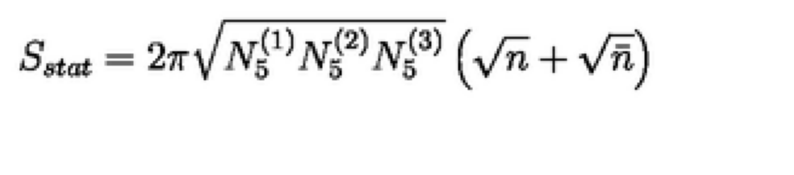

Sstat - 2TVNOUS (NOUS ( VN-Vr. )
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0e!IDATx\x9c\xed\x9dkL[\xe5\x1f\xc7\x9f\xd3\xd3\xd2\x02\x05\xb7F\x04\xb6U]\x16\\\xe6\x921\x89S\xbbQ\x1c\x82\xd2M@;ML\xf6N\x9d\xf1\xc2\xd0\r\xc3\xe6\x9clh\xda9\xb20f\xc8\x1c\x19\xbe0\x9a\x054\x83\x11\nSd\x8c\x84\x89\xba\x99\x90%\xc6\xbd\xd1\xb9\xe8\xc2\xc2\xa5-\xa57\xda\x9e\xf3\x9c\xe7\xff\xe2\xf7\xa7\x96\x02\x05\xc7\xb6\x1e\xb6\xdf\xe7Uyz.\xbfC\xfa=\xbf\xcbs\xe3\x18c\x04A\x90\xc5\x89"\xde\x06\xfc\x07\xf0]\x83 Q,\x0e\x01\x83t9\x8e\x93$)\xde\xb6 \x88\x8cX\x04\x02f\x8cq\x1cG\x08\xf1x<\n\xc5"0\x18A\xee\x18r\xd7\x03cL\x92$\x8f\xc7S\\\\\x9c\x9e\x9e\xde\xdd\xddM\x08\xa1\x94\xc6\xdb.\x04\x91\x05r\x17\xb0(\x8a<\xcf\xd7\xd7\xd7wvv\xaa\xd5\xea\xbe\xbe>B\x08\x06\xd2\x08\x02p2\xaf\x0c\x85B!\x9f\xcf\xb7w\xef^J\xe9\x07\x1f|\xb0l\xd9\xb2\xe4\xe4\xe4x\x1b\x85 rA\x19o\x03f\x05R\xdf`0\xb8q\xe3\xc6?\xff\xfc\x93\xe38Q\x14\xbf\xf8\xe2\x0bI\x920\x13F\x10@\xd6\x1e\x18l\x1b\x1

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


No-Eajas.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0bOIDATx\x9c\xed\xdbmL\x1c\xc5\x1f\x07\xf0\xd9\xdd{\xda\x03\x02\xd7^\x044TS\x9b\x94\xfa\x02\xd3\x17\xd5\x8a\xd0\x08\xa6\xa9E@I\x93&\x9aH\x0c\x1ai$Z\x81RH\tUl(\xa9\xd2V\x13_\xa0\x06k4\xc6\xbeh\x831B.\xb4\x94\xb3%PmLxa419kjR\x81K\xef\xb8;\xeea\x1ff\xc6\x17?\xbb\xde\xff\x1e(\xa5\xed\xbf]\xf9}^4\xed0;;\xb3\xdd\xef\xee\xce\xec"p\xce\tB\xc8\x9c\xc4\xf4\xa2\x95E\xda\x14\x17\x02St\x12\xa1\xe5\x13\x92\xcfi\xce\xb9 \x08K\xd4f\x8cQJ\t!\x92$\x89\xa2x\xc3\xad\x8c\xfa\xc0j\xb5\xa6\x94$\xb7sG\xadlh\x06]\xd7-\x16\xcb\x9d\xe8\xd8\xdd: \xe8\xbfAH\xb9)QJc\xb1\x98,\xcb7u\xbe\xael\xab\xff3St\x12\xa1\x9b\xf2o\x80)\xa5\xaa\xaaZ,\x96G\x1f}\xf4\x97_~I\xa9G)\x95$itt\xd4\xe3\xf1\xacY\xb3f\xdb\xb6m\xd5\xd5\xd5\x8c1\xcey\xc6\xad\xa0\xfe\xc8\xc8\x88\xd7\xeb\xcd\xcf\xcf_XX\xa0\x94\x1e?~\xdc\xe3\xf1|\xfb\xed\xb7\xc5\xc5\xc5\xb1X,\x12\x89\xd4\xd4\xd4\xd4\xd4\xd4@\xe5;7\xc8\x15\x0c-\xb9K\x89Dbhh\xe8\x95W^q8\x1c\xb7\xb

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


" A "H - K "DQ - JB.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0e\\IDATx\x9c\xed\x9cYp\x14\xd5\xf7\xc7oo\xb3\x00\t\xce\xa4\x08\x01\x15\xa1p)\x11\x89\x92\x05\n+\x06B\x04L!\x10S.U>\x11+U\xcab4\x0b\x91\x90\x81\x90\n\x9a\xbd\x88\x14\x94U*.\x85K\x12R\x9aDLAb\x84\x8a\x88\x80\xfb\x8b\xcb\x03\xbe \nIf&\xcc\xde\xdd\xb7\xef\xff\xe1\xfc\xd24\xc9dQ"\x7fZ\xce\xe7!\xd5\xd3s\xfb\xf6\xb9\x9d\xfb\xbd\xe7\xde{N\x0f\xc7\x18#\x08\x82\x98\x13~\xb2*b\x8c\xe1X\xa0\x83\x8f\x02\xb9>pQ\xbb\x1a\xa5T\xd34B\x08\xcf\xf3\x82 \x8c[\x0bc\x8c\xe3\xb8\x91\'G\xbd+\xc7\x19\xaf\x1ay0Z\x9d\xd7\x81\xa8\xc6L\xa4<\x19j2|\xd44\x8d\xe7\'m|D\x90\xa8D\x110\xa5t"\xa2\xd5\xd1{p \x10\x98:u\xea\x04\xaf\xbaq\xfa\xb7\xa2(\x82 \x801\x93b\x95\xc7\xe3\x11E1&&f\xd2\xc7 \xc6\x98\xaa\xaa\x1c\xc71\xc6&8\xb6"\xffm\x86wVM\xd3\x04Ahoo\xdf\xb2e\xcb\x96-[Z[[\xe1\xfch\xee\x941F)e\x8c%%%\xd5\xd7\xd7\x13B\x14E\x81\xf3^\xaf\xf7\xf2\xe5\xcb~\xbf\xdf\xe3\xf1\xb8\xddn\x8f\xc7\xe3\xf1x\x06\x07\x07\xfd~?\xf4\xbfp8\x0c

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


on ( Free-either ) # O.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x14\xc6IDATx\x9c\xed\x9dip\x14\xc5\x17\xc0{\x8e\xcd\xee\xe6"\xd9p(\t\x91\x94R \x14P\trDX\x08\x81 T\x02\x84\xa3\xb0\x80\x12P\x0b\x90\xfb\x08\x12R\xffp\x932\\\x91\x18@)D\xaa\x10\xd1\x0f\x86\xc4\xdc@\x08\x16`\xc4B\xd4\xb2\xa4D\xe5\xb0(9r\xedfw\xb3\xc7\xcc\xcet\xff?<3,96KN6\xf6\xef\xd3\xd6\xeeLO\xf7\x9b\xf7\xe6\xbd~\xfdz\x96!\x84 \n\x85\xe2\x9d\xf0]\xdd\x81\x8e\xc5\xf5\xf1\xc40L\x17\xf6\x84B\xe9\x08\x18\xea\x81)\x14\xef\xa5;{`\x8c\xf1\xfd\xfb\xf7u:\x9d\xddn\xb7\xd9l\xfd\xfb\xf7\xa7N\x98\xd2\xcd`\xbb\xba\x03\x1d\x88$Iyyy\xfd\xfa\xf5{\xe7\x9dw\n\x0b\x0b\x1d\x0eGW\xf7\xe8y\x81\x86]\xdd\x86n\x1bB\x13B\x18\x86!\x84\xb0,\xbbw\xef\xde\xcd\x9b7K\x92\xc4\xf3\xdd9\xe2\xf0\x04Y\x969\x8e\xeb\xea^P\xda\x8dn\xeb\x81%IB\x08\xed\xde\xbd\x1b!\xb4t\xe9RY\x96Y\x96\xc5\x18wu\xbf\xba\x18\xb0^\x93\xc9\xd4\xd5\x1d\xa1\xb4\x0f\xdd\xd6\x80\x11B\x84\x10\xb3\xd9\xacV\xab}}}\xd9z\xba\xbaS]\x03!\x04c\\SS\xf3\xc5\x17_\

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pula : Pum )


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x11\xe8IDATx\x9c\xed\x9dyLT\xd7\xf7\xc0\xcf[fc\x06P\xa0Z\xad[\xaai\xfa\x87\rnh\x84\x86:\x8c\x80\xa5\xa2\xa4\x1a4\xe9\x92\x14\xad6\xa2\x88"\nE\x8b\xbb\xc0\x17T\xdc\x92jklSm-\x86\xb2\xb7\x82\x02\nHc\xffh\xff1]b\xdb4j\x94 \xfb\xeco\xb9\xbf?\x8e\xf3~S\x10\x8a0\x0c\x8e\xde\xcf_\xc3{\xbc{\xcf\xbb\xb9\xe7\x9e{\xcf=\xf7<\x86\x10\x02\x14\n\xc57aG\xabbB\x08\x1d;\xfa\x836\x0ee\x900\xa3\xd2Q\x08!\x0c\xc3x\xbf^\xdf\x82\xb6\x12\xe5?\x19\x05\x0b\xac\xf4K\x8b\xc5\xe2\xf1\x92\x05\x17O\x8f\x05\x1b\x82T\xd82\x0c3:\xc3+\xc5\x87\xf0\xb6\x02+\xda;g\xce\x9c\x82\x82\x02\x00\x10\x04\xc1\x83%\xab\\0\x0c#\xcb\xb2GJ\xf6\xa6T\xd8\x1a\x05\x05\x05\x0b\x16,\x00\x00I\x92\xa8\x0eS\x06\xc0\xabc<!D\x92$A\x10\x96.]j\xb3\xd9\xaa\xab\xab\xfd\xfc\xfc\x18\x86\x19\xfeD\x11\xf5D\x10\x84\xcc\xccL\xbb\xdd\xae\xd1h233CBB<"\xb67\xa5"\x84\xc8\xb2l\xb3\xd9\xe6\xcf\x9f?a\xc2\x84\xabW\xafJ\x92\xc4q\x9c\xd7d\xa6\xf8\x16^\xb5\xc0\xa2(\xf

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


exp ( any man )
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\n\xd3IDATx\x9c\xed\x9c_L\x93\xe7\x17\xc7\x9f\xe7}\xfb\xf2\x16%-\xc4d[\xc4\x1b\xe3H\x08\x9b:\xa7\x186\xcd\xc0a\r\x032\xcd\x12\x8d.\xce\xbb%Kj\x16\xb7\xc1\xfeD\xa04\x1a\xa3\x06\xbc0Y\xb2\x8b\x91e.\x99a\x0bS*\x88\xc6\xa2\x04u\x89q^\xe8n\x96E\xe3\x8ds\x86?mi)\x85\xf7\xcfs~\x17\xe7\xe7k-\xe8\x00\x01}\xe0|\xaeJ\xdf\xe7\xcf9\xe5|\x9f\xf3\xfck9\x000\x82 \xe4Dy\xde\x06L\x19\x00\x98\xfc\xa0#\xd7\xf04\x8f]#f\t>a\x1cd\xbc\xc99\x9f\x03S&\xd3)\x00L\xd5\x18!\x84\xa2\xcc\xee8e\xdb6cLU\xd5\'\x15\x90\xd75\xe2\x05g\xe2\x7f?\x7f\x9c\xb91\xe5?;uB<\x99L>\xbd)\x14L4\x1aM$\x12\x8a\xa2\xccv\xb2RU\xf5)\xeae2\xbbF\xbc\xe0L `\x00\x88\xc5b\xf1x|xx8\x1a\x8dF\xa3\xd19\x88\x12\x00\x88F\xa3\x91H$\x1e\x8f\xc7b\xb1H$\x92J\xa52\n\xd8\xb6\r\x00k\xd7\xaemnnf\x8c\x99\xa6\xf9\xa4\xd6\x84\x10\x00p\xeb\xd6\xad\x97_~\xf9\xf2\xe5\xcb\x9csL\x923\x0ev\x14\n\x85zzz\xd0\xc2\xf1e$u\x8d\x90\x03H\x03\x83#\x91H\x14\x14\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Lo # FW ) # AP ( W.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0f\xaeIDATx\x9c\xed\x9c{l\x14\xd5\x17\xc7\xef\x9d\xd9\xd9\xeevi\xa1%b\xec"\xd5\x98\x80\xc4\x17\x11\xb5\xad\xf4E\xd9v\xa5\xb1\x04\x05\x12\xa3h\x82Z\x83\x16\xacX\x08\x01ZX\xa0@\x08\xa0PmS\xc0\x04\x10\xf1\x85tkK\x8b\xe9\x03y\x94\n\xa8\x89\xf1\x1f\x13\x8d\x9a\x18l\xa0\xb4\xbblw;\xbb\xb3\xf3\xb8\xbf?\x0e\x1d\xb6\xbbm\xc1\x1f\xa2\x8c=\x9f?\xc8\xf6\xee\xcc\x9d{/\xe7{\xcf\xb9\xe7\xdeY\xca\x18#\x08\x82\x18\x13n\xb8/F\xb3\xb0Gs\xdf\x11c1\xb4\x80UU\xa5\x94\xfe\xc3M\xb9}\xa0\x94j\x9a\xf6o\xb7\x02A\xae\xcf\xd0\x02\xe6y\xde\xef\xf7{\xbd^2\xfa\xdc\x91\xa6i\xa2(r\x1c\xa7\xaa\xea\xbf\xdd\x16\x04\xb9\x0e\xd1\x02\x06\xabmjj\xba\xeb\xae\xbb~\xfc\xf1G\xc6\xd8\x7f\xde\x17\xa9\xaa\xaa(\x8a\xa2(\x9a\xa61\xc6DQ\xbc\xf7\xde{\xeb\xea\xeax\x9eG\r#\xb794\xd2\xc1\x82V%I\x8a\x8f\x8f\xff\xfc\xf3\xcf\x17,X\xa0\xaa*\xcf\xf3\xff^\xf3n9\x9a\xa6q\xdc\xb5YL\x96eA\x10\xea\xea\xea\x16,X\xd0\xd8\xd8XXX\xf

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


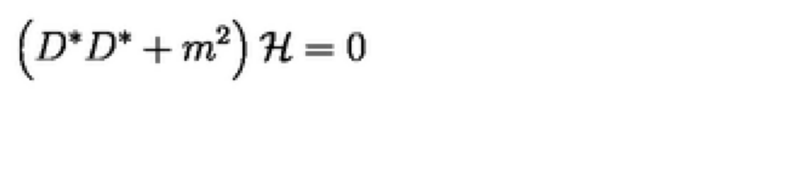

( DOD "M? ) H-O #


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0e\x07IDATx\x9c\xed\x9d[L\x14\xf7\x17\xc7\xcf\xfcff\xd9\x0b\xbb\x0bBK#\x95\x96\xd6\x87\xa6\xda*A\x84\x02\xa2`\x89\xae\x8bFm\xda\xda\x97&\x10\xdb4\xd0TC\xad\x92\x10\xe4f\xdbX#\xa9\x96\xf4bM}\xab\xa5\xad\xb5\xb5\xcb\x82\x16\x12\xb4j\x83\x86h\x9f\xf4\xc1\xb6\xb6\x88\xd6\xc0\xc2\xc2\xec\xb2\x97\xb9\xfc\xfe\x0f\xbf\xb0"7/Pv\x97\xff\xf9<\xed\xce\xce\xcc\x9e_2\xdf\xdf9s\xe6w\xcep\x94R@\x10$:\x11\xa6\xfey2ys\x1c7~\x9f\xd1\x1b#\x931\xc3\x89|\x83\x11dj8\xf4\xc0\x08\x12\xbdL\xe5\x81)\xa5n\xb7\x9bRj0\x18(\xa5~\xbf_\x14EJ\xa9\xa6iV\xab\x95\xb9/Ji\x7f\x7f\xbfN\xa7\x03\x00A\x10\x0c\x06\xc3,\x19\xfe\xe0\x84\x86#\x08\x82\xa6i\x9a\xa6\x19\x0c\x86H6\x18A\xee\t\x99p+s\xcb\x1e\x8f\'\'\'\'--\xed\xb9\xe7\x9e\xdb\xb7o\xdf\x92%KRSS\x17,X\x90\x95\x95\xe5\xf5z\xd9\x9e\x1e\x8f\xe7\xc5\x17_\\\xb0`\xc1c\x8f=\xf6\xd9g\x9fQJ\x15E\x99=\xf3\xef\x0f6\x1cI\x92222\x9e\x7f\xfe\xf9\x94\x94\x94\xc5\x8b\x17/Z\xb4\xe8\xe0\xc1

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Download as PDOD
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x08\xacIDATx\x9c\xed\xdc\xdfK\x14\xdf\x1b\x07\xf0svvd\x16w\xd7\x95\x02\xb3H3\x95\xfe\x00\xa3\xab,o\n2\xbbJ\x04Y\x84\xa8\xc4\xec\xa2\xb4\xcc$\xcb\n,\xc8\xd2\xc2.\nC#\xab\x0b/\x92B\xa3_\x82\x99\x04e\xde\x15\x04\x11T\x04\x9a\xe9\xec\xae\xeb\xce\xec\xee\xec\xcc<\x9f\x8bc\xf35w[\xd7\xcct\xfa>\xaf\x0b\xd1\xd9\xd9}\xce\xc8\xbc\xe7\x9c3?\x96\x02\x00A\x08\x99\x93e\xa9\x1b\xb0\\\xe0\x81\x0c\x99\x915\xf1U\x01@UUJ)!\xc4j\x9d\xc7\x1b\x97?]\xd7-\x16<\x96!\xf3\xa1\t\xf6<\x00\xc0\xa2\xfb\xefa\x9b&\xcb\xb2 \x08\x18cd.\t\xed\xafl\x17\xd74\xed\xc4\x89\x13\xad\xad\xad\x97/_\x0e\x85B\x8b\xdd\xb2\xdf\xa3\xaa\xea\xbc\xd6\xd74\x8dR\xfa\xfc\xf9\xf3\x9c\x9c\x1cI\x92\x08\x8e\xa5\x91\xa9\xcc\x1d`\x00\x00\x00I\x92\xb6m\xdb688\xe8p8\x8e\x1c9\x12\x0c\x06\xc9\xb2\xdc\xd7\xe75\xb6g\xed\x97$\xa9\xae\xaentt\xf4\x1f\x9b\x17\xa0\xff\x07\xb3wY6\xd1%\x84X\xadV]\xd7u]\xd74M\x10\x84\x96\x96\x96\xfe\xfe~\x00\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


safe - Dept Age -


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x10\tIDATx\x9c\xed\x9dyLT\xd7\xf7\xc0\xef}o\xde\xcc\x00\x0e0\xe0P\xd1\x10\xd1\xa6\x85\xb4\xb1\xe2\x16\xad\x94\x12A\x10j\x1b\x05\x89\xd6.&m\\\x12\xc1\xd6\x05m\x05\xad\x8ab5\x16\xdb\xd4\xbatI\x95\xb4\xc5\x1a\x12\xd4\x14\xea\x06\x185)X\xabi\xf0\x8fR\xa2\xad\xad#\n\x03\xc3l\xcc\xf6\x96\xfb\xfb\xe3|\x99\xce\x0f\x10Pg\xde0z?\x7f\x98\xe1\xcd\x9bw\xce\x8c\xef\xdcs\xee=\xe7\x9e\x87\t!\x88B\xa1\x04\'L\xa0\x15\xa0\xf4\x0f!\x84\x8e\xad\x94A\xa1\x06<\x1c\x91$\tc\x8c1F\x08\x89\xa2\x18hu(\xc3\x17\x1c\xc0a^\x14EI\x92\x18\x86a\x18\x06^\xc0-\xebo\x08!\xa2(*\x14\n\x19d\r\xa0\xc3\xfd\xde\x82\x1f\xc1h4\xba\\\xae\xd8\xd8X\x19\x95\xa2\x04\x1f\x81\xf1\xc0\x92$!\x84X\x96\xe58\x8eeY\x8c1\xfc+\x8ft\x8cq`\xad\x17t\xb8\x1f\x08\xa1\xea\xea\xea\xcc\xcc\xcc\xfc\xfc\xfc\xd4\xd4\xd4\xda\xdaZ\x18\xe9\x02\xab0ex\x12\x00\x03&\x840\x0c\x83\x10:~\xfc\xf8\xaaU\xab\xaa\xaa\xaa\x10B\x97.]\xea\xea\xea\x92A\xb4$I\x16\x8b\xa5\xac

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


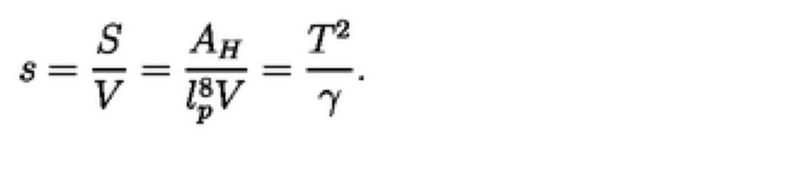

s-# #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1b\xebIDATx\x9c\xed\x9dyPTW\xd6\xc0\xef[\x9a^\xe8f\xd5D\xc5%\x9ar\xc3,\n.!(iY\x1a\xc5\xe8\xb8O\x95q\x8c3\xa3\x12\x13)\x11\x14\x89 \xe2\x82\xcb\x04\xd0$ejt\xccL$Fkt\xdc@\x14\x05\x154\xce\xa4\x9cd\xa6f2S\xa9$\x96\xc9\x8c(J\xd3+\xf4\xf2\xfa\xf5{\xf7\xfb\xe3T\xbfyv7M\x83\xb4J\xbe\xf7\xfbC\xe9\xc7{\xf7\xdd{\xee9\xe7\x9e{\xee\xbd\r\x811F\x12\x12\x12}\x13\xf2IW@\xa2k0\xc6O\x83\x9f}J\xaa!!\x86\x90\xba\xe4)\x87\xe7y\x92\x94\xfc\xac\x84\x7f$\x03\xee\x03ttt`\x8c\xe5ryXX\xd8\xe3\x7f;h\x08A\x10\x16\x8b\x85\xa6i\x95JE\x10\xc4\xe3\xaf\x86\x84_$\xd7\x1e\x12\xb0\x87G)\x84\xe38\x8cqSS\xd3\xc8\x91#\x07\x0e\x1c\xf8\xde{\xef!\x84X\x96\xed\xa5:\x06\x0b\xc6\x98 \x88\x05\x0b\x16<\xf7\xdcs#G\x8e\xec\xe8\xe8@\x1e\xab\x96x\xe2H\x06\xdc\xfb\xf0<Ox\xe0y\xfeQ\x8a"\x08"??\x7f\xce\x9c9\x1a\x8d\x86a\x98\xde\xaaa\xf0p\x1cG\x92d]]\xdd\x8d\x1b7\x96.]j\xb1X(\x8az\xfc\xd5\x90\xe8\x0c)\x84\x0e\tmmm\x16\x8b\xa5\x7f\xf

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


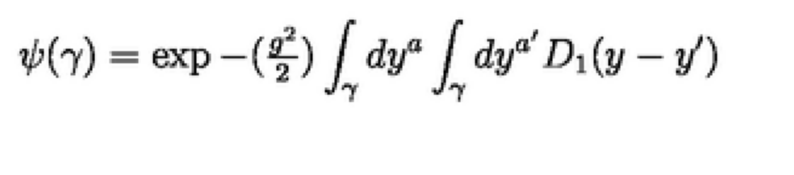

w (s ) - exp- ( " ( gave that'd, (y - y )
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0f\xe1IDATx\x9c\xed\x9d{L\x14\xd7\x17\xc7\xef\xcc\xce\xb8\x0f\x1eE\xec\xae\x04\x9b\xd6\xd8\xf4\x914\xb5\x85\xa0\x82\x02"\x14\xec"X\x1f\xa5&6$\xd8\x84\xda\x16\xaaQP\x1bKA\x14\xa9\x98\xe2\x1f\x12\xdb\xd4Z\xdb\xa6\xdaZ(\x89\xc8\xae\xa0<\x14\x14mK\x9a\xda4\x956\x11\xfe\xb0\x8d\xca\x02+\xec\xb2\x8f\x99\xd9\x99\xfb\xfb\xe3\xfc\x18W\x96]\x11\x8b\xeb\xc2\xfd\xfc\x05g^\xf7\x0e\xf3\x9ds\xef9g.\x14\xc6\x18\x11\x08\x84\xc0\x84\xf6w\x03\x08\x08!\x841&oR\xc2\x04 \x02\xf63\xa0[\x8a\xa2(\x8ar\xb9\\D\xc6\x84\xfb\x82\x08\xd8\x9f`\x8c)\x8aB\x08\xdd\xbcy\xd3j\xb52\x0c\x03\xbf\x12\x08\xe3\x84\x08\xd8o\xc0\xb0\xd9j\xb5\xae[\xb7n\xe3\xc6\x8d\xf3\xe7\xcf/**\x1a\x1e\x1eF#n\x99@\xb8\'\x8c\xbf\x1b0}q\xb9\\,\xcb\x96\x97\x97_\xbe|\xb9\xbb\xbb\xbb\xb9\xb99===88\xf8\x83\x0f>\x80M\xfen !\x00 \x1e\xd8\xcfh4\x9a\xfe\xfe~I\x92\xf4z=\xcb\xb2&\x93\xc9\xdf-"\x04\x12D\xc0\x0f\x0f|7

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


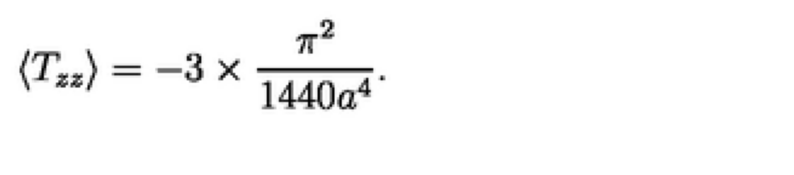

( Inc ) -3x 1440at.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1c5IDATx\x9c\xed]yP\x14W\xfe\x7f\xdd=7\x0crEw\xc55\x1a\xb50\xbb\x1e)T\xa2\x8br&\xca*\x10HV6\x95\xaahb\xd6\xb5@!\xca\x11T\xf0\x00\xa5\x04E\\\x8f`\xaa\x92\x98lP\xac\xc8F\x119\xe5RA\xdc\x8d\x9b\xad\x98\xcd\x1f\xeeVe\xd9\xad\xa8 0\x07s03=\xdd\xfd~\x7f|\x7f\xf4v\x18\x18\x06\x14p\xb4?\x7fX\xe3\xb3\xfb\xf5\xe7\x1d\xdf\xe3}\xdf\xf7=\t\x8c1\x12!B\x84{\x82\x9cl\x02\x8f\x19\xcf\xb8>z\xc6\x9b\xff\x0c\xe2\xe9\x11`\x8c1\xc30\x04AL6\x91\xc9\x01\xcb\xb2\x08\xa1g\xb6\xf9\xcf,\x9e\x1e\x01&\x08B"\x91\x18\x0c\x06\x9b\xcd6\xd9\\&\x01\x14E!\x84\xfa\xfa\xfa&\x9b\x88\x88\t\xc5S"\xc0\x1c\xc7\xfd\xf3\x9f\xff\xdc\xb1c\xc7/~\xf1\x8b\xa3G\x8f"\x84\xecv\xfbd\x93\x9a\x08`\x8c9\x8e\xd3h4\xe7\xce\x9d[\xb9r\xe5\xfc\xf9\xf3\xcdf3\x12}\xe9g\x06O\x89\x00\xdb\xed\xf6\xabW\xaf\xd24m0\x18,\x16\xcbd\xd3\x998`\x8c\t\x82\xb8{\xf7\xee\xdd\xbbw-\x16\x8bF\xa3\x11E\xf7\x99\x82d\xb2\t<\x1e\xc8\xe5\xf2\x94\x94\x1

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


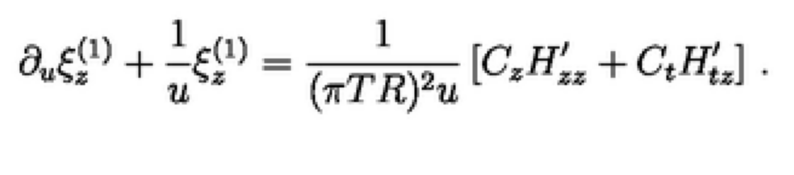

dueEST use # ( TRIREHESS " Or this ).


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1c\xadIDATx\x9c\xed]yT\x14W\xd6\x7f\xb5\xf4F7\x9b\x0b\xf1\x90\x99\x18\x938\x99\x13\xcf\xd1\xc4\x89\x067\x04\xd9\x11c\x8e\xa8\xe36G\x8d\xbb\xe2\x18\x11\xc2\xb0\x88\xa8\xe08n\xa3\x8e:A\x8dK\x8eq_\xc2\xaa\x08\x0cHp\x8dKF\xe3\xc1I\\\x98E\x14d\xeb\xad\xba\xbb\xaa\xab\xde\xf7\xc7\x9d\xae\xaf\xd3\xddt\x9a\xc58$\xf5\xfb\xc3\x03e\xf5\xad\xfb\xee\xf6\xee\xbd\xefVC`\x8c\x91\x04\t\x12\xba\'\xc8\x17\xcd\x80\x04\t\x12:\x8e\x9f\x94\x03\x0b\x82\xf0\xa2Y\x90 \xe1G\xc5O\xca\x81I\x92\xb4Z\xad/\x9a\x0b\t\x12~<\xfcD\x1c\x98\xe7y\x8c\xf1\xc1\x83\x07\xd7\xaf_\x8f\x10\x92\xdcX\xc2\xcf\x04?\x05\x07\x16\x04\x81 \x08A\x10f\xcd\x9ae0\x18\x10BRgN\xc2\xcf\x04\xf4\x8bf\xa0k@\x92dll,B\xc8\xdb\xdb\xfbE\xf3"A\xc2\x8f\x87n\xbf\x03\xf3<O\x92\xe4\x89\x13\'\x9a\x9a\x9a\x94J\xa5\xc9dz\xd1\x1cI\x90\xf0\xe3\xa1{\xef\xc0\x90*744,_\xbe\xfc\xc6\x8d\x1b\x81\x81\x81R\xf2,\xe1g\x85\xee\xbd\x03[\xadV\x8a\xa2233\'O\x9e\x1c\x10\x10 \

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


IPPs - " HADTING. " # " WHAT " I. Adges.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\noIDATx\x9c\xed\xdc_L\x14G\x1c\x07\xf0\xdf\xcc\xecr\x1cx\x07w\xa1\xd0\xb4\xb1\xc4\xfa\xd2Vl\x1bR\xc4\xc2\tH[\xa8\'\xa5M\x9a\xfad\xd4\xe8\x8b\xad6U\x89\x7f\x91"\xd54\x9a\xd8\xda\xd8\x07\xfb\xd0\xd8F\xcb\x8b&\x9a\x1ch\xa2\xf2\'ES\xb5\xa9\xbe\x10#\t\xa6\xa4\t\xa6\x14\x02\xf4\x10\xeenwof\xfa0\xe1\n\x88\xf8\x0f\x0f\xf6\xf8}\x1e\xcc\xb9\x1e\xde\x0c\xd9\xef\xce\xec\xcc\xef\x96H)\x01!dOt\xa6\x1b0\xfd\xf0\x92\x84\xe6\x8e\x84\n0\xe7\x1c\x00\x08!3\xdd\x10\x84\xe2$\xa1\x02\xcc\x18\x03\x80`08\xd3\rA(N\x12!\xc0RJ!D\x7f\x7f\x7f}}\xbd\xcf\xe7{\xe5\x95WFFF\x00\xe7\xd2h\x0eH\x90\x00\x13B::::::\xc2\xe1p\x7f\x7f?F\x17\xcd\x11\xdaL7`\x1aPJ\x01\xa0\xb0\xb0\xb0\xb0\xb0\xd0\xe5r\xdd\xbcyS\xd3\x12\xa1_\x08=T\xe2\x9c\xe8\x86a0\xc6\xd4\r0\x8e\xc0h\x8eH\x84)\xb4B)\xd54M\x8d\xc6\x08\xcd\x11x\xba#dc\x18`\x84l\x0c\x03\x8c\x90\x8dM\x1e`9\xc6\xa4\xc7\xe3\xd2\xb6\xc7#\x84\xe0\x9cSJU%V4\x1a\x9d\xe9\x16!\xf4\xccM\xbe\n\x

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


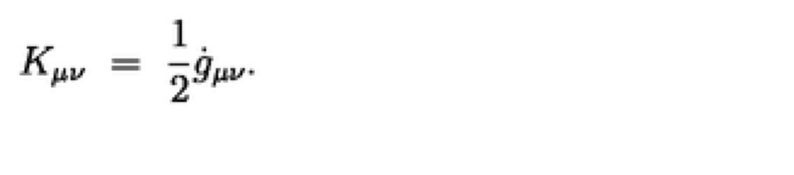

Kpur - Genes


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1e\x94IDATx\x9c\xed]{TSW\xd6?\xb9\xc9%\t\x0f!\xf1A\x01\x15\xcaZ\x83\xf4ag!t\xa4\x02b\x15|\x82\xd0\xbal\x1dGm\xad\xb6N}\r\xf2\x90\x8a \x8a\n\x82\xd2\xd1q\xd4\xa9\xd3Y\xda\xd6:j\x0b\xa2H\x10\x15_u\xdaYU;\xd5y\xb8Z\x07\xbb\xdaQA\x1eI \xaf\x9b\xc7\xbd\xe7\xfbc\xaf\x9c\xef\x9a\x97\x89\x80\x12\x9b\xdf\x1f\xac\x90{\xef\xb9\xfb\x9c}\xf6\xd9\xfb\xec\xbd\xcf\x8e\x00c\x8c|\xf0\xc1\x07\xef\x84\xe8q\x13\xf0\xe4\x83,\x91\x02\x81\xe0\xf1R\xe2\xc3\x93\x07\xeaq\x13\xd0\x97\xc0\x18\x0f4\x83\x82eY\x81\x15\x1c\xc79\xbb\xcdM\xb2\x07Z\xef\x1e\x08w\x08\x1e8\\\x1b dx\x04\x817\x12\xed\x10\x18\xe3\x81\xa9\xe2\xba\xbb\xbbu:]HH\x88\xbf\xbf\x7fo\xda\xe18\x8e\xa2\xbco\xc1uM\xf6\x80\xe5\x9a\xb7\xc0\xfb&\x84C\x90y\xa0\xd3\xe9\xec\xaf\xb2,\xcb\xb2\xac\xb3g9\x8e3\x9b\xcd}N\x12\xcb\xb2\x18\xe3c\xc7\x8e\xbd\xf8\xe2\x8b\xcb\x97/\x0f\x0b\x0bknnF\x081\x0cc\xb1XX\x96\xb5X,\xf0^\x8cqkk+P\xe2l=\x051\xd0\xeb\xf5.\xd4\xb8C`\x8c

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


way # # #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x13\xdcIDATx\x9c\xed\x9d{P\xd4\xd5\x17\xc0\xef\xf7\xb5\x0b,\x0b\xb2\xf9\xf8\xa3\xd4\xb4\xb4)\x1b,1)\x03\x91\xa7\x08\xa9\xa3N\xa3\xceXNc\x99\x8a\xa6-8\x8a\xa0\x80\x8f\xd4~\xa6\xd5\x90\xf6\x9c\x9c\x1e:\xa6\x0e\x8a\xc8\xba\x08\x0c\x9af\x8e6%S\x93\xf6\xd0\x9a(Eby\xec.\xbb\xdf\xfd>\xce\xef\x8f\x13\xdf\xb6\x05\xd6\xd5\x94m\xe5~\xfe`\xf6q\xbf\xdf\xbd\xf7x\xce\xf7\xdcs\xee\xb9W\x06\x00\x08\x85B\tM\xd8`w\xe0/\x00\x80>J\xba\x85J\x86\xe2\x87\xe0\x1b0j\'\xc30\x0c\xc3\x10B\x14E\tv\x8f\xfe+P\xc9P\xaeK\x90\r\x18\x00P;m6\x9b\xcdf#\x84p\x1cG5\x95P\xc9P\x02#\x98\x06\x8c\x1eF\x92\xa4\x193f\xc4\xc6\xc6>\xfa\xe8\xa3iiiUUU\x1c\xc7\xa9\xaa\x1a\xc4\x8e\x05\x1d*\x19J\x80\x04\xd9\x80\x15E\xc9\xc8\xc8\x180`@}}\xfd7\xdf|3\x7f\xfe\xfcI\x93&\xd5\xd4\xd40\x0c\xd3\x97\xbd\r\x95\x0c%@\x82f\xc0\x00\xc0\xb2\xac(\x8auuu\x91\x91\x91&\x93)&&f\xce\x9c9\x82 \x94\x95\x951\x0c\xd3g]\r\x95\x0c%p\x82\x1c\x03\xf3<\xff\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


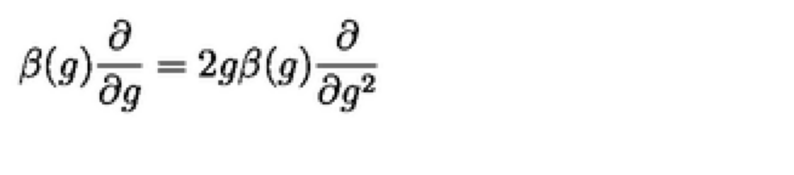

Playing #29019 ago
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x10\xf8IDATx\x9c\xed\x9c{LT\xc7\x17\xc7\xe7\xde\xdd\xbb\x0fv\x17\x16V\xc5b\xd0Zkm\xb51M\xabiRm\x05)\xb5\x0b\x8255>\xb0\x7f\xd8F\xb4>[\x17\x9f\xbc\\\x85@A\x17\x9bh\x8c\xb6\xa1\xc6\xfa\xa8T\xc5\x07\x8f\xaa\xc1\x14CJ\xd5\xda\xda\xa4\xd1\xd8\xa6b[\x05\xc4}\xc1\xee\xb2\xaf\xfb\x98\xdf\x1fG\xeeo\x05Y\x11\xabr\x9b\xf9\xfcA\x96a\xee\xb9s\xe7\x9e\xef\xcc\x999\xb3P\x18cD \x10\xa4\t\xdd\xdb\x1f0\xc6\xff\x01m\xff\x07\x1e\x81@\x08\x03\xd5\xd3\xc51\xc6\x14E\x85\xfe\xca\xf3\xbcXM&\x93\xd14-\x08\x02\xcf\xf3\xa1%\x08!\x96e\xbb\x95<]\x04A\xe8{3B\x9f\x08`\x18\xe6\xdfmL7\xfb\x80\\.\x17{[\xecg\x8a\xa2d2Y\x1f-\x8b\xdd\x8eBz>\xf4v\xf0 \xfd3N\x18\xe0t\x17\xb0\xa8^\x87\xc3\xa1V\xab\xd5j\xf5Sj\xd8\xa3\x02\x0f\xe2\xf5zU*\xd5@\x18M\x1e\x08\xcf\xf3\x8fOW\x8f\xd58\xe1)r\x8f\x80!l\xf6x<\x0b\x16,\xb8x\xf1bss\xf3\xa4I\x93jjj\n\n\nh\x9a\x8e\x8c\x8c\xbc}\xfb\xf6\xb4i\xd3\xd2\xd2\xd2\xaa\xaa\xaa\x1a\x1

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SWEN - AND # BANKP.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x17DIDATx\x9c\xed\x9d{tT\xc5\x19\xc0\xe7\xbe\x92l\x92\xcd\x9a\x15R\x1a9\x1ch\xb4\x1e\xc4\x1a\r\x1c\xe1`B\x88H\xc8\x03\xf1\x01\xda\xd2\x1e+D((\x94\x02\xc1\x10\xd3\x84\x10y(A\xa4\x8a\x82\x18(\x88\x96*\xb6 \xc9\x06\x88!\x89\xa2`Nm\xd0\xe0\xd1\x9e\xb6\x94\x9e\x1c\x81<\xd8\xddlv\xb3\xaf\xfb\x98\xe9\x1f_\xf7\xba\xecn\x96\xcd>b6\xde\xdf\x1f9\xc9\xdd\xbb3\xdf\x9d\xf9\xbe\x99o\xe6\xfb\xe6\x86"\x84 \x05\x05\x85\xe8\x84\xfe\xbe\x05P\x88\x14\x84\x90\xefet\x0e\xa4\xd2\xe1,[tA\x8d\xbcGR@\x08\x11B(\x8a\x1a\xe8#\x84\xd0@\x9f\x86\x05\x8c1M\x0f87\xdcP6\x14a\xf1F\x12a\x98\x81%I\x12\x04!\xf4r\x14\xc2\x85l!V\xab\xd5\xfbS\x8a\xa2\xc2h\x1er\xef\x83\xed\xf5\xf6\xf6Z,\x16\x9a\xa6\x07\x9a\x18\x02\x91-t\xf1\x08!\x82 \x88\xa2(\x08\x82 \x08 \x0c!\xa4\xb3\xb3\x13!\x841\x1e1\xf3VH\x06\x8c1F\x081\x0c\xc3q\\\x98\xe4Q\x08\x15B\x88$I\x84\x90\xc9\x93\'\xef\xd8\xb1\x03!\xe4>\xbc\xda\xedv\xbd^o6\x9bC\x1

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


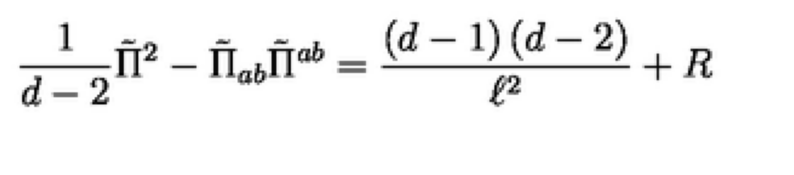

d-2m-machias - ( d-1/cd-2 ) +
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0b\x8aIDATx\x9c\xed\x9c_L\\\xc5\x17\xc7\xe7\xfe\x83m\xbb\x05v\x1b\x90*l)\xe9\x83\xda\xc4F+4T\xc3\x9f\xb4\x1b\xa1-\xda6Bj\xac\xc6\xbe\x99\x16\xa3R\xa8ilc\x13\x1a\x85\xa6\xc5\x18M\x8c\xc6h\x15\x13\xa5\x81V`\x85Zi\r\n\x18\x1fLLM\x8c1>\xd8\xa4\xe1O\xb1]w\xd9-\xdc?3\xe7\xf7p\xe4\xba.\xfchSv\x81\x8b\xe7\xf3\xc4\xee\xde;gf\x98\xef\xcc9\xe7\x9e]\t\x00\x18A\x10\xceD^\xe8\x0e\xfc\'\x00\x00\xda(\x89d@\x02N:\x00 I\x92$I\xa4a"\xe1\x90\x80\x93\x0b\xaa\x17\xff&\r\x13\tgq\tx\x89\xado{8\x85\x85\x85\x05\x05\x05(\xe6%6Fba\x99Y\xc0\x0b\x12\xb3\t!\xec\xc3j\t\x80sh\x18\xc6\xc6\x8d\x1b].\x97\xdb\xed.))\x19\x19\x19\x11Bp\xce\xe7\xad\x0f\x9cs\xd34m\x8b\x9cs\xdaA\x96\x123\x08x\xa1b6Y\x96#\x91\x88\x10b>\x8d&\x1b\xce\xf9\x93O>\xf9\xed\xb7\xdf~\xf3\xcd7\x07\x0e\x1c\xb8|\xf9\xb2\xa2(\x8a\xa2$\xdb.\x00X\x96%I\x92\xa2(\x9a\xa6\xa1E\xce\xb9\xa2(Ki\x97$\xe2U\x1a\x1b\xb3M\x7f\x99$pa\x9d?\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


e-ele,. As-Gas
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x17\xa2IDATx\x9c\xed\x9c{P\xd4\xd7\xf5\xc0\xef~\xf7\r(\xc1\x04i1\xa8C\xda\xd8h#\xb6\x12\x1f\xf5Ax\xd6GD\xd3\xb4\xd3636\x13\x89 "\xf2\x06\x15\x90E|\x04\x05\x8c3v\xd2d\x9c\xc9\x1f4q\xc6"X^\x83 \x04\x0cA\xdb\xa8\xd3\x19;\x1d\xa7c\xea\xa4S!\xc8\xee\x02\xfb\xde\xef\xeb\xf4\x8f\xf3\xdbo\xbf.\xec\xba\xf8\x88\xeeo\xee\xe7\x0fg\xfdr\xbf\xf7\xdes\xee9\xf7\x9e{\xee\xddU\x00\x00\xa1P(\xc1\x89\xeaiw\x80By<x-E\n\x85\xe2i\xf5\xe4\xbbDAW`\n%xy\x16W`\x00\x10\x04A\xa5zl}\xe3y^\xa1P(\x95\xca\xc7U\xe1\xd3\xe5\xb1\xeb\xe7\xe1Z\x11E\x11\x0b<\x0bk\x9d\xd3\xe9t:\x9d\n\x85\x02\x00\xf0_\xbd^\xaf\xd7\xeb\xa5\x02\x82 \x10B\xfc\xd8\xc0T#y\xa6\x04\xf4\xc5}+0\xc7q\xd2g\xa5R\xc90\x0c~FI\xf0\xb3Z\xad~\xa2\x1d\xc2\x01\x08\xae\x9a\x9f(^\xdd~\x12R\x08\x82\xa0P(\xa4\xe1~B\xad<!x\x9eW\xa9T\r\r\r\r\r\rj\xb5\x9a\xe38t\xe0\xc2\xc2\xc2\xc2\xc2B\x8e\xe3\xd4j\xb5 \x08\x01N\xdfA$\xf8\xff\x01\xcf\x12\xa2(\x02\x00\xc

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


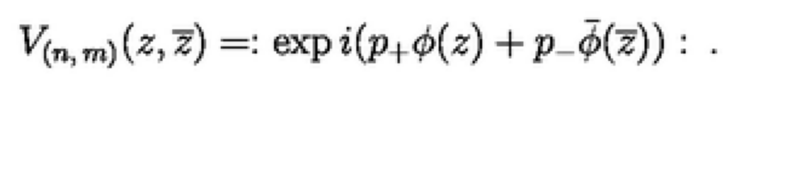

Vinum (2, E ) Expi (P-D (E ) TP-
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0f\x00IDATx\x9c\xed\x9dkL\x14\xd7\xfb\xc7\xcf\xdc\x16w\x01Y\xec\x05[\x8a\x96\xc6\xb6\x98h\xc0\xb0I\xb3\xc6Z\xae\x06\x84U\x12\t\xc2K!4\xa6\xd1V\x1a\x82\x16\x04Zj\xaf@\x9aj/\xa6/LMz\xb3\x86\xca\xa2\xb0\xca\xbd\xad\x91\xa6&M\x13\xda&M\xd3\x96\xb6\xb1\xd2\x00\xbb\xec\xb2\xeemf\xce\xf9\xbfx\xfe\xeco\x85ew\xf6\x82,z>/H\x98=s\xf6\xccf\xbes\x9e\xe7\x9cg\x9e\x87!\x84 \n\x85\xb2:a\x83\xb6\xa0\n\xa7Pb\x96@\x02\x06\xe92\x0c\xb3\x1c_,\xcb\xb2,\xcba\x9c\x881\x16E\x91>V(\x14\x14@\xc0\x84\x10\x90\xae\xcdf\x0b\xa9GY\x961\xc6A\xdbp\x1c\xc7q\\H=\x03,\xcb\n\x82\xb0L\x8f\x95\xf0 \xf3\xac\xf4@(\xf7\x1c\xfe\x05L\x08\x91e\xd9l6\xef\xde\xbd{\xc3\x86\r\x0e\x87C\xf9\r\xcaq\x1c\xcb\x06\x9a\xd8A\xbdF\xa3\xb1\xab\xab\x0b\xfeU8Vx.\\\xbdz\xb5\xa1\xa1\xc1\xe9tb\x8ccA3\x92$1\xf3 \xeaqP\xee,~\x94\x06:\x11Eq\xeb\xd6\xad&\x93\xe9\xec\xd9\xb3k\xd6\xac\xc1\x18\x07\x9d\xf4@\x8a\xfd\xfd\xfd\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


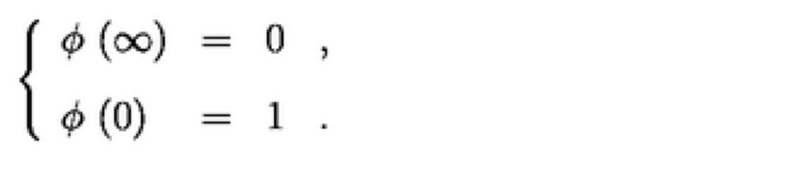

(000 #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0fOIDATx\x9c\xed\x9dylT\xd5\x17\xc7\xef{o\xde,\xedt\x05jiE\\\xd0\x08I\x05EL\xdab\x0bh\xe9\xc2Vd\x8d\x80\xd1J0,m\nH\x8bR\nL(\r\x98b\x10\x90J\xa2\x01\rD$\xd3v\xd0\x19\xb0\xb4\nX6k\x82\xd1\xb8%4F\x08\xa1\x94Ngi;\xcb\xdb\xee\xef\x8f\xf3\xe39t\xa3,]F\xce\xe7\x8f\xa6\xbcyo\xdey\xe4~\xdf=\xe7\xdcsn\x19J)A\x10$8\xd1\x0c\xb4\x01\x0f\x0c\xf5M\xc40\xcc\xc0Z\x82 \xfd\x06;\xd0\x06<\x18dYfn\xa1(\xca@\x9b\x83 \xfd\x04\x13t.4\x18\xdcy\x9au\xb9\\\xed\xed\xed\x91\x91\x91!!!\x03a\x17\x82\x0c\x00\xc17\x03\xc34\xab\xfeS\x96eJ\xa9\xc5b\x990a\xc2\xaaU\xab\x86\x0f\x1f^[[\x0b\xc7\x07\xceF\x04\xe9\'\x82L\xc0^\xaf\xd7\xe9t\xba\xddn\xaf\xd7K\x08\xa1\x94\xb2,\xeb\xf7\xfb\xb3\xb3\xb3SSS+**\xe2\xe3\xe3\xcdf3!\x04\x1di\xe4a h\x04,I\x12!d\xdf\xbe}O?\xfd\xf4\x88\x11#>\xfe\xf8c8H)\xd5\xeb\xf5\x15\x15\x15\x8b\x17/\xb6\xdb\xed\x8d\x8d\x8d\xc3\x87\x0f\x1fhc\x11\xa4\x9f\x08\xa6\x18X\x14EI\x926n\xdcXVV\xd6\xd2\xd2\x1

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Poo # #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x13\x18IDATx\x9c\xed\x9c{PSG\xfb\xc7\xf7\\B\x82\x08\xc8\xad\x17\xc4y\xb1\xb6\xd8\x91\xd1*\xf1V\x01\xabb" \xe0\xa5:v\x06\xc7\x19\xedX\xf16\x15AQZ\xe4b\xeb\x08\xc5\xdaj\xede\xaa\xad\x83UFZ\x85\x9a \x03\x02"E\xda\x8a\x97\xd1\x99\xd6\xa9\xfaO\xa7"\x96K.\x86\xe4\x90\x93\x9c\xb3\xbf?\x9e7\xe7\x17\x03\t\xd4\xb7\xa8i\xf7\xf3\x07&{v\xcfy\xf6\xec~\xf7\xd9}v#\x851F\x04\x02\xc1;\xa1\x1f\xb9\xe4P\x94\xef\xbd\xa3\x03\xc6xP\xe3\x9f\xb6\xda\r\xc5f)\xe7p\x1bCx<P\x9e\xdb\x12\xaeR\x14\xe5\x92.\x8a"M?\xba\xf8\x9f*0\xc6.\x15\xec\x9f\xf2T1`\xa3\x0ch\xb3s\xe3\xba\\\xfd\'\xb5\xe0\xbf\x99A\x9a\x90\xa2(w\xea\xb5X,\xa2(z(\x8b1\xee\xe8\xe8\x80\xfcOd\xc8\x17\x04\xc1n\xb7\xdb\xedv\x9b\xcd&\x08\x82\xbbl\xee\x94`6\x9b=\xdc|8j\x871\xb6\xd9l`\xb0\xcdfsw\xdb\xfe\x8d\xe2\xcef\xca\t\xe4\xd0\xb3^\xaf7\x99L4M\x13?\xfc\x0f`\x10\x01\xf7\xf5\xf5\xf1<\xef\x9c"\x08\x02M\xd3\x95\x95\x95c\xc7\x8e\xb5X,\xee\xa6m\xa2(\n\x82\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


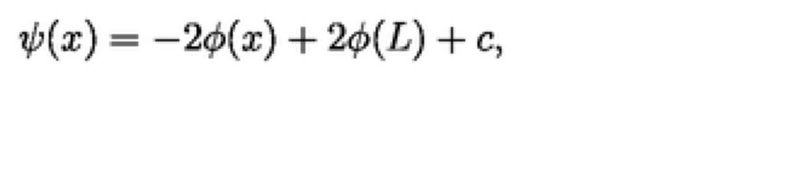

sp (cc ) #2db (cc ) +2db ( in ) to,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x11%IDATx\x9c\xed\x9ciL\x14\xe7\x1f\xc7\x9f\x9d\xd9\xdd\xd9\xc5\xad\x14\xd4z\x80\x7f5\xc66\xd1\x94P\xc0\x03<\x8a\x08\x82\xb4\xb5\xb4\x9a\xd44\xa6\xadZi\tG=P\xa4\x80rh\x05+\xd5\x17\xd5\xc4\xd6\x98\xa8\xa9(^\x88lE\x11\xbc*m\xa2\xd5\xa4i\xd2#m\xdfH\xcb\xb5\xcb\xb2\xac\xc3\x1es<\xff\x17\xbf2\x1d\xf6\xea\x82\x80\x8e}>/\xcc2\xfb\xcc\xcc\xf7y\xe6\xf9\xce\xf3{~\xcf\xb3\xaa0\xc6\x88@ (\x13\xca\xcfw\x18c\xb0719\x81\xf0d\xe2n`\x8c1\xcf\xf3\x08!A\x10T*\x95J\xa5B\x08\xa9T*_\x1e\x16\x04A\x10\x84\xe1VI \x10\xbc\xe2n`\x95J\xa5V\xab\x11B4M\xb7\xb7\xb7\xf7\xf4\xf4 \x84:::\xc0\xc9\x9e6\xa6i\x9a\xa6iQ\x14GD-\x81@\xe8\x87Z\xfa\x04\x013\xcb\xb2\x95\x95\x95\x85\x85\x85555\x87\x0f\x1f6\x99Lc\xc7\x8e\xe58\x8e\xe3\xb8\xabW\xaf\x82\xb7\xc1\xcc\x82 \xd04}\xf6\xecY\x8a\xa2\xdex\xe3\rQ\x14)\xaa\xdf\xeb\x00\xdc\x0e\x85\x07\x04\xc6x\x10g="\x83\xbb\xe9c\x91J H\xfcc9\x9e\xe7)\x8a*--=

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


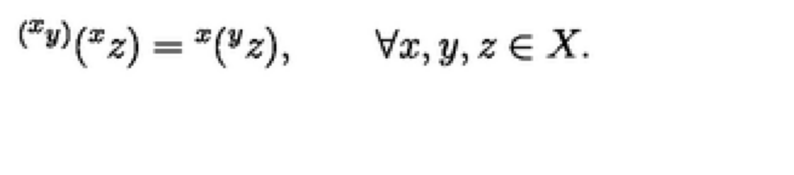

(OU ( # # YOU, Yx.Y.ZE K.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x16YIDATx\x9c\xed\x9c\x7fPT\xd7\x15\xc7\xef\xfb\xb1\xbb,\x0b\x8b`P#\xfe\x98F3\x99\xb43\xb18\xa1\x81\x90\x9a(B\x1a\x8c\xe2\xa46\x96t\x0cq\nV\x04M\x10A\x03\x08b\x83\xbaZ\xb4If\x92I\x9bN2\x9d\xd6\xaa\xd1\x16\xc15\x82\xe0\xe2\x0f\xc4j\xa7\xe9$\xd3I\xfeP\xb4i!\x11X\x16\xf6\xc7{\xbb\xef\xc7\xbd\xfd\xe3t_\xd7]X\x16c\xa2K\xee\xe7\x8f\x1dx\xbc\x1f\xe7~\xdf=\xf7\x9e{\xeeY\x18B\x08\xa2P(\xd1\t{\xb7\r\xa0\xdc}\xc6\x1a\xc4\xe9\xe0~\xefC\x1d\xf8\x1b\x82\xdc\xca\xdd6\xe7\xff`\x8c\x19\x86\x19\xf5O\x0c\xc3`\x8c\xbfa{(\x13\x82:\xf07\x04s+w\xdb\x9c\xffA\x08aYV\x14\xc5PG\xc5\x18\x0b\x82\xc0\xb2\xb4\x87\xdc\xd3\x8c\xf9zF\x9d(\x08!\x8a\xa2|\xcd&\xdd10\xc6\xb2,\xdf\x95\xe9.H=Q\x14\x87\x86\x86\x1c\x0e\x87\xddn\x1f\x1a\x1a\x1a\x1a\x1a\x12E1\xf0\xe4\xbb\xa2\xaa\xaa\xaa\x0c\xc3\xd8l\xb6\xb9s\xe7\n\x82\xa0\xd9\x0c?\x08\x82\xf0\xc0\x03\x0f455\xc1\x99\xe8\x9b\xd5s\xa2q\xca=\x15\xd4|\x930\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


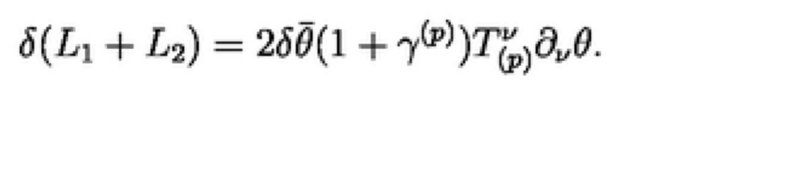

8 ( In # 280 ( type ) Technology.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x13\xdfIDATx\x9c\xed\x9dyT\x94\xd5\xff\xc7\xef\xb3\xcc\xca\x0c8\x82\x9a\x9eL-M\xdbN\xa9\xb8\x81h\x82 \x8b"nx\xb2Sf\x9d\xa3\x82;*\x18\x81\x0bb\x02\x9a\xa9yr\xe9tRO\x96\xa5"\x88\xe0\x02J\x1a\x8a\xc7\xa5<\xd5q\xc95\xcdD\x05\x86a\xf6y\x96\xfb\xfb\xe3\xf3\xe5\xf9M\x88\xc82\x03\x0e\xdd\xd7\x1f\x1e\xe6\x99y\xee\xbd\xcfx\xdf\xf7\xf3\xb9\x9f\xfb\xb9w(\x8c1"\x10\x08\x9e\t\xdb\xda\rp\x0b\x1e=*Q\x14\xd5\xdaM x\x0c\x94G\xf7u\x02\xe1?N\x9b\xb2\xc0\x18c0_z\xbd\x1ey\xa0\x1d\xa6(\nc\xacR\xa9T*Uk\xb7\x85\xe0\x19\xb4\x1d\x0b\x8c1\xc6\x18;\x1c\x8e\xc9\x93\'\x9f?\x7f\x9eeYA\x10\xdcZ\x17M\xd3\xae-V&\x93q\x1c\x97\x90\x90\x90\x90\x90\xc0\xf3<\xcb\xb6\xa9\xe1\x95\xe0\x0e\xda\x94\x80)\x8a\xd2\xeb\xf5\xdd\xbbw\xff\xe5\x97_t:\x9dd\x90]\x08\x18I\x86a\x94J\xa5\xd9l\x86\x97\xae-\x9cX`B\xc3ikc\xbc\xcdf\xf3\xf3\xf3\xeb\xd4\xa9\x93F\xa3q_-\x16\x8b\xe5\xe2\xc5\x8b\x83\x06\rr_\x15\x04BCh

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


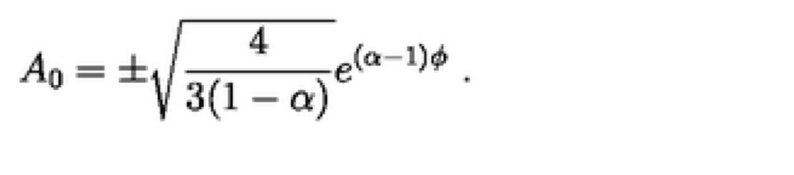

AO #V3 ( - Against.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x17\x84IDATx\x9c\xed\x9d{PT\xd7\x1d\xc7\xcf\xbdw\xdf\x0fX(\xa5\x92P\xd3&M3\xa9ilP#\xc2\x80\x80Q\x10\xdf\xa6yYG\x93\xaa\x8d\x18\x98\x11Q\xab\x01\x84\xe2D\xc5G\x98\x0e%\x91$\xc6Lc1\x99\xa4\xba\xb8\x16PD\x89\xa26\x8f\x99\xb6\xffd:u\x92\xceD\x01u\x97e\xd9\xf7\xee}\xfc\xfa\xc7/{\xbb\xee\xc2\xba \x88\x8b\xf7\xf3\xd7\xb2\x9c{\xee\xb9\xe7\xde\xdf\xf9\x9d\xfb\xfb}\xcfY\n\x00\x88\x84\x84DlB\x8fw\x03$F\r\x00\x88<\x1cK\x83\xf5\xc4\x83\x92n\xea\xbd\x03\x00\x08\x82 \x08\x02M\xd3\x0c\xc3\x10Bx\x9e\xa7i\x9a\xa2\xa8h\x8e\x8d\xa6\x98\xc4\x04\xe3\xfe\xf5\xc0<\xcf\xb3,;\xde\xad\xf8\x1e\x00\xe08\x8e\xa2(\x86a\xe4r\xb9h\xbd\x0c\xc3\x0c\xcbz].W\x842\xbd\xbd\xbd\x84\x10A\x10\xa4Q{\xc2p?\x1a\xb0 \x08\x84\x104\x95\xf1n\x0b!\x84\x08\x82@Q\x94L&s\xb9\\\xc7\x8f\x1f/))1\x1a\x8d\x84\x10\x86a\xba\xba\xba\xfa\xfb\xfb#\x1f\x0e\x00<\xcf\x03\xc0\xb4i\xd3\x0e\x1c8@\x08\t\x1f\x98\x04A\xe0y~\xc3\x86\rs\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


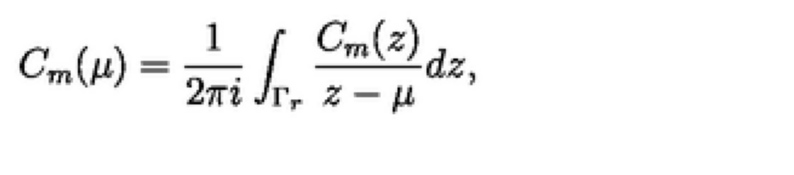

only # air for a year.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\r\xbbIDATx\x9c\xed\x9ciL\\U\x1b\xc7\xcf\xb9\xe7\xce\x0c\x0c3\x8d@\xa9\r\x96\x9aZ\xe3\xd2\x04\x1ak\xac\xc4b\x00)\x84Z\xc7Z\xd3&\x18\x13\xd3\xc6\xc4%-L\x8ac\x95\xb0\x18\x05lc\x04\xbb\xa4\xc6\x18\xf5\x83\x1f0V\nmPd)\x852\x1d\xdb\xd8%\xad\xdb75\xd1FkY\xca2\xccp\xe7.\xe7\xfd\xf0\xc8Hg\xebP\x86a\xee\x9b\xe7\xf7\x81\x90;w\xeey\xee\xff\x9c\xffY\x9es\x80r\xce\t\x82 \xfaD\x98\xcf\x97\xe3f~\xbd\xf72q\x88\x1f%\x8a-\x89\x16O8\xa8^\x02E\x10$\x98\xb0#p4\xc6\xf6z\xbd\xb2,\xc74\x9eE.hND\xdf\xf7\xc5!~\x94(\xb6$Z<\xe1\x08m`UU)\xa5\x84\x10M\xd3\x82?\xe5\x9cs\xce\'&&\xccfs]]\x1d!$\xb6\xaf\xaa\xaa\xaa\xaa\xaaq(h>D\x90HQ\x14\xf8%\x0e\xf1\'\xacD`]J\xa9_\x8dp\xb7%T\xfc\x89\x16\xcf-\x11\x83/\xa9\xaa\xca\x18\x9b\x98\x98X\xb2d\x89 \x08\x9csh\xa9\xb3\xa1\x94.Y\xb2\xe4\x83\x0f>\xc8\xc9\xc9!\x840\xc6b\x18\x13<\r\x843\x18\x0c\x0bW\xd0m\x13Y"Q\x14UU\xd54M\x10\x04\xc6\xd8B\xc7\xbf\xa0uq{\xf8\x05\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


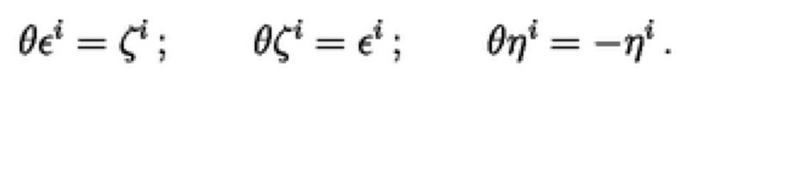

odust : astred : on # not.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1fjIDATx\x9c\xed]iT\x14W\x16~\xd5\xd5\x1b4\xc8&\xa0\xa0\xc65\x89k\x10DAYD\x85\x90\x18\xe3\x9e1\x99\x98\xb8\xc4\xb8 \x86\xb0\xa8\x80 \xa2\x8c\xc1\x8dd<.\x899\x8e8\x0e\x1a\xa3QAD\x03\x04w3&\x9a\x13=3\x99\x98I\x1cu\x82D\xe8\xa6\xe9\xa6\xb7\xda\xde\xfc\xb8\xe9:e74\r\x82\x88S\xdf\x0fNS]\xf5\xee}\xaf\xde}wy\xf7\xdd&0\xc6H\x84\x08\x11]\x13\x92\xcef@D\x0b\xc0\x18\xc3"\xcb\x7f\xb0\xbf\xc1\xf1\xe3\x1d\xcd\xd8\xe3\'-\x82\x07!\x8er\x1b\x801\xe68\x8e\xe38\x89D"\x91H\x08\x82hC\x0b\xfcg\x9b\xc7\xf9\xaf\x9ci\x16xx\xfc\xa41\xc6\x1d\xc4\x9e\x88VA\x1c\xdc\xd6\x01c\xcc0\x0cA\x10$I\xcad2\x92$\t\x82\xe08\xae\xb5\xed\x10\x024\xf7\x15\x7f\xc5b\xb1 \x84\x8cF\xa3\xd9l\x16\xde\t\xe2a4\x1a\x9bc\x00c|\xff\xfe}\xb8S(\x9c\xce\x90\xe68\x8e\xa6i\xbee\xe1g^z\r\x06C\x93D\x11B\xf5\xf5\xf5z\xbd^"\x91\x88\x1a\xa2C!\np+\xc0q\x1cA\x10R\xa9T\xab\xd5\x1e:th\xf9\xf2\xe5\xc7\x8e\x1d3\x1a\x8dm\xd0\x81\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


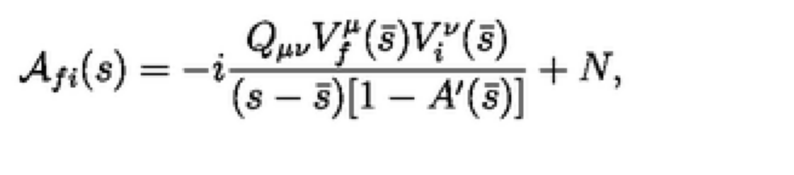

Asia ( # NEWSTON
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0b\x9eIDATx\x9c\xed\xdckl\x14U\x14\x07\xf0;3;\xdb\xdd\x96\xa5-\x8d\x14j\x8a\xf5\x15\x8c!4\xd1\xaa!VlB$\xa4\x98\xf6\x83E\x83\x8d\x82E\xac\x15S\xa1\xe8\xd6X4\xa5TI\tkL\x8c\xc1\xb4\x11$\x18\r\rY\x0c\xdb\xd6\x04\xad\x825\rZcH\xf8\xdc\xa8A)\r\xec\xc3-\xbb3;3w\x8e\x1f\x8e]\x97n\xf7\x85mu\xe4\xfc>\xd1\xe9<\xee\x0e\xf3\x9fs\xe7\xce\xdd\n\x00\xc0\x08!\xd6d\xfb\xb7\x1b\x90\xd2\x8c;\x8b \x08\xffVK\x08\xf9\xcf\x12\xa8\x02\x13b]YU`\x00X\xe0\x02\xa8(\x8a\xa2(\x82\xf0\xf7\xfd\xc5\xe9t:\x9d\xce\x8c\x1b\x02\x00\xe7\xdcf\xcb\xf0\xb9\x0c\xc3\x10\x04A\x92\xa49h+!\xff\x1e1\xe3\x1a\xa6i.dz\r\xc3`\x8c\x1d:th\xf5\xea\xd5\xf7\xddw\xdf\xaaU\xab\x1e|\xf0\xc1\xca\xca\xcaC\x87\x0e\xc5\x7f\x9b\n\xdehR\xa57q[\x9b\xcd&I\x12\xf5>\x88\xd5e\xe8Bc$\xa2\xd1\xa8\xc3\xe1\x10\xc5\xcci\x9f+\x8a\xa2\xa8\xaa\n\x00yyy\xa1P\xc8\xe1p\xe4\xe7\xe7\xa7\xaf\xc0\xd8T\xceyww\xb7\xdb\xedv:\x9d\xb3v\x1c\xb0Dwuu=\xf4\xd0C

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Are-APO ) tape,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\t*IDATx\x9c\xed\xdc_HS\xef\x1f\x07\xf0\xe7\xfc\xdbv\x1as6M\x83\x82\xe8\xae? \x91\x12\x89\xb2\xb4\xcd\xa4\xa5\x17\xe1Ew\x06A\x84\xc9\n\xb5\x90BM\xba2J+I\x94\x82\xa8$\xa2\x82\xc4\x89\x05iR\xa8\x84\x14\x84\x10H\x7f\x90\xa2\x08u\xceL7\xcf\xce\xbf\xe7\xf9]<\xb8\xefZ\xb6\xfc\xf7\xfd\xe5\xf1\xfby]\xe9v\xcey\x9es\xf1>\xcf\xdf3\x86\x10\x82\x00\x00\xc6\xc4G\xff\x13\t3\xc30\x7f\xa32\xb15\xf9\xeb\xd5\x00`\x85c\xfe\xd8\x02\xcfy\xc0\x12\xa3\xf5o\\\x13\x80\xff\xa0\x7f\x02L\x08\t\x06\x83\x9a\xa6!\x84\x12\x13\x13\xe3\xc7I\xd34\x8e\xe3\x96=r\xba\xaes\x1c\'I\x92$I\x1c\xc7Y,\x16\xb3\xd9\xbc,W&\x84h\x9a\xc60\x0c!\x84eY\x8e\xe3\x96\xe5\xb2\x00\xfc]<B\x88\x10\xc20L0\x18\xdc\xbe}\xbb\xae\xebv\xbb}``\xc0f\xb3\x11B\xc2\xe1\xb0,\xcb\x1c\xc7E\x02\x80\x10\x12E\xd1b\xb1,\xbaHB\xc8\x8f\x1f?X\x96eYVUUZ:\xc7q\t\t\t\xb4\xa0\xe6\xe6\xe6\x86\x86\x86p8\\^^~\xf6\xecYUU\x05AX\xe2}2\x0c\x13}\x11\x8c1\xcb\xb2K

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


( DIFF #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x11\xa3IDATx\x9c\xed\x9d{PT\xe5\x1b\xc7\xdfs\xd9\xb3\x17wY\x10\xf3F\xa2\x96\x8dZ\x93\x8dc)\xe5\xb8\x10r\'\x02\xcc)\x8d\xfa\xa3l$e\x8c4g\xd4\x19\x15\xb0\xb4\xfc\t9If\x83\x93\x8de\x8c\x97TX@"\xc5K4!\x9a\xfd\xd1\xc5\xfe(\xcbK^\x00\xd9\x0b{\x96=\xbb\xe7\xf2\xfe\xfex\xe2\xb4rY7\\0\xf0\xfd\xfc\xe1\xec\xbe\xbc\xe7\xdds\x9c\xf3=\xcf\xf3>\xcf\xf3\xbe\x87\xc2\x18#\x02\x8108\xa1\xef\xf6\t\x0c\x1c\xb8\x93.-!\x19\xf9\xce\x07!\x10\xfa\xc0\xbd"`EQ\xa8N\x14E\xc1\x18K\x92\x04_\xd1\x9d)\x10F\xf6o\xc1~\xdc\xe9y\x13\x08\x01\xa1\xee\x9d\x9b\x8c\xe7y\x9f\xcf\xa7\xd7\xeb\xf5z=\xb48\x9dNY\x96\x87\x0f\x1f\x8e\x10\xc2\x18w\xd1a0\xc0Q\x1d\x1d\x1d:\x9d\x8e\xa6\xef\x95\xa7!\xe1\xbf\xc3\xd0\xbf\xe7dYF\x08\x1d>|x\xfc\xf8\xf13f\xcc\x18>|\xf8\xd1\xa3G\x11B\xf9\xf9\xf9\xd3\xa7O\x9f6mZZZ\x9a\xd3\xe9\xec\x83\xc1\x94e\x99\xa2\xa8\x93\'ON\x9a4\xc9\xedvC\xa3$I\x0e\x87\x03!\xe4v\xbb\xaf^\xbd\n\x8d\xf7\xceS\x920\xc0\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


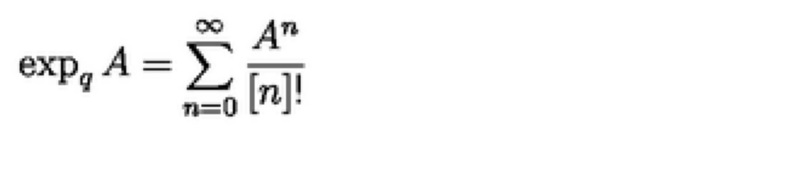

expa A-E injour
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x19wIDATx\x9c\xed]{PT\xd7\x19?\xf7\xde\xdd\x05\x16\x04\x16\x1f\xf8 \x18ubi\xa2I\x11\x91\x87\x08\xbb \x1a\xa2\xa3\xd6\x0c\x99\xb4c\x9cLbL\x04\xa1a\x91T\xb1\xd8\xa0\x98\xa8\ri\x1a\x8d\x9di\xda\x9aPC:\xa6\xea\xc8\x1b\x04\x8cB\xb5i\xac\xd3&3N\x9aIh\x92\x11\x91\xc7.\xfbb\x97\xdd\xbb\xf7\x9e\xfe\xf1uO\xaf\xf7\xee.\x08(\xac\xb9\xbf?2w\xaf\xe7\xf1\x9d\xef\xfd\x9ds.\xa10\xc6H\x86\x0c\x19\x81\tz\xb2\t\x90q\xaf!\xbb\xec\xfb\t\xb2\x01\x7f\x8f\xc0q\x1cB\x88\xa2\xa8\xc9&D\xc6\x84A6\xe0\xef\x11\x18\x86A\x08\x99\xcd\xe6\xc9&D\xc6\x84A6\xe0\xfb\x1f\x18c\x9e\xe7\r\x06\xc3\x07\x1f|\x90\x96\x96\x16\x17\x17744\x84\xe4\\\xfa\xbe\x80l\xc0\xf7?0\xc6\x14E}\xf1\xc5\x17_|\xf1\x85\xc3\xe10\x18\x0c\xb2\xe9\xde7PL6\x012\xee:h\x9aF\x08\xad\\\xb9r\xe5\xca\x95\xd3\xa6M\xbbv\xed\x9aB!\xcb\xfd>\x81,\xc8\xef\x0b\x9cN\'\xc30P\x00\xcb\x11\xf8\xbe\x81\x9cB\x7f_@\xd3\xb4B\xa1\x80h,\xe3\xbe\x81,N\x19S\x1a\x18\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


( In (2 )2 (2 ) ) # Ko"dom ( P. ),
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0fnIDATx\x9c\xed\x9dkLT\xc7\x17\xc0g\xeecwY@\x11\xa94i-\x1a\xdbT\xfc@\x93\xaam\x89T\x01)\xe1%M*&ml?XI\x8d\xf5\xd1\x80\x8a\xb1 T\xd4*F\x1e\x11Im\xd2W\xd2j\xa5mb\xca\x02\xf2~4\x88E\xda\xa4!1\x954\x1a\x9bB\xd2PvY^{\xe1\xbe\xe6\xff\xe1\x94\xfb\xdf.\x0b,,\x0b\xbb0\xbf\x0f\x04\xee\xce\x9d;sv\xce\x9c9g\xce\\0!\x04Q(\x14\xdf\x84Y\xec\x068\xc7\x13\xd3\xca2\x9f\xaa\xe6\xbd\xfb\xcb\\\x9e^\x82\xd7)0!D\x96e\x8c\xf1\xbc\xd7\xec\x89:}\x02EQ\x90\x07\xba\xbfl\xe5\xe9Ux\x9d\x02c\x8c9\x8e\x1b\x1a\x1a\x1a\x1f\x1fw\xa5\xbc,\xcb\xae\x14\x93$I\x10\x04\xf7\x9a\xe6\xab\xb0,\x8b\x10\x1a\x1c\x1c\x9c\xdfj\x05A\x90$i~\xeb\xa4\xcc\x16\xefR`UU\xbb\xbb\xbb322\xd6\xae][XX\x88\x10\x9aq\x88p\x1c7}\x01\xa8!77\xd7h4\x82\x0e/\x93\xb5\x1f!DUU\xb3\xd9|\xfd\xfa\xf5\xa8\xa8\xa8\x8d\x1b7\x8e\x8e\x8e"\xb7\xbb\x0f\xb7\x0b\x82`4\x1asss\x91\x0b\xdf\x11\xc5s\xcc0\xfa\x17\x18I\x92\xea\xea\xeaDQ\x1c

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


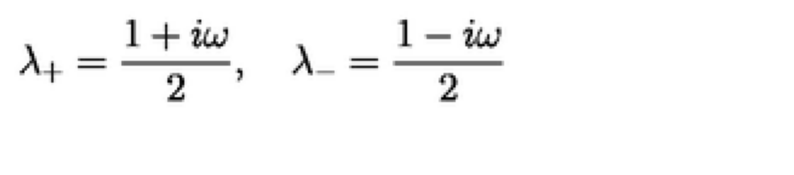

atrities, a similar
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\riIDATx\x9c\xed\x9doL[\xd5\x1b\xc7\x9f\xfb\xa7-m\x81\x82CG\xb2e\x8e\xe94&\x1au2\x83\xca\xdc\\;dm7\x080c2\xdf\xa8\xd3\xbd\x90\x19AAe8\x82\x80NL\x8c\x1b\xe0\x0c\xcb\xa6a\x9b\x98\x99(\x95\x02\n\x839\xa2\xce-s1\xfa\xc6\xc40\xcdP\x0c\x14Z\n\x85\xf6\xf6\xfe9\xbf\x17\xe7\xc7]G\x072\x18\x94\xb2\xe7\xf3\x82\xb4\xb9\xe7\x9e{.\xb9\xdf\xf3<\xe7\xb9\xcfs\xca\x10B\x00A\x90\xe8\x84\x8d\xf4\x00f\x04!d\x86\x13\r\xceG\xc8M\xc5\xc2\t\x98L0\x8bs\x19\x86a\x18f\xfa\xceEQ\xa4-\x01@\x96\xe5Y_\x0bA\xa2\x88\x85\x100\x15\x123\x01\\\xbf\x9d\x1c\x1b\x1b\x0b\xedjR\xe7\x92$1\x0c\xa3\xd1h\x00\xc0\xedv\x03\x00\xc7q\xf4Z\xb2,\xcf}\xfc\x08\xb2h\x99w\x01\x13B\xa8h\xff\xf9\xe7\x9f\xbe\xbe\xbe\x91\x91\x11\x00`\x18f\x86\x1a\xa6v\xf5\xc0\x81\x03\x8f?\xfe\xb8\xa2(\xe1g1\x0c\xc3\xf3\xfc\xe0\xe0`IIIFF\xc6\xbau\xeb,\x16\x8b\xc3\xe1\x00\x80\x1d;v\xb8\\.@\xbf\x1aY\xba\xccTH\xb3\x83\xfa\xb1\xc1`\xd0b\xb1\xacZ\xb

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1#
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0f\x05IDATx\x9c\xed\x9d[LTW\x17\xc7\xd7>\xe7\xcc0\xc0\xa8\xccX\xadJ\xf9\xd0T\xdb&\xb5\xc6\xdaz\xc1\x0b^ZcA\xd0T\x1ao5m|\xc06\xa9\xe9\x83\x8a\xc8EM\xa1`1F\xd3\x98\x08i\xadMS\x9b\x1aTt\xa4\x8a\xc5k\x80\xd0\x07j}j\xb5Q\xa3I\x8d\xdc\x1cf`.\xcc\x99sY\xdf\xc3\xd2\xe9\x14FD\xe52\x83\xfb\xf7@\xce\x1c\xf6>\xb3g2\xff\xb3\xd6^k\xed}\x18"\x02\x87\xc3\x89L\x84\xc1\x1e@D\x82\x88\xfc\xc6\xc7\t\x07\x18\xff!\xf6\x00}9\x8c\xb1\xa7n\xc0\xe1\xf4+\xdc\x02\x87&\xa0\xcc\x90\xe2\x94e\xd9\xeb\xf5\xea\xba\x1eh\xa0i\xda@\x0f\x91\xc3yN\x04\x8cAt?\x19\xb2\x19\xc9\xb2\xb1\xb1\xd1\xe9t\x06\xfe\x0b\x00\xaa\xaa\x02@NNNQQ\x91 \x08---\x8d\x8d\x8d\x00 \x8a\xe2\x00~ \x0e\xe7\x01\xdc\x85\x0eMGG\xc7\x9a5kDQ\xfc\xe3\x8f?&O\x9e|\xea\xd4)I\x92\x00\x801\xd6\xd2\xd2\xf2\xfa\xeb\xaf_\xbf~\xfd\xca\x95+\xb9\xb9\xb9\x89\x89\x89v\xbb}\xfb\xf6\xed\x0b\x17.d\x8c\t\xc2sqO\xe4\x84\t\xd2`\x0f\xa0\xdfAD\xa7\xd3\xc9\x18\x13EQUU\x93\xc9\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


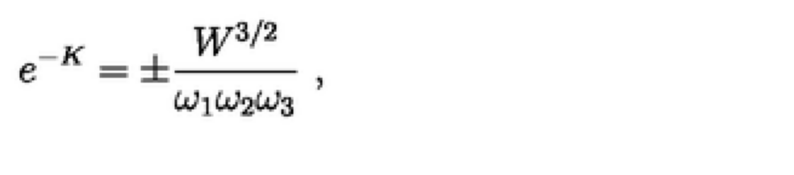

e #twows "
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x19\x91IDATx\x9c\xed\x9dyTT\xd7\xfd\xc0\xef{o6fXf\x00\x11B\xccR\xab6\xc7V#\x1a\x17\x14Y\x86]\x10\x97\x9a#\xd1\xb6r\xac\t\xc6D\xe2\x82\x98\x80\x08\x08\x11\\\xd0Z\xcc9\x89F\xd3X\x8b\x9e\xa8\xb8\xb0V\tB%\xa2MLsrzN\xffHc\x9aEt\x80\xd9\xf7\xb7\xdc\xdf\x1f\xdf\xf2~\xe3\xcc0\xa2b\xc3\x98\xf7\xf9\xc33\xce\xbb\xef\xbe{\xbf\xf7\xfb\xbd\xf7{\xbf\xf7;\x0f\x02c\x8c\x04\x04\x04\xfc\x13\xf2\xc7n\xc0\xe8\x05c,\xccn\x02\xa3\x1cB\xd0Q\x01\x01\xffEX\x81\xdd\xe1\x17^\x83\xc1`\xb1X\x84\tN`4#\x18\xb0;\x18c\x82 \x96.]\xfa\xcc3\xcfL\x980\xc1l6\xc3\x97?v\xbb\x04\x04\xbc \x18\xf0]\xb0,K\x92dkkkww\xf7\xca\x95+\r\x06\x03EQ?v\xa3\x04\x04\x86D\xd8\x03\xdf\x05\xcb\xb2\x08\xa1i\xd3\xa6%$$\xd4\xd6\xd6\x1a\x8d\xc6\xd0\xd0\xd0\x1f\xbbQ\x02\x02C\xe2\xaf+0\xbe\x7f\x86S\'EQF\xa3\xf1\xcb/\xbf\x8c\x8a\x8a\x12\x89D*\x95\xea\x7f\xd0\x17\x01\x81\x07F\xf4\x90\xf7\x83a\x10\x04\xe1\xbb\x8c\xef\x02\x0f\xc0\x88W\x88\x10b\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


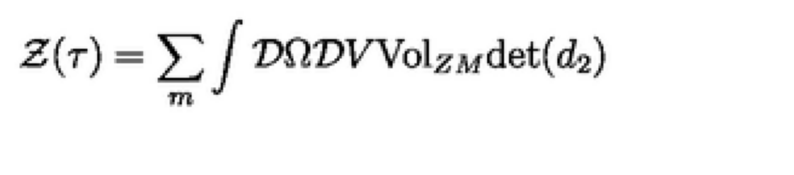

z(F. ( DODVoldsunder ( ds )
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x10\x8aIDATx\x9c\xed\x9b{l\x14\xd5\x17\xc7\xef\xec\xec\xccvYj\x8b\x8a\xa0\x95\x87(HL\x94X\x8aPl\x13KA\n\x8a\x80V\x12-\xb1\x12\x01\x8bM\x0b\x94wi\xa9\x90\x82<R\x8c!5>B\xc0\xf8\xa0\xad\xd8\x02\xdd.\xafB!\xf2\x101\xc6\x98\x18!\x96\x87)\xe1Q\xb6\xbb}\xec\xeet\xe7q\xcf\xef\x8f\x93\x1d\xb6\xbb\xedR*(\xd3\xdf\xfd\xfc\xb1\xd9\x9d\xb9w\xe6\xde\xb3\xf7;\xe7\xdc{\xcfp\x00@\x18\x0c\x8611\xfd\xd7\r0$\xec\xa9\xc7\xb8O`\x02\xbe3(\xa5\xaa\xaar\x1c\xf7_7\x84\xc1 $D\xc0\xaa\xaav\xb3\x1a\x00tU\x98R\xaa(J\xb0\x8f\xc2#=n\xe2\xbd\xe6\x8e\xdc\xa9\xc9d2\x9b\xcd^\xaf\xb7\xd3Z\x9a\xa6i\x9a\x16~<\xdc&\x91\xcb\x87T\xec~\xf3\x18\xffot\x10\xb0\xd9l\x0e\xfe\t\x01B\xea\x00\x00\xc7q!\x85o]\xd1d\x12\x04!\xd8G\xe1\x91\xbb\xd4\xe0\xbb\x06\x00\xa06\xb0\xa9\x9a\xa6u\xdaY\x1dT\x9a\xc3\xe1\x987o\xdes\xcf=\xd7\xda\xdaJ:\x8a_\xd34\x9e\xe7y\x9e\x0f\xaf\x1bn\x13$\xbc|\x88\xcd\xefO\xd31\xee\x1fL$0\n%I\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


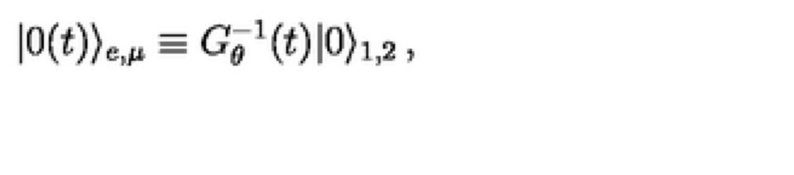

10 (6 )0 )0, Gg (6 )0 )3.2,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\r\xf9IDATx\x9c\xed\x9d[LT\xd7\xf7\xc7\xf7\xb9\xcd\x803(PZ1%\xd8\xd4\xd4&%Q\xca5\xc5T\xa0\x90r\xa7IM\xc4\x84\xc4R\xacLc5\n\x94Z\x14\n\xb1R\xb0Ql\x8b\xb6A-\xa1\xa6\x97P%"P.Q\xecE\xc4\xa4\x97\x97\xbe\xd4\xd0\xf6\xad\x18(\xcc\x0c\x0c3\xcc\xcc\xb9\xed\xff\xc3\xfas~\x03\xca\xad\x82\xe4\xb4\xeb\xf3@\xce\xcc\xec\xb3f\xb3\xd9\xdf\xb3\xd6^{\x9d\x03C)%\x08\x82\xe8\x13~\xb5;\xf0o\xc0\xf7"\xc80\xcc*\xf6\x04\xf9\xaf\xc1\xa0\x07F\x10\xfd\xb2d\x0fL)E\'\xe3\x8b\xdb\xedv\xbb\xddp\xcc0L``\xa0v\xbcj}B\xfe3,Y\xc08/5dY\xe6y\xfe\x93O>9}\xfa\xb4\xbf\xbf\xbf\xdb\xed6\x9b\xcd\xbf\xfc\xf2\xcb\x9a5kV\xbbk\xc8\x7f\x85\xa5\x85\xd0n\xb7[\x96e\x7f\x7f\x7f\x9e_\xd9\xc53\xf4\xea!_,\xfeApA)\xf5z\xbdn\xb7\xdb\xe1p\x04\x04\x040\x0cc4\x1a\x15Ey\x08C\x84 \x84\x10\xd6\xf7\x05\x9d\x03B\x88$I\x84\x90\xc6\xc6\xc6\r\x1b6\xbc\xf7\xde{\x94RQ\x14W\xa8O $_-QJ\xa5i\x16s\xc5\xa1\x94*\x8a"I\x92\xa2(\xf0\x8e\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


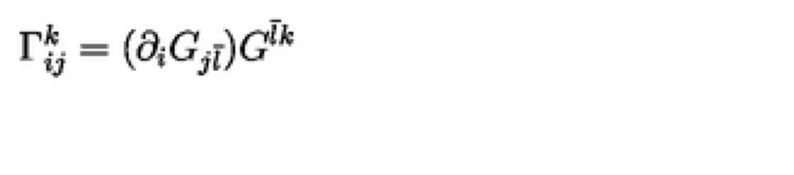

Try - ( Angen Girke
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x14<IDATx\x9c\xed\x9c{L\x14\xd7\xf7\xc0\xcf\xbcv\x97\xe5!\x0f\x1f\xad\x1a\xaa5\xda\xd6GZ\x1f\x15\xb5\x8a\n\xb2b\x05m\xabmc\xd5\xaa\xb5\xd6\x07\x9a\x88\nZ\x1e"\xa0\xc4\x07>j\xb4jTj\xb4\xd1X\x8b\x15\x05\x01\x15E\x14\xda\xb4\xfe\xd3\xb4\xb1\x89i\xd3\x9aT-\n,\xbb\xec{g\xe6\xfe\xfe8e~\xeb\xb2\xbb@\x05q\xbf\xde\xcf\x1f\x06g\xee\x9c9\xf7\xcc\x9c{\xcf=\xf7\xcc2\x84\x10\xa0P(\xfe\t\xdb\xd5\n\xf8%\x84\x10:\xf0Q\x9e\x05\x18\xfa"R(\xfe\x0b\x9d\x81\xdb\x812\xf1\x1a\x0c\x06\xb3\xd9L\xc7>J\x97C\x1d\xb8\x1d\x10B\x18\x86\x995kV\xbf~\xfd\x06\x0e\x1ch2\x99\xf0`W\xebEy~\xa1\x0e\xdcV$IbY\xb6\xac\xac\xac\xba\xbaz\xde\xbcy\x06\x83\x81\xe3\xb8\xaeV\xaau$I\x92$\xa9\x93\x84\x8b\xa2\xd8I\x92)m\x84\xae\x81\xdb\n\xba\xc1\xf0\xe1\xc3\'M\x9a\xb4k\xd7.\xa3\xd1\x18\x1e\x1e\xde\xd5Jy\xc0\xed\x812\x0c\x03\xcd\xb1C\xc7\n\xefX\xc9\x94\xff\x06\x9d\x81\xdb\x04!\x84\xe38\xa3\xd1\xf8\xcb/\xbf\xbc\xf8\xe2\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


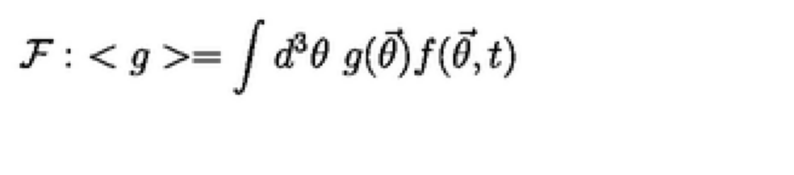

finance for sponsorship.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x16-IDATx\x9c\xed\x9d}pT\xd5\xf9\xc7\xcf\xdd{\xef\xbed\x93]\x12h\xa0\x06\x01\xe9\xe0\xd0"\xca\xac2\x85\x02B\x08\xa1\xa0`E\xea\xb4h;\xb5\xb5\xa0i\x02\x8d\x86\x00\xb1$\x1b\x82T\x14#\xd6\xaaX*\xd6q(\xcc\x18\x9a@BH\x06\x12P\x94\xa9\xc3\xd8\xfaG\x9d\xaa5\xc2\xd0b\x92\xeef_\xeen\xf6\xed\xbe=\xbf?\x9e\xee\xfd]\xf2\xb2\xc9\xbe$a\x93\xfb\xf9#\xb3\xb9\xb9{^\xbe\xf7<\xe7<\xe79\xe7\xdcP\x00@444\xd2\x13f\xac\x0b0\xc6\xf4\xef\xbf(\x8a\x1a\x93\x92hh$\x00\xa5\x8d\xc0\x1a\x1a\xe9\xcb\x04\x1d\x81\x01\x80\xa2(\x8f\xc7\x13\x89D\xccf\xb3\xd3\xe9\xc4+\x93\'O6\x99Lz\xbd~\xac\x0b\xa8\xa11,tc]\x80\xd1\x06\xa2H\x92\xf4\xf9\xe7\x9f?\xf1\xc4\x13\xd3\xa7O\x7f\xf7\xddwO\x9f>\xdd\xd8\xd88g\xce\x9c\xda\xdaZB\x88 \x081R\x10E\x11?+\x1f44\xc6\x84\t7\x02\xe3\x14\x97\xa2(A\x10\x16/^<\x7f\xfe\xfc\x96\x96\x96]\xbbv\xe1_/_\xbe\xfc\xd9g\x9f\r\x99\x02\xc3\xfcO7\xe5\x03\x89\x1a6EQ\x00\xc00\x8c6\x97\xd6\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


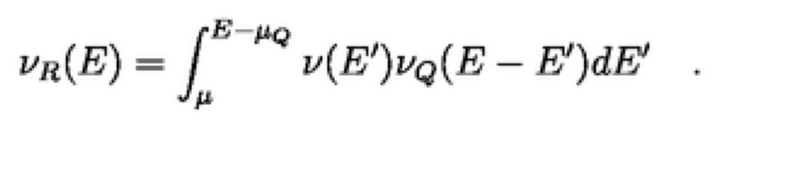

vRE ) # FEVER VERDURE - E"ODE ".
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x19\xd6IDATx\x9c\xed\x9d{PT\xd7\xfd\xc0\xbf\xf7\xee]`Y`\x01\xdf\xe2\x0f[\xad\x89\xd1\xf8\x88o\x14\x94\x80\x80\x8a\xa64\xd1i;\xce\xc41\xb5\xbe\xc0 \x12\x82\xbcD\x115Z\xc1NL;\xd3\xe6\xd1\xa9\x1dc\xac\xc15XP\x10"\x88\x1a\xb5\xad:N\xda$\xb51\x93\x94\x87YXXv\xd9\xd7}\x9c\xf3\xfb\xe3;{s\xe5\xb1>bX\xd1\xfb\xf9\x83\xb9\xdc\xc7\xb9\xe7\x9es\xbe\xe7|\xbf\xdf\xf3=g\x19J)\xa8\xa8\xa8\x0cLX_g@e\x00\xa0\xf6\xf2\x8f,\xaa\x00\xab|\x07\xa5\xb4WYe\x18\xc6\xfb\r*\xbeB\x15`\x15\x00\xcf\x18\xcb0\x8c,\xabJl6\x1b\xa5\x94\x10"\xdf IR\x7fgQ\xa57T\x01V\x01J)\x8aeKK\x8b\xc5b\x91O\xa2T\x9bL\xa6\xe8\xe8\xe8\xce\xceN\x96e\xcdfsKK\x0b\x00h4\x1a\xdf\xe5W\xe5;T\x01\xf61\xfd\xa6\x91\xf6\xf5"\x14T\x9b\xcd\x96\x9c\x9c\xbcn\xdd\xbag\x9f}v\xd1\xa2E<\xcfSJEQ$\x84\x14\x15\x15M\x9c8\xd1`0\x18\x8d\xc6\xa4\xa4\xa4\xd4\xd4\xd4\x05\x0b\x16\xd4\xd4\xd4H\x92D\x08\xe9\x9f\xcc\xab\xf4\tU\xf1\x1d\xa2(\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


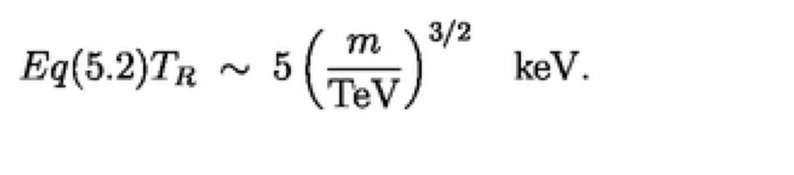

Eq(5.2 )R - 5 ( Gov ) " kev.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1c8IDATx\x9c\xed]{P\x14W\xd6\xbf\xdd==\xc3\x0c0\x08\x8a\x0f\x12\xdd\xca\xea\xaeVb|\x07W\x04\x15\xb0\x14\xd0\xf5]\xc6$\xeb*FEI|\xa1\xa2\xa2 \x18\xb0">\xb2\x04\x89\x96Kv\x8d\xbb\x82O \x8a (A\xd4Xq\xd5\xaa\x8d\xa9J\xb6\x92U\xac\xcd*.\x0230\xef~\xdd\xef\x8fS\xf4\xd7\xce\x0c\xc30\x83\xca\x98\xfe\xfd15\xfd\xbc\xe7>\xce\xb9\xe7\xde\xf3\xbb\xb7\t\x8c1\x92!C\x86oB\xf1\xa2\x05\x90\x81\xecl(A\x10/J\x12\x19>\x07B\xee\x81e\xc8\xf0]\x90/Z\x80.\x00c\xdc-\xe6\xa6K/\xe1y\x9e\xe7y\xef\x13u\x81\xd6\xd6V\xb3\xd9\x8c\x10jhhhkk{\xa6i\xc9x\xc9\xe03=0\xc6\xf8%\xf3-!G\x8d\x8d\x8d#F\x8c\xa0i\xfa\xf5\xd7_W*\x95\xf5\xf5\xf5555\xfd\xfa\xf5{\xf9\xf2+\xe3Y\xc07z`\xb15\x9bL&\x0f\x9eeYV\x10\x04\xf1\xb0\xa1\xa1\x01!$\x08\x82h\xbc\x04A`Y\x96\xe7y\x8e\xe38\x8e\x83\x9b\xa1\xe3\xad\xa8\xa8\xa8\xa8\xa8\x10\x0f\x1do\xf6\xb8\x7f\xe68\x0e!t\xf0\xe0\xc1\x05\x0b\x16\xb4\xb5\xb5\r\x1b6\xec\xdc\xb9s?\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


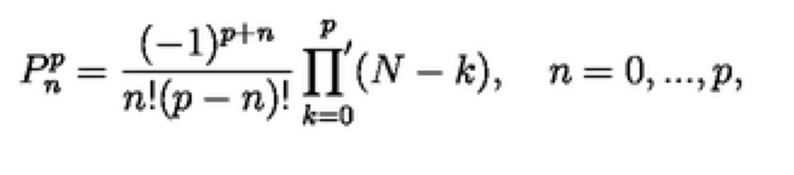

PERSON N.W. n.O.P.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x11\x95IDATx\x9c\xed\x9c{LT\xc7\x17\xc7\xe7>\x96\x85\x15pAk}\x94\xa8\xb5*\xb1\x8d\xa6F#\xd8."\x08\xb5\x05\x95*\xb6\xd1\xc6\x10jU`UP@E+\x0bBk\x8c\x8f\xc6\xda?\xb4\xf5\x8f\xc6G\x04\x15\x11e\xa1\xd5\x15P\xa8\xa0\xa6\xd6\xa4\xcf\xb4\x06\x92\xa6bAd\x17\xf6}_\xf3\xfb\xe3\xc8v\xcb\xc2\xb2\xac\xa8\xdd\x9f\xf3\xf9\x83\xc0e\xee\xcc\x99\xb9\xf7{\xe6\xcc\x99\xd9\xa50\xc6\x88@ \xf8&\xf4\xb36\x800\xf4\x0c\xe8\x941\xc6O\xd4q?s\x03\x9e\x1f\xa8\xe7|\x1c1\xc6\x14E=k+\x1e\x17\xe7^H\x92D\xd3\xb4\xf3\xbfz\x15v\x94|B}\x7f\xe6\x06<W<\xbf\x02\x96$I\x92$\x96e\x9ft+\xa2(\x0e\xf6.\x99L\xe6]s \t\xab\xd5*\x97\xcb\x9dU\xd4\xcb$\xab\xd5:l\xd80\xf4\x04$\xf4\xcc\rx\xde\x18\xe2\x10Z\x14E/\xde\xd7g\x02M\xd3,\xcb\x9a\xcdf\x87\x0b\x93$\x89\xe7\xf9\xa1\xf5h4M\xcb\x06\xcf`m\xb0Z\xad\x82 \x88\xa2HQTmm\xed\xf8\xf1\xe3-\x16\x0bB\xa8\xb3\xb3\xf3\xfe\xfd\xfbf\xb3\xb9\xa5\xa5\xa5\xb9\xb9\xf9\xde\xbd{\x06\x83\x8

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Taft, - E W.B.W.B.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\r\x1aIDATx\x9c\xed\x9cOL\\E\x1c\xc7\xe7\xfd\xd9\xc7\x9f\xb4D\xc1\x04]\xa9\xb5\xc6\xa4\x1eZM\x9b\xc6\xc8\x81jC\xb7\xa5,lh\xa9\x07\x0e\x9ah\x03\xd5v\x81\xa2\x85"\xf4\x8f\x05\tB1\x1e\x88\xa9\x07MLH\xf5PZ\x8b\xc2\xd6\x12H\n\x8d\x0b\x04O\xde4\x14=\xd8B\xf9\xb3\xbb\xec\xb2\x7f\xd8\xf7\xde\x8c\x87_yY`\xb7,t\x0b\xbc\xed\xefs\xd8\xb0og\xe6\xcd\xcew\xbe3\xbf\x99y\x0b\xc7\x18#\x08\x82\xe8\x13~\xbd+\xb0Q`\x8c\xe1X\xa6\x0bP\xa6P\xd0\xc0\x84\x10\xa2(\n\xc7q\x1c\xc7\xadwE\x90GA)\x05\xa5\xd6\xbb"\x1b\x88\x18\x1bXUUUU\xa3L\xac(J\xf4\x89W\x01\x9bg\xd9\x94\xa2(\x12B|>\xdf\x93\xab\xcc\x06aC\t\xb4Rx\x9e\x17E\xd1\xeb\xf5\x86\xd54z\xb9\xe3\x890\x06\xa6\x94\xca\x0b\x89\xb2,UU\x05A\x10\x04a\xd1E9\x1c\x94RQ\x14\x05AxB-N)\xe5\xe6\xa1\x94\x86M\x03\xb7\xf6\xf9|UUUo\xbe\xf9fss3!$\xfa\xef\xbb^\xc4\x87@+\x02\xc6\x11\x9b\xcdV\\\\\xfc\xfa\xeb\xaf\xbb\xddn\xb20\x96\x8eF\xee\xb8$\x8c\x81y\x9e7,$\x9a\x8

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


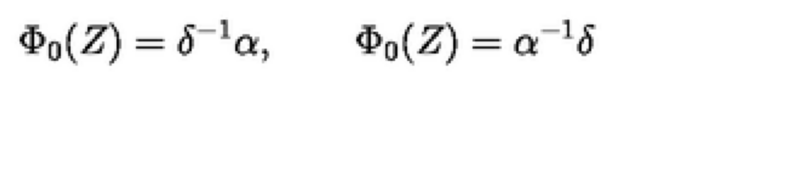

go (2 ) #8-tax (2 ) # acts
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x12\xcfIDATx\x9c\xed\x9d}L\x14\xc7\x1b\xc7gwo\xb9\x03\x04=\xa8\xd6\xa8\xf8\x8b\xb6\xb6\xb5\xb6i\xf5PIT\x8a \x08*15\xad\xb5\xb6\xb5\xb6\x89A*\xc4\x17\xd0\xfa\x02\x1a\x15\xac%\xd2\xc6V\x1a\xa3\xc6\x17Llb\xb4\xd8\x8a\xa2\x80\xa8`4\xa9\x9aX\xfb\xb7i\xd2\xd8\xa2\xbc\x1cw{\xdc\xdd\xde\xbe\xcd\xef\x8fG\xc6\xed\xde\x0b \xd8v\xeb|\xfe0\xb0\xb7;\xf3\xcc\xf7y\x9e\x99\xd9\x999d0\xc6\x88B\xa1\x98\x13\xf6\x1f\xac\xdb\xec}\x07\xc6\xd8\xecM\xa0\x98\x1d\x86\x86 \x85b^\xfa7\x02\xf7%\xdb\xfb\xd8#`\x8c\xbb\xbb\xbbC\xde\x1cnd\xfb\xb7\xf55\xa2(\x8a\xa2\x18\xf2\xa3p\xa6\xf6\xb7\t}\x19\xe4\xff)Y\xfe\xe6z\xffm\xde\xff\x97`L\xe0\x08\x11\xa3i\x1a\xc30\x86;\x83of\x18F\xd3\xb4\xe02\xc9\x9d\x18cM\xd3:::\x92\x93\x93;;;UU\xd5\x17\x821f\x18\x86T\xa4\x7fV_\xfb\xdf\x8c\xa1\xa5\xb2,+\x8a\xb2y\xf3\xe6\x92\x92\x12EQdY\xd6\xdf\xac\x17\xca\xd0\xf6^\xc51|\xa4\x97"\xd8\x0cR\xe6\x00Z\xd6\x0b\xaa\xaa\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


briefby (1 ) - gobt ( L )OR ) - 8 ( to
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x13\xb0IDATx\x9c\xed\x9ckP\x94\xd5\xff\xc0\xcf\xb3\xcf^X\xd8]\x04g\x00Qd\xc2n\xeaTR\xa0\x02\x81\xc8M@\x1a\xa8\xd4\x195\xc3\x9a\x10\x0ba\xb8{\x05\x16AFC1/5\x95\x99\x93\x8d\x96&*rU@2\x13\x03}\xd3\xa4M\xcd\xd4\x98\x91 \xe2\xc2\xee\xb2\xf7}\xf69\xff\x17\xdf\xe1\xf9o\xcbE\xc0\x05\xdc~\xe7\xf3\xea\x99\x87\xf3\x9c\xcb\xf7\x9c\xef\xed\x9c\xb3P\x18cD \x10\x1c\x13\xdeTw\xc0\xfe`\x8c\x89U\x9a \x88l\x9f4\x9et\x05\xc6\x183\x0c3\xfa\xf2,\xcbR\x14EQ\x14B\xc8b\xb1LX\xbf\xfe\x0b\x10\xd9\xfe\x07\x18\x95\x02O\xa1\xd1\xa5(\x8a\xcf\xe7?\xb2\x18\xd7C\x1e\x8f\xd7\xdb\xdb\xdb\xd5\xd5\x85\x10\xa2iz\x84\xf2\x93\xe3L\x9ed\x975A\xb2\x1d\xb9\xaa1\x99\x8c\'\x1c\x96e\xcdf\xf3\xd4\xce\xefH\n\x8c16\x9b\xcd\x08!\x8a\xa2\xa6\xc4\xe2\xea\xf5\xfa\xae\xae\xae}\xfb\xf6\xe9\xf5z4\x8c\x1d\x815\x01=dY\xb6\xa6\xa6&&&&--m\xc9\x92%MMM\xf0\xd2\xe6\x13\xce\x93P\x14\xc50\xcc\x04M\x00T;\xd8eY/\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


brief # Out-Out-to-# SITEX ( Inter-N.,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\r\xa3IDATx\x9c\xed\x9dkPT\xf5\x1b\xc7\x7f\xe7\xec\xeea\x97].\x12a\xc0\xd8\x85\x123\'\xcd\xd4\x174\xa1 \x82E\xc0\xe0T^\xca2h\xd2P\x98\x84\x08JY\xaa\xcd\x17*\xda\x0b\'\x07\xea\x8dc/\x18\xd7\x82\x10X\x02\x84B\x1d\xc6\xf2\x9235\x19]\xa6\x17\xa9\r\x81\xb17\xd8\xdb\xb9\xfc\xfe/\x9e?\xc7m\x81\xf5\xb6,\xee\xfa|^0\xbbg\x7f\xe7\x9c\xe7\xfc\xe6|\xcf\xf3\xfc\x9e\xdf\xf3;0\x94R\x82 Hh\xa2\x9ci\x03\x82\x84\xfc\x9cb\x18ff-A\x90\x00\xc2\xce\xb4\x01\xc1@\x14Ef\x1cI\x92f\xda\x1c\x04\t\x18\xcc]\x12B[\xad\xd6\xb1\xb1\xb1\xd8\xd8\xd8\xc8\xc8\xc8\x99\xb6\x05A\x02F\x98{`Q\x14)\xa5\xc7\x8e\x1d[\xb6lYiiibbboo/l\x9fi\xd3\x10$\x00\x84\xb3\x80)\xa5,\xcb\xba\xdd\xee\xc2\xc2\xc2\x15+V477\'\'\'755\x11B0\x90F\xc2\x83pNb\xc1\x88W\xadV777\xc7\xc5\xc5\xfd\xfb\xef\xbf\x83\x83\x83\x89\x89\x893m\x17\x82\x04\x8cp\x1b\x03\xc3\xe5@\xaa\x99R\n\x1afY\xf6\xec\xd9\xb3\xcf?\xff\xfc\xa5K\x97,\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


W (a ) # a "a,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1a(IDATx\x9c\xed\x9dyTT\xd7\xfd\xc0\xef[fc\x86m\xc01*\xb5\xea9Ul\xac\xa7.\xd1\xa0B\x01\x17\xa0\x80k\x8e\xad\xb1=\xa71j"\xe2\x16DV\x03D\\H$\'\xe9\x11\x1b\xab\x89\x89Iz""\xb5 \n\x16,\xc4bN\xab\x9e\x98\xd8\xa6\xb6I8.\x18\x15\x9c\x19f\x9fy\xdb\xfd\xfd\xf1\xfd\xf1\xfad\x16\xc4`\x05|\x9f?r\xe4\xcd}\xf7}\xef\xf7\xdd\xef\xbd\xdf\xfb\xbd\xdf\xfbB`\x8c\x91\x8c\x8c\xcc\xe0\x84|\xdc\x02<60\xc6\xf2\xe0%3\xd8!\xe4N,#3xy\xe2f`q\xe2\xb5X,\x0e\x87C\x1e\xbfd\x065O\xa2\x01\x13\x04\xb1l\xd9\xb21c\xc6\xfc\xe8G?\xb2\xdb\xedp\xf1q\xcb%#\xf30<Y\x06\xcc\xf3<I\x92\xf5\xf5\xf5\xad\xad\xad\xbf\xfa\xd5\xaf,\x16\x0bEQ\x8f[(\x19\x99\x87\xe7\xc9Z\x03\xf3<\x8f\x10\x9a2eJ||\xfc\x9bo\xbei\xb5Z\xf5z\xfd\xe3\x16JF\xe6\xe1\x19\xa030\xee;\x0fR\'EQV\xab\xf5\xca\x95+#F\x8c\xa0i:<<\xfc\x7f\xd0\x16\x19\x99G\x07\xfd\xb8\x05\xf0\rA\x10\xfd^\'\xc7q\n\x85b\xff\xfe\xfd4M\xaf[\xb7\x0e\xcc\xfeQ<\xe8Q0\x90E\x1d\xc8\xb2\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


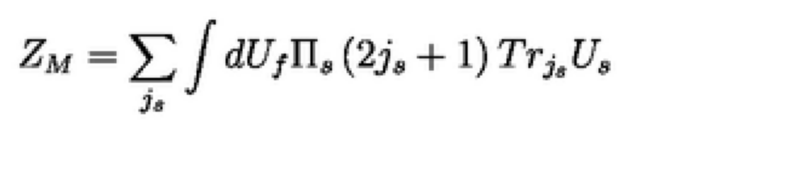

zm - E ( Duffo ( 2jot ID TriscoU.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x19\xffIDATx\x9c\xed]{P\x14W\xd6\xbf\xdd==\x0f\x1c\x81\x19E$\x8eD\xdcDL\xa1\xd1\x18#\xb8\x11A\x84\x11AW\xc3\x9a\xec.>*[nT\n\xdd\xa8\x08Q\x19\x10|\x1041\xa6\\w+V\xa5\xd4\xc4\xa8\xe8.\x90\x05\x95\x87\x80\x82\xaf\xcaf\xd7\x7f\xf6\x9f\xddM\xc5lJA\xc7a\xde\xef\x99\xee\xbe\xdf\x1f\'\xf47\x99\x97\xe0\x07\x98\xf9\xec\xdf\x1f\xd6Ls\xef\xb9\xe7\x9e\xc7\xbd\xf7\x9cs{$0\xc6H\x80\x00\x01\x91\t\xf2i3\x10\x01\xc0\x18\x0b\xcb\x9c\x80\x9f&\x08\xc14\x05\x08\x88\\\x08;pH\xf0\x1b\xaf\xd9l\xb6\xdb\xed\xc2J\'\xe0\'\x08\xc1\x81C\x02cL\x10\xc4/\x7f\xf9\xcb)S\xa6\xbc\xf8\xe2\x8b6\x9b\r\x1e>m\xbe\x04\x08\xf8_\x08\x0e\x1c\x1c,\xcb\x92$\xd9\xda\xdaz\xf3\xe6\xcd5k\xd6\x98\xcdf\x8a\xa2\x9e6S\x02\x04\xf8C\x88\x81\x83\x83eY\x84\xd0+\xaf\xbc\x92\x99\x99\xf9\xd1G\x1fY,\x16\xa5R\xf9tY\xc2\x183\x0c\x83\x10"I\x92$I\x96eE"\xd1\xd3ei\xb8\x00\xd2\x1e\xfc\x12\xc90\x0cEQ\x04A\x0c~\x08\xb0\xf3\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


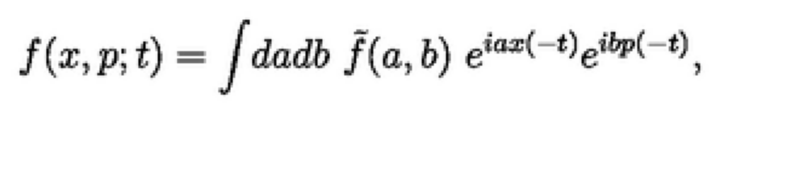

flux,pixt ) - f dadd F (a, b ) etax (
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0e\xc4IDATx\x9c\xed\x9cyLTW\xfb\xc7\xcf]fa\xdf*6mS\xa36iR\x1bj\xd4\xaa\x90\x12L3\x94\x01\x01\x97\xd6j5i\xd1hbE\r\x05\x11c)BA\xaa\xb6\x80\xd5\xb4D\xed\x16\x0bJ\x0cD\xa52\xb2\xa9X)\xb5\xd8%5\xe9?\xadM\xfaG[\x15f\x01f\x81\xb9\xdby\xffx^n\x86\x99a@}\xfd\xf5\xbd\xef\xef\xf9\xfc5\xdc9\xf7\x99s\xef\x9c\xef}\x96\xf3\x0c\x0c\xa5\x94 \x08\xa2M\xd8\x7fz\x02\xff\xcb\xe0\xc3\x11y\xd8\x04\x170\xa5T\x14EI\x92\x02\xdf\nz0\x10Y\x96eY\x9e\xec]Ji\xd0\xc5=\xa5qI\x92B\x98\xbd\xa7\x19>l\x14Ea\x18\xc6\xef\x88$I\xa2(\xa2\xb0\x91\xff\x14L\xe0bR\x14\x85e\'\x15\xb6\xdf\xa2\xbcWdY\xa6\x94\xf2<O\x08\x91$\x89a\x18\x8e\xe3\x1e\xc4\xe0?\x82(\x8a!\xde\xd5\xe9t\xf0\xc2\xe3\xf1\x18\x8d\xc6\xc9n&\x82<8A\xd6\x16\xcb\xb2\x0e\x87c\xcf\x9e=\x15\x15\x15~\xee\x82a\x98#G\x8ex<\x9e\x10\x16\xc1CZ,\x16\x8b\xc5\xa2\xfeI\x08Q\x14\x85R\xcaq\x1c\xcf\xf3\x0e\x87chh\x88\xe7y\x8e\xe3\x14E\x81\x01\xa

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


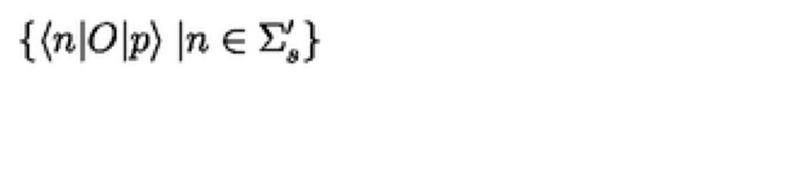

( In cite #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\rkIDATx\x9c\xed\x9c{L\x1c\xd5\x17\xc7\xef\xcc\xec@\x87\xdd\xe5\xb1\xd2\xd4\x94\xad\xd5\xb6\x7f`\xdab\xab\x18\xa9X+\xac"ei4iL}\x15\xa3&\xb61\xb5Z\xa1\xa9\x10\xa84\xf5Aiib\xd2\x98\xf0\x8f&jkMcm\\\xb2H\x80\xd26\xd0\x15E\xfb\x87&6\xb151)\xb4,\xfbb\x1f\xc3\xee\xcc\xce\xdc\xdf\x1f\xe7\xb7\xeb\xb2,\xb0 \x05\xb6\x9e\xcf\x1f\xb0;sg\xe6\xde\x9b\xfb\xbd\xe7\xdc3\xe7.C)%\x08\x82\xa4&\xecBW \x05\xc09\x0eY\xb4\xa0\x80\xa7BQ\x14B\x08\xc30\x0b]\x11\x04I\x0c\nx*8\x8e#\x84\x8c\x8e\x8e.tE\x10$1(\xe0\x04PJUUu:\x9d\'O\x9e|\xec\xb1\xc7\xf2\xf3\xf3\x03\x81\x00A_\x1aY|\xa0\x80\x13@)e\x18\xe6\xea\xd5\xabW\xaf^\x1d\x1b\x1bs:\x9d(]dq\xa2Y\xe8\n,FX\x96%\x84\x14\x17\x17\x17\x17\x17\xeb\xf5\xfa_\x7f\xfdU\xa3\xc1\x8eB\x16#8.\'%\x14\nq\x1c\x07\x0b`\xb4\xc0\xc8\xe2d\x96.\xf4d\x03\xfaN\x1a\xe8,\xcbj4\x1a\xb0\xc6\x08\xb28\x99\xcd\xe8TU5\xfaf\x85R\x1a+Z\x86aTU\x9d\x9b\xaa\xdd)\xc4u\x11\x82\xcc!3\x160\xa5\x94e

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GO (B ) # BB.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x07\x8eIDATx\x9c\xed\xdbKLSM\x1f\x06\xf097z\x83\nU#\x81D$.\\\xaa\x0bP\xb9\xd8\x84\x1a\xb9Ev&\xeeL0\xba\xb0\x0b\x93B(\x01T\x02\x88\x11\x8dlT\x16$nL$11\x9ap\x17\xd2\x82&$\x92\x98\xe8J]\x19\xe3\x02\\\xb4\x18\n\xbd\x9d\x9e\x99o1\xb6\xf4\x05\x15\xbe\xef\xf3\xad\x0c>\xbfE\xd3NO\xcf\x99&}\xce\x7ff\xce\xa9\xc4\x18#\x00 &ycS*\xd2\xc86\xc06\'!\xa5\x00\xe2R\xd7\xbdN$\x12\xba\xaek\x9aF\x08\xe1OTu\xfd6\x00\xb0M\xac\r\xa1u]\'\x84\xf4\xf6\xf6Z\xad\xd6\xc1\xc1\xc1\xc1\xc1A\xab\xd5\xda\xdb\xdb\x9bz\x0b\x00\xb6\x9b\xb5\xea*\xcb2!\xa4\xa2\xa2\xc2\xeb\xf5\x1e9rD\x96\xe5\x8e\x8e\x0e\xa7\xd3\x99z+3(\xa5\x86al\xba\x19\x1f#\xfc\xc2\xba\x93\x8e\xa2(\x99\xfc\x16\x00\x99\x8190\x80\xc0\xd6*\xb0a\x18\x8a\xa2\x0c\x0f\x0f\xfb\xfd\xfe\x9c\x9c\x9c\x92\x92\x92\xea\xeaj\xb2\x85Z\xf7\xbb\xf0\x0e\x8c\x8f\x8f\xcf\xcf\xcf\xcb\xb2\xac\xeb\xfa\xcfN.V\xab\xd5\xe3\xf1\x98L&\xc6\x98$I\xe9o\xf1\x96h4\xda\xde\xde\x1e

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


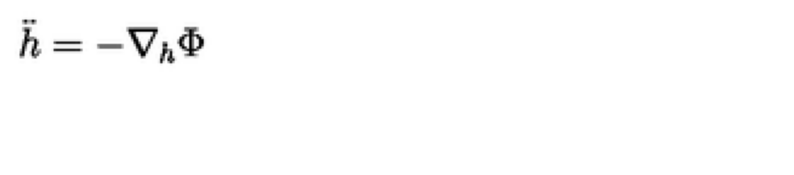

in-One COUNT
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\r\x1aIDATx\x9c\xed\x9c[L\x1cU\x18\xc7\xcf\xdc\xf6\xc6\xd2\xdd@T\xda\xa4\x17\xd3\xa4O\xc6\x17E\xa9\xa6\x91\x14\xa9\xddeSM\xd3\xa8\xa1\x89\x15\xd2.\xa0\x8d\xa4\xd8\x80IA\xd0\xb6*\r\xf0`LZ\xad\xc1h\x8cQ\xb0\xdbE.m\t\x98\xa5\xb7\x84\x94h\x13S\xa2\x0f\xdaX\xa3x\xa1\xb0\xb8\x9d\x85\x9d\xab\x0f_:\x1d\xf6\xca\xeeB\xcb\xc8\xf7{ \xbb\xb3\xb3g\xfes\xce\xf9\x9f\xf3\x9do\xceB\xa9\xaaJ\x10\x041&\xf4R_@U\xd5e>F,\x7f\x85\x04E"\tXB\x03C[R\x14EQ\x94$I\xcb\xb3i\x15E\x01\x85\x84\x10Y\x96\xef\xb5\x9c\xf8\xa0H$\x11\xf3\x0c,IR\xf2\xb3\x17bBY\x96eYVU\x15\xdarbb"\x14\n\xb1,\x0bo\xb3\x04\n\xcf^\xa4v\xa74MOMMMLL\x10B\x18\x86\xc9^!Y\x98\xc8\x85\x80"\x91\x94\xcc30\xcb\xb2IN\x85!6e\x89\x0c\xc30\x0c\xa3\xaaj(\x14z\xe1\x85\x17\xaa\xaa\xaa\x1e~\xf8\xe1\xc6\xc6\xc6[\xb7n\x91\x85\xb9+e\xe1\xd9\x8bdYVQ\x14EQ\xfa\xfa\xfa\xb6m\xdb\xf6\xea\xab\xaf>\xf5\xd4SCCC\xb2,+\x8a\x92\x8d\xc2\xb8"\x15E\x11\xe3\x91\xbc6P\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


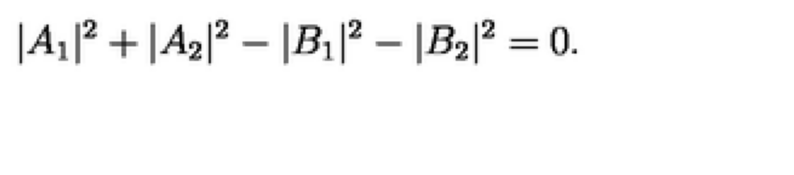

IA213 +1A2IP -1B2IP -1B2IP #0
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\t\x84IDATx\x9c\xed\xddYHT_\x1c\x07\xf0s\x17o\xa3\xe3\x8c\xa3\xa6-\x8aK\x04E\x0fV\x16\xa4\x88Z\xb9\xa0\xfd\xb34+$\x04+\xa8\xac\x0cI,\x97\xa2l\xb0\xc2\x10}\x11\x82\x16|\xb0\xc2\xe5\xc1%&M4\xd3J\xa4\xc5\x87 \x92\x12\x12\x94\\Z\xc6\xd1Q\xa7\xb9\xcb\xf9?\x9c\x9c,M+k\xf4\x8e\xbf\xcf\x83\xc8\xe5\xce\xcc\x19\xf0{\x7fg\xbbW\nc\x8c\x00\x00\xf2D\xcfu\x03fe\xe2\xd5\x07\xaeD`\x01\x92k\x80I\\)\x8a\xb2\x1c\x99\xf8;\x00\x0b\x84,\x03\x8c1&q5\x18\x0c\x96#F\xa3Q\x14\xc59m\x17\x00\xd6\xf6\xe7\x01\x16EQ\x10\x04A\x10$I\xfa\x8b\r\x9a\x11\xc6\x98\xc4522\xd2\xdb\xdb;66V\x10\x84\xb1\xb11WW\xd7\xac\xac,I\x92\x04A\xb0f{\x00\x98C\xbf\x17`\x12\x1e\x84\x90$I\x0c\xc3\xb0,\xcb\xb2,M[\xb5\x8c\x0b\x82@\xd3tNN\x0e\xc68==\xbd\xba\xba\xfa\xcb\x97/\x1c\xc7\xad]\xbb\xf6\xe9\xd3\xa7\x82 @_\x1a,\x1c\xeco\x9dM\xb2!I\x12M\xd3\xf7\xee\xddkmm\xe58.000""B\x14E\x86a\xfeM#\xa7h\x83\x87\x87GFF\xc6\xe1\xc3

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


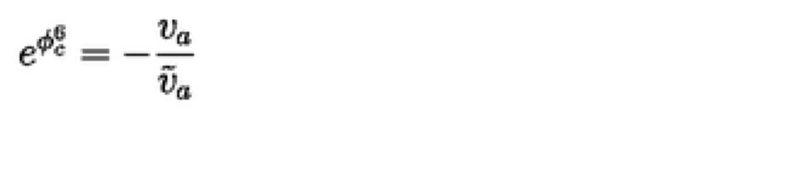

eiff # #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x06\xfaIDATx\x9c\xed\xdc\xcdk\x13\xcd\x03\x07\xf0\xd9\xd9M61\xa4M[\x11\x8c\x07\x11\x0f\xfe\x03Z\x10\x1b\x8b`\x8b5\xd2R\x0f\x1e\xc5\xd7"jQ\xd0V<\xa8\xa0\x05\xb5T\x0fU\xa1\x14\xc4\x83\x07ET\xf0\x05\xab\xbd\xe9\xa9\xd0\x8b\xe0E<X\xd0\x83Xi\xb2\xd9\xbcmvwv\x9e\xc3\xfc\x1a\xd7&\xfd=m\x9f>O3\xe5\xfb9\x94t\xb2\x99\x99-\xf9ffv6U8\xe7\x04\x00\xe4DW\xba\x03\x8b\xc39\xc7\'\x0e@\x99L\x01v]WQ\x14EQV\xba#\x00\xb5B\xa6\x00k\x9aF\x08)\x14\n+\xdd\x11\x80Z!A\x80\xc5\x9c\xb9P(\xf4\xf7\xf7777\x0f\x0e\x0e\x12B\x1c\xc7Y\xe9~\x01\xac<\t\x02\xec\x97\xcf\xe71\x02\x03\x94i+\xdd\x81\xb9\\\xd7\xad,\xa4\x94\x06\x83\xc1\xc1\xc1AEQ\xb2\xd9\xec\x7f\xdf+\x80\xdaTs\x01\x16\x0b\xddJ\xae\xeb\xba\xae\x9b\xcdf)\x95l\xd6\x00\xf0\xef\x99\x9b\x16\xcey\xd51\x90\x10\xa2\xaa\xea2\x86\x871&\xea,7\x1a\x08\x04l\xdb\x1e\x1d\x1d\xb5m[Q\x14\xb1\xf4\xa5\x94z\x9e\xb7}\xfb\xf6\xe6\xe6fJ\xa9\xe8@\xe5N\x92X\x12\x8bk\xd4\x9e\xe7\x8

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


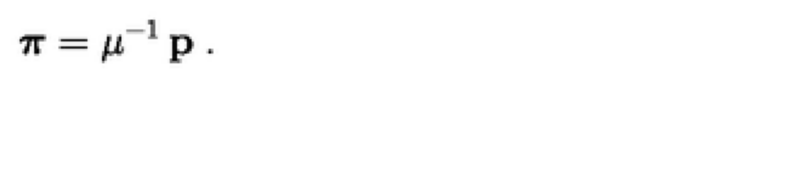

THE HAPP.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x12\xb0IDATx\x9c\xed\x9cyLT\xd7\xf7\xc0\xef{o\xf6aGm\x83[kS5\x16\xa3U\x89\x82\x15\xa1Q\x8b\x8au\xa9\xd2\xd0F\x1b\x15cE\xb4:(\xa8\x0c\x08Z$\x08n\xd14\xadTm\xd2\xd6\xad\x8b\xdb\x80A@P\x02\xd5bR\xffh\xda\xa41\xb6\xb6T\x11f\x18\x96\x99y3\xf3\x96\xfb\xfb\xe3\xfc\xe6}\xc7\x19\x18\xf8\x0eh\xbfc\xef\xe7\x0f2\xbc\xf7\xce\xbb\xf7\xdc{\xcf9w93\x14\xc6\x18\x11\x08\x84\xc0\x84\xf6qO\xb2\xed\x7f\x9b\x91?\xf7\xfa\xfa\xad\xe0s\xdf2\x01\x87/\x03\xa6(\xca\xe3\x03 \x8a"\xc7q\xa2(>\xc5z\r*\x1c\xc7q\x1c\'\xfd\x8b1\xf6]\x7f\x0f}\xfb#\x12Xx+\xd8\xcf>\xf5\x16\xec\xbf,\xe1i@\xf5\xe6Sy\x9e\xe78N.\x97#\x84\xe0\x83L&{\xb6u\xfb\xc7\xb0Z\xad\n\x85\x02t\x7f\xfe\xe08\xce\xe9tj\xb5Z?d\x9f\xef\x96\tDz\x88\xc0\x10\xac\xf6\xed\xdb\xa7\xd1h\xca\xca\xca\xca\xca\xca4\x1a\xcd\xbe}\xfb\x10Bv\xbb\x1d!TYY\x99\x9f\x9f\x7f\xe3\xc6\r\x84\x90 \x08\x1e\xe2\x82 x_\x04x\x9e\xef\xed\xd6\xd3\x00|\x93\xddn\xd7\xeb\xf5\x85\x85\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


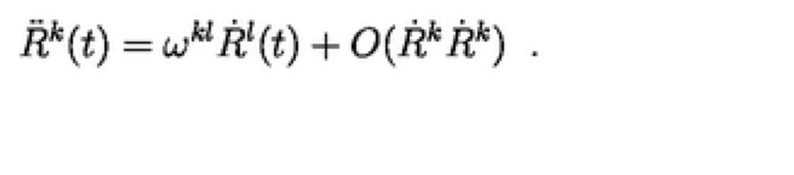

rect ) - WORLD - O (R.R.S.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0e~IDATx\x9c\xed\x9d{l\x14\xd5\x17\xc7\xcf\xcc\xecl\xbb\xed\xb2\xdd\xb6\xd0`\xd1\x82\xf5\x8fB0\xc6G\x8cQ\x90Z\x1a\n\x08\x81\xaa\xd4\x04%\x11\x89\xa2(\x10(\xc4\x96\x14)5>BS1\x8a\xd0\x18\xa3\x12m\x88\x86\x04\x8a\xb5\xbc,\x04\x90\x82\xd0B\x81h@\xf1\x91\x18)\xafvw\xbb\x8fN\xe7u\xef\xef\x8f\xf3\xeb\xb0\x94v\xd9\x96b\xd9\xf6|\xfe(ez\xf6\xde;\x9b\xfb\xbd\xe7\xdc{\xcf\xdc\x118\xe7@\x10Dlb\x1b\xe8\x06\xdc\x89\xe0\xa0&\x08\xc2\x8d\x17o\xbcN\x10\x03\x88@\x1e\x98 b\x17\xf2\xc0]Q\x14E\xd34Q\x14\x87\r\x1b\x06\x00\x9csA\x10\x14EQUU\x96eM\xd3\xe2\xe3\xe3\x1d\x0e\xc7@7\x93 \x00\x00\xc4\x81n\xc0\x1d\x84a\x18\x00\xb0i\xd3\xa6\xcc\xcc\xcc{\xee\xb9g\xf6\xec\xd9\x9a\xa6\xe1\xc5\xca\xca\xca\xac\xac\xac\xf4\xf4\xf4\xfb\xef\xbf\xbf\xb2\xb2\xd22&\x88\x81e(\x86\xd0\x11f\xb3\xba\xae3\xc6\xca\xcb\xcb\xd7\xacYc\xb7\xdb\x9b\x9b\x9bSSS5M3Ms\xd9\xb2e\r\r\r\xbbw\xefNLLLLL\xfc\xcf[M\x10\xdd0\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


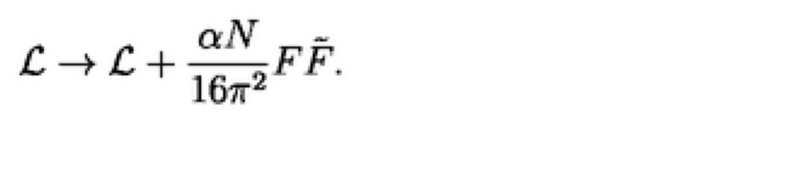

Litchieff.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0b\xd4IDATx\x9c\xed\xdcil\x14u\x1f\x07\xf0\xdf\\{\xb4\xbb\xdb\xda\x16\x0f\x0c1j\x0c\x11c0ZB\x15\xac`\x97v\x81RH\x0c\xa8h\x14mE[j\xd5v\xad\x9a\xb4]\n\x01\xadG\xc3K\x8f\x904!!B\xd2\x84\xa6\xbbl\xb7\x07\xa0-U<bB|c\xd4\xd4&*b\xd9^t\xf6\x9a\xe3\xff\xbc\xf8=\x1d\x96\xed\xfd\x94>\x8f\x93\xe7\xf7yAf\xb6\xb3\xff\x99Y\xe7\xfb\xbffF\x8e1\x06\x84\x10s\xe2g\xfa\x03cl\xa1\xd9\xfe\x0f\xbeB\x08Y\x0cnj\xe4\x18c\x1c\xc7\x19\xab\x9a\xa6\t\x820{)\x9a\xa61\xc6DQ\x04\x00UUq\xe1F\xd1u]\xd34\\\x96$\tw\xa7\xeb:\xcf\xf3s\x1e\x18b\x8c\xa9\xaaj\xac\xf2<\xbf\xa0\xaf\xcf\x93\xf1K&\xffz\x84,\xa9\xd4\x00\x1b\xe9\x1d\x1e\x1e\x06\x80\xac\xac,\x98+\xc3\xc6Wb\xb1\x98\xaa\xaa\x0e\x87ci\x0f\xf9\x9f\x07\xab\x83\x99V\tY:\xd7\x05\x18\x97UU}\xf2\xc9\'\xbf\xf9\xe6\x1bA\x10\xee\xb9\xe7\x9e\xda\xda\xda\xc2\xc2\xc2i/J\xec3\xf3<\xdf\xda\xda\x1a\n\x85\x8e\x1e=\x9a\x99\x99Y]]\xed\xf5z-\x16\xcbL\r\x116\xa7\xf3i\xfd\xb0\xe2

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


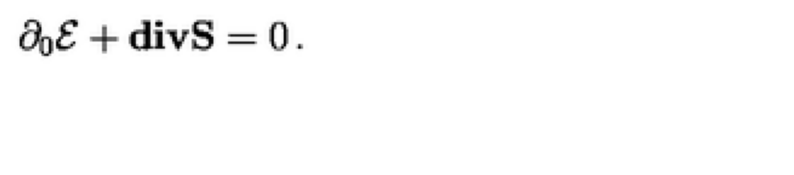

Que # DINS -D.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0fXIDATx\x9c\xed\x9c}PT\xd5\x1b\xc7\xcf\xbd\xec\xb2\xc3\x8b\x88\xce\xa4\xb6\x8e\xa5\x8ceMS`\x02A\x85"\x99c)j\xffd\x8c\xf9G\x96/\x99\xc8\xeb\x82\x89 kZm\xd04\xf9\xd6\xcb4\xd3\x8c\x8d\xe3\xa4\t\xc8;\xb8\xa0B#3j\xd6L6\xfd\xd5\xe48\x8e\x88\xca.\xec\xc2\xde\xdd\xbd{\xcf\xf3\xfb\xe3io\xcb\x82\x08B\xbf\xb8\xf4|\xfe`\xe0\xee\xdd\xe7<\xf7\xec\xf9\x9e\xe79\xe7<\xac\x00\x00\x8c \x08m"\xfe\xdb\x0e\xfc\x9b\x00\x00\xcd_\x84\xa6\xf9\x8f\n\x18u+\x08\x82 \x08>\x9f\x8fdLh\x94\x07\x11\xb0\xa2(\x8a\xa2\x8c\xaf\x1f>\x9fo\xdcm\xde\x0b\x00\x10\x04\x811\xd6\xd9\xd9\xe9t:u:\x1d\xfe9v\xb3>\x9fo\xecv\xc6\x05\xce\xb9,\xcb41Mz\x84\xe1?c\x9f\xcf\xa7\xd3\xe9\x02\xaf(\x8a\x12\x12\x12\xf2\x0fy\xa3Jk\x1c\xc1\x00\x1b\x12\x12"\x8a"\xf3\xa7\xcd\xfd\xfd\xfd\xef\xbc\xf3\x8e$I\xbf\xfe\xfa\xeb\xfa\xf5\xebw\xee\xdc\x19\x19\x19\x89\n\xc4\xb0<\xfc3*\x8a"\x08\x02\x1a\xbc\x97\xe7\x9cs\xce9\x00\xe8\xf5\xfa\xb1?\xc5\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


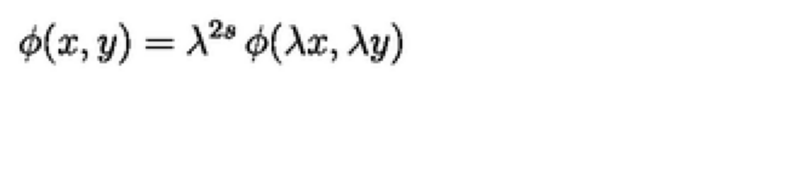

p(2r. 3 ) # AZEO,AY )
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x11\xfcIDATx\x9c\xed\x9d{L\x14\xd7\xdb\xc7\xcf\xcc\xec\x05v\x97e\xb9h\x11\x10\xb5&\xad\xb5\x89Z\x1a\xb0\x88U,P\xe5"B\x8d5\xda6\xc6k\xb5\n\x16\xb1\x8a\x16\x90xi\x15\xb5\xa5\xb1\xb5!\x06\x9b\xdaFc\xbd\x16D\x05\n\x885\xb6\x1a\x1bM\x9b\xd6X\x05c#\xe5\xa2\xec\xb2\xbb,\xbb;\xb7\xf3\xfe\xf1\x84\xe9\xba\xe0\x82\xb2\xb0\xee\xef=\x9f?p\x19f\xcf\xf9\x9e\x99\xf3\x9c\xe79\xcf93R\x18cD \x10\xbc\x13\xda\xb3\xd5\x93\xe1\x83@\x18\x08\x1e3`\x8c1\xcf\xf3\x14EyJ\x00\x81\xf0?\x80\xc7\x0c\x98\xa2(\x99Lf2\x99\xecv\xbb\xa74\x10\x08\xde\x8eg\x0cX\x14\xc5[\xb7negg\x8f\x1c9r\xef\xde\xbd\x08!\x8e\xe3<\xa2\x84@\xf0j<c\xc0\x1c\xc7UUU\xb1,k2\x99\xacV\xabG4\xf4\x84L\xc8\t^\x87\xcc#\xb5*\x95\xca\xcc\xccL\x84\xd0\xd7_\x7f\xed\x11\x01\xbdB&\xe4\x04\xaf\xc33\x1e\x182X&\x93\xe9\x99rzf\xb3Y\xd2#\x08\x02B\x08c\xfcL)$\x10\x9c\xf0X\x12K&\x93\xc9\xe5rO\xd5\xee\x88(\x8a<\xcf\xb7\xb6\xb6N\x9e<\xb9\xa3\xa3\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


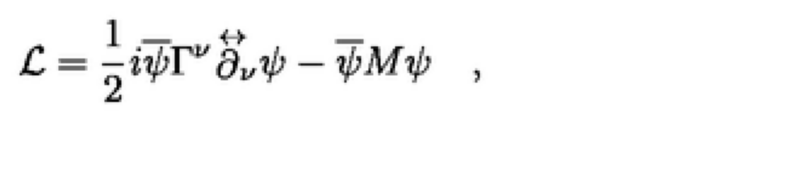

L-SIT-OUT-UM4,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0e\xb2IDATx\x9c\xed\x9c[l\x14\xd5\x1f\xc7\x7f\xb3\xdb\xede\xdbn\x9b\x12*\x82\x10\x95\x07\x11\x84\x14\xa94\x88\x02\xe5\xd6\x0b\x02\xd1\'5\xfa@D\x02\xbdP,`K\xbb\x94\x96R\x11)}\x10\x8b\x06\x95\x90 F\x03\x15\n]h\xb9\x14\x11\xa1M$\x01\x1f$D\x05\x13H\xd9vw\xdb\xdd\xedt\xef\xbb\xe7\xf7\x7f\xf8\xd1qz\xa1\xf2\xf7>\xf2\xfb<4\xb3g\xce\x9e\xfd\xcd\xe4|\xcf\xefrf*!"0\x0c\xa3Mt\xff\xb4\x01\xda\x80\x979\xe6\xdf\t\x0bx\x00\xf7\x12\xaa$I\xf7\xd3\x8da\xfefX\xc0w\x11B\x84\xc3\xe1ABU\x90eY\x11\xad\x10\xe2^\xdd\x18\xe6o\x86\x05|\x17\x9dN\x17\x15\x15\xe5\xf1x\xd4\xde\x95\x8em6\xdb\xec\xd9\xb3\xddn7\x00\x08!t:\x9d\xd7\xeb\x15B\xdc\xcf\xb0\x88\xc8\xee\x9a\xf9\xeb\xf8\xb7\x0b\x18U(\x8d\xe1p\x18\x870\xf4+\xc3\x0eH\x9e6\x14\n)-\x91H\x04\x00N\x9c8\xf1\xe6\x9boN\x9b6\xad\xb7\xb7\x17\xfa\xa5\x1b\x0e\x87\x85\x10[\xb7n\x9d6mZRR\x92\xcf\xe7\xd3\xe9t\xe7\xce\x9d\x9b8q\xa2\xd7\xeb\x85\x11c\xe9H$B.]\x92$\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


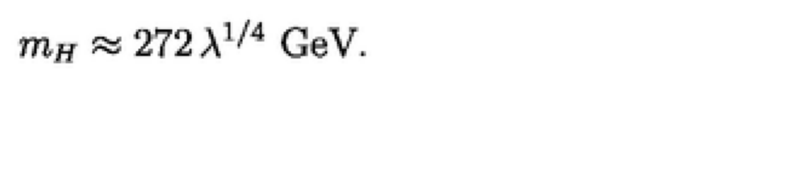

mass 2T2XIA GOV.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00"RIDATx\x9c\xed]{TT\xd5\xfe\xdfg\xde\xc3\x0c\x88\x80\x80\x94!\xd7\x8a2V+\x8c4\\B<\xe4])u+\xad\xcc{\xcdDAR\x90x\x8f0\x80\x96\xa8hY\xcb\xd6\xf5\xb6\xb0\xbae\x96"\t\x82\x81\x92\x98\xcf\xcbmU\xb6rUw!\x98\x82\x08\x0c\x03\xf3~\x9cs\xf6\xef\x8f\xef\x9d\xf3\x9bf\x06\x1c\xc6\x01\x04\xe7\xf3\x07k\xd8g\x9f\xfd\xf8\xee\xfd\xdd\xfb\xbb\xbf\xdf\xef\xfe\x1e\x02c\x8c\\p\xc1\x85\xc9\t\xceD7\xc0\x85;\x14\xae\x95\xfd\xf6A\x10\xc4\x98W\xe1\x1a\'\x17\\\x98\xbcp\xed\xc0.\xd8\x86B\xa1\x90\xc9d\x18c\x8c1A\x10\x9e\x9e\x9e\x13\xdd\xa2\xc9\x04\x82 0\xc6B\xa1P(\x14\x8eiE.\x06v\xe1O\x00v\x1d\x1a\x1a\n\r\r}\xfd\xf5\xd7\xdd\xdc\xdc0\xc6\x06\x83a\xdf\xbe}z\xbd\x1e\xe6\xe5D\xb7q\x12\x80\xcb\xe5\x1a\x8d\xc6\xec\xec\xec\xec\xecl\x92$9\x9c\xb1b4\xd7x\xb8\xf0\'\x00\x03\xcbd\xb2\x90\x90\x90\xae\xae.\x16\x8b\x05\xe9\x83\x83\x834MO^\x06\x86~\x8d[u\xae\x1d\xd8\x85\x89\x04A\x10\x1c\x0e\xa7\xbf\xbf\xdf\xcb\xcb\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


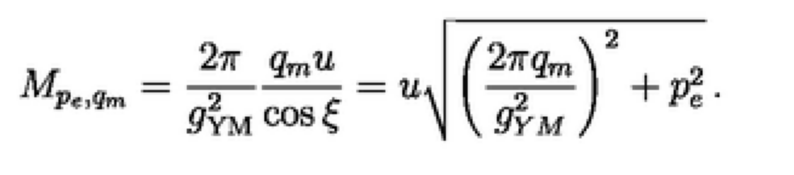

Mauson - W.O.S.S.S.S.S.S
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\rMIDATx\x9c\xed\xddmLSW\x1f\x00\xf0s_zi\xa1E\x06M\xa72]\xb6\xc5\xcce\xef:\xc7\x14\x86\xc3\x02\xb3\x80# \xb8,\x0b\x89\xb2d\xb0\xb0\xa1\xce\xcci\xa8\xd8\xe9\xf8\xe06\xd0d/Y\xe2\xde\xd8\x8c\x1f\x909\x85\x81L\x0bE6a!\x8b\xccd\xdb\x87e:4\na\xd0\xd2\xb7\xdb\xd2\xde{\xcfy>\x9c\x87R\xde\xa6\xf2\x08\xd2\xc7\xff\xef\x93\xde\xde\xde\x17\xd2\x7f\xcf\xff\xfc\xcf9\xb7\x0c!\x04\x01\x00"\x13{S{\x13B \xe0\x01\x98?n4\x80i\xdc2\x0c\xc30\x8c,\xcb\x10\xc6\x00\xcc\x07\xd7\t`2\x8aa\x18\x84P\x7f\x7f\xbf\xc7\xe3\xe1y\x9e\xfe\x17\x00p{]\'\x80\x99Q\x1e\x8f\xe7\xc5\x17_,))y\xec\xb1\xc7\xccf\xb3\xd7\xebE\xa3\xcd2\x00\xe0v\xe1\xff\xe55B\x88\xd3\xe9\x94$I\xa7\xd3UUUuuu]\xbcx\xd1j\xb5feei\xb5\xda]\xbbv\xc9\xb2\xacR\xa9\xe6\xecZ\x01\x00\x13L\x1d\xc04g\xf6z\xbd\xc9\xc9\xc9\xa2(\n\x82\x90\x97\x97g\xb7\xdb\x15E1\x99L*\x95\xea\x9f\x7f\xfe\x99\xe3\x0b\x05\x00L6u\n\xcd0\x0c!D\xa3\xd1\xd8l6\x83\xc1\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


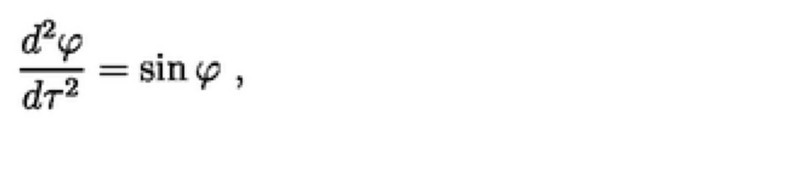

Esing,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x19+IDATx\x9c\xed\x9d{TT\xd7\xd5\xc0\xcf\xbdw\xee\x8c\x03\x0c\x03H\n6ml\x9bj\xac\x944*>A^\x06\x10\x04\xb1\x95&m\x9ahM\x9a\x12\xb0ZA\x13Ey\x83&\xb8\x80\xe8\xcak\xa55f\xd5Uu5\x867\x8a\xbc\xc1Z\xab\xb5\xd6\xd5vu\xc5\x8a\xc1\xbaZ\x14y\xcc\xfby_\xe7\xfbc/\xeew\x1d\x90\x10\x82\xc0\xc0\xfd\xfd\xc1\x1a\xe6\xbe\xf6\xd9\xe7\xec\xb3\xf79g\x9f;\x04\xc6\x18\xc9\xc8\xc8\xb8\'\xe4T\x0b0\xf5\xcc\xd4.l\xa6\x96KF\xca\xac6`\x9e\xe7\x11B\x04AL\xb5 \x13\x0c\xc6\x98\xe3\xb8\x99W.\x99\xe1\xccj\x03\xa6(\n!d4\x1a\xa7Z\x90\t\x86 \x08\x85Ba2\x99\x9cN\xe7T\xcb"\xf3h\x99\x8d\x06\x8c1\x16\x04app\xf0\xe4\xc9\x93aaa\x8b\x16-\xb2Z\xadh\xa6\xc4\x9c\x82 \xfc\xfb\xdf\xff\xce\xc8\xc8\xf8\xe67\xbfYVV\x86\x10bYv\xaa\x85\x92yT\xccR\x03&\x08\xe2\xc6\x8d\x1b7n\xdc\xb0\xdb\xed\x83\x83\x833\xc3t\x01\x96e\x9b\x9a\x9a\x18\x861\x99Lv\xbb}\xaa\xc5\x91y\xb4(\xa6Z\x80)\x80$I\x84Phhhhh\xa8F\xa3\xf9\xdb\xdf\xfe\xa6P\xcc\x1c=\xa8T

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


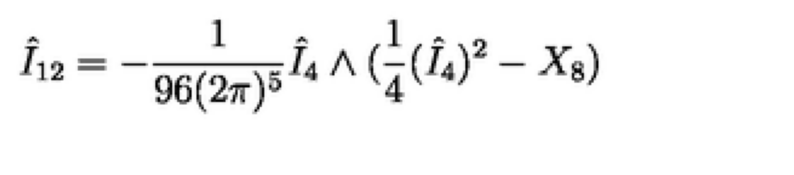

in2-96 (2-5 in ( # In (? - X8 )
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0f\xf9IDATx\x9c\xed\x9dyL\x14W\x1c\xc7\xdf\\\xb0\x0b,\x02"$V\xab\x18+\x15\x8di\x95B0\x88\x1c\xae+Vk\x03\xb5\xdaH\xd2Fc#\x05Z\x04\xb5\x95K \xa5F\xd1Vkm\x0c\xda\xa6\xa1F\xad\xf5@N\xa5\x96B<*\xd86\x8dM\xda\xd8\x8bhlcP\xce\xbdfv\x8e\xd7?~e\xc4eY\xc0\x03v\xf1}\xfe\x1av\xde\xcc\xbe\x1fy\xdf\xf9\xfd\xdeo~\xef-\x851F\x04\x02\xc1=\xa1G\xbb\x03\x8f\x1d\x8c1<\xa4\xd4\x83!\xb6\x87\xe3\xc7\xdb9\x02\xe1\xe1\x18\xcb\x02\x06\xf9Q\x14EQ\x94(\x8ap\xe0\xfc\x12EQ\xa0\x19\xc6\x18.\x19\x91\x9e\x12\x08\x0f\xc8\x98\x150\xc6\x18\xe4\xd7\xd9\xd9\xc9\xf3<\xc7q\x08\xa1\xf6\xf6v\xe4\xd4\xaf\xd24m6\x9b{zz(\x8a\xe28\xae\xad\xadMQ\x94\x11\xeb3\x810\\\xc6\xa6\x80!\x0c\xbe}\xfbvTTTXX\x98\x8f\x8fOzzzBBBKK\x0b\xc6\xd8\xa1&eY\xc6\x18\x7f\xfe\xf9\xe7S\xa7N}\xfa\xe9\xa7###\xdf~\xfb\xed\xec\xecl\x9b\xcdF4LpY\xd8\xd1\xee\xc0c\x01cL\xd3\xf4\x1f\x7f\xfc\xb1`\xc1\x82\xe3\xc7\x8f\x97\x97\x97\xff\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


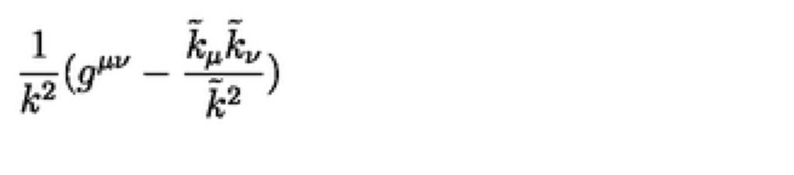

to your-tinton.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\rcIDATx\x9c\xed\x9c_L\x14\xd7\x17\xc7\xef\xec\x1f\xd8\x05J7b\x05\xd6\x18KcZ\x12\x13$(X@(d[5\xa5)h\x1a\x9ajx\x10\xc5P\xe0\x01X,"\xa1\x08\x05\xa1)\x0f%i\x8ciS\xd3\xa6\x7f(B\x9a"\xb8U\x04\x8b\x89PZ\xd3h\xfb\xd4\xa4\xf1\xa5-\x91\x05v\x97e\xd9\xff3s~\x0fG&+\xcb\x9f\xb5\x05\xed\xf0;\x9f\xa7\x9d\xbb\xf7\xcf\x99\x99\xf3\x9d{\xee\x99\xbb\xcb\x01\x00#\x08B\x9e(V\xfe\xfa\xc9\xca\x1b\x00\x9e\x88\x01+\x8c\xfb\xa4L"\x88%\xe1\x96sGA\x10\x94Je\xf0\xe7\xc7\x83 \x08\x00\xa0R\xa9\xf0\xd0\xef\xf7\xabT*\x8e\xe3\x1e\xa7\r\xff}\x93\x82\x11EQ\x10\x04\xc6\x98B\xa1\x08\xbee\xd2\xb7\x8c1\xb5Z\xfd\xb8\x8d#\xd6\x81\xa5\x05\x0c\x00\xe8\x9aV\xabu\xd3\xa6MX\xf8\xd8d\xcc\xf3<\xea\xc4n\xb7\x0b\x82 \x19 \x8a\xa2B\xb1J\xc8\xb0&\xb8\xddn\x00\xd0h4\x1c\xc7\xe1ux\xe2&\xfd{\xa4{Jl$\x16\x0b\x18\x00\x04AP\xa9T\xdf~\xfb\xed\x85\x0b\x17\xfe\xf8\xe3\x8f\x1d;v\x94\x95\x95\x99L\xa6\xa6\xa6&\xbd^\xbf\xde~\x80\x8f\x89

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


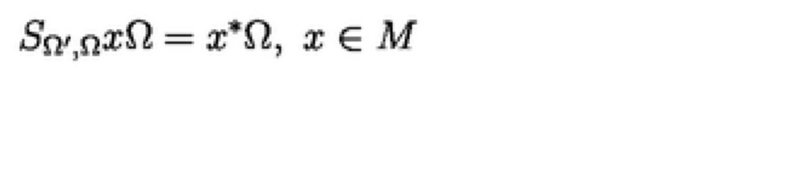

Serves # v.S. v.E.M.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x15\xdfIDATx\x9c\xed\x9dyP\x14\xc7\xf7\xc0{fv\x06\xf6\x90\xc3\x03\x8c~MLL\xe2\x1f\x1a-\x13\xac\x18\x05<0\x8a\x8b\x17\x9ee,\xaf\x08X\n\xc6Hd\xbd\x82(\x1e\x85\xa8X\x89\xc6\xbb<\x92\x94\x961\x82\x9c\n"\x82\xa2\xa8\xa0\x7fh\xaa\xb4Rj\xa5,]\xa3\xe8.\xec\x01\xec\xcc\xce\xf4\xef\x8f\xf7c\xb2\xee.\x08\x8a\xc8b\x7f\xfe\xa0vwf\xba\xdf\xf4\xcc\xeb\xd7\xfd\xfa\xbd\x86\xc2\x18#\x02\x81\xe0\x99\xd0o[\x00B\x9b\xa0m\xf6\xe3mS\xaa6\x05Q`\x02\x12E\x91\xa2\xa8\xb7-\x85\x1b(\x8a\x92$\xe9mK\xd1\xa6!\n\xdc~\xc0.4\xe5*Q\x14\x19\x861\x9b\xcdF\xa3\x119\x18\xbdW+\xedu\xc4v\xfa]\x92\xa4\x9a\x9a\x1a\x9a\xa6EQ|CU\xb7\x03\x88\x02\xb7\x07\xe0\x15\xa7\\x\xa9\xf9\x02\xed\xcd\xca\xca\xea\xda\xb5\xeb\xad[\xb70\xc6\x92$a\x8c\xedv\xbbki-.\xb6SE \xad\xac\xcf555\x1f~\xf8\xe1\xa9S\xa7\x18\x86\x11\x04\xa1\xc5ko\x1fPd\x9a\xe1\xe9\x80\x12"\x84,\x16\x0bEQ4MK\x92D\xd34EQ\xde\xde\xde\x8d_HQ\xd4\x993g\xc6\x8e\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


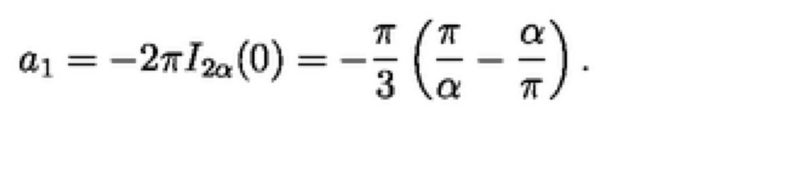

as -2H2a (0 ) -3 ( Ex -3 ).
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0b\xe7IDATx\x9c\xed\x9d\x7fh[\xd5\xfb\xc7\x9fs\x7f\xe4\xc7\x9adM\xd0\x8a\x03u\x05\x95\xc1\xf0\x07\xb18\xa5\x0b\xfe\x9ac\xae.\xfe3\xff\xd8?:\x11\x85-\x14m\xb2:\xf6\xb3-\xca\\\x84Nd\x95\xa1\x08\x03\x15A\xc7~\xb5\xeb\x8a\xba\xb46\xac\xb6\x8a\xfe\xe1\x10\x7f \xcb?R\xea,6?Zsors\xef\xf9\xfc\xf1|z?Y\x9a\xa5]\xd7.\xb9\xdf\xef\xf3\xfa\xa3$\xb9\'\xe7<\xb7\xdc\xf7y\x9e\xf3\x9c\xe7\xb4\x8cs\x0e\x04AX\x13\xa1\xda\x06\\\x074\xd7\x10D\t\xd6\x100\xe7\xbcP(0\xc6\xaam\x08A\xd4\x16\xd6\x100cL\x92\xa4L&\x93\xcb\xe5\xaam\x0bA\xd4\x10\x16\x10\xb0a\x18\xbf\xff\xfe{[[\xdb\x1dw\xdc\xd1\xdd\xdd\r\x00\x9a\xa6U\xdb(\x82\xa8\t, `M\xd3\xbe\xfa\xea\xab|>\x9f\xc9d\x14E\xa9\xb69\x04QCH\xd56`~\xecv{kk+\x00\x1c;v\xac\xda\xb6\x10Dma\x01\x01s\xceu]\xcff\xb3\x94\x85&\x88\x12,\x10B\x03\x80$I\xb2,W\xdb\n\x82\xa89\xac!`\x82 \xcaB\x02&\x08\x0b\xf3\x7fJ\xc0UY$\xd3\xca\x9c\xa8"\x95\x04l\x18\xc6\xf5\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


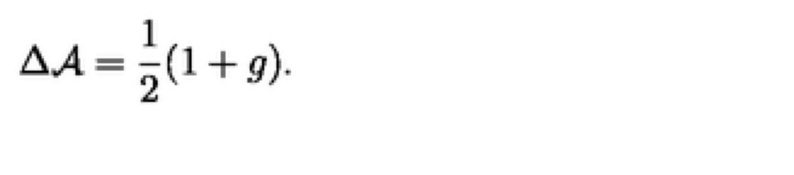

a-gits ).
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x10\xb4IDATx\x9c\xed\x9cyLT\xd7\x17\xc7\xcf{\x8fa\x86\x99\x01f\x90\xaa\x05\x97b\xab\xa2hh\xdc@(\xa9\xa0\x82h-.\x01\xab\xf5\x8f.Z\xb1\xa2(K\x89\x82 X\xab-\xd4\x18\x9b6ijM\xad\xb8S\x01\x01Y\x04\xb5V\x93\xa6\xe9\x7fM[\xe3\x1f\xb6I#\xa0\xc0\xac0of\xder\x7f\x7f\x9c\xf2~Sdq\x01\xeb\xd8\xfb\xf9c2\xf3\xe6\xbd\xfb\xce\xbds\xbf\xf7\xdc{\xcfy\xc3\x10B\x80B\xa1x\'\xec\xbfm\x00e\xd8 \x84\xd0\xe1\xf8\xbf\x06\x15\xf03\x02!\x84a\x18\x86a\xee\xd70\x15\xf63L?\xbf7\xc5\xeb@\xf5\x0e\xf4\x91\xf2\x0c\xf3\xe4<\xf0S\xe5\x07\x9e\x1eK\x1e\x1f\xa5.\xf3\xe6\xcd\x9b;w.\xaaW9H\x08\xb1Z\xad===\xcfR\x95)\nOH\xc0\xca\x04ox\xcbT\x18\xf2`\x9f7O\xd2A\x8d\xa8r\xb0\xa6\x82 \xcc\x9e=[\xaf\xd7\x1b\x0c\x86\x05\x0b\x16\xb4\xb7\xb7\x13BdY\x06\x80\x9e\x9e\x9e\x993g\x86\x84\x84tww?Uc(eXx\x12\x02Vft===\xcaAY\x96\x05Ax\x9cb\x19\x0f\x069(\xcb\xb2\xf2\x1e\xdf\x10B\xda\xda\xda\xf0\xab\x91\xee\xd0xw\xd4\xd2\x08\xc1\xb2\xac$I\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


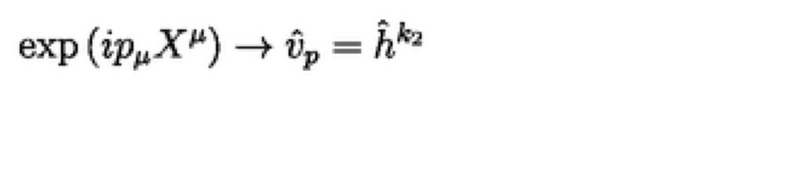

exp ( ippXH ) - Op.files
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0e\x12IDATx\x9c\xed\x9ckL\x14W\x1b\xc7\xcf\xcc\xec}\xd9e\xa1\x1a\x8b\x97`K\x8a\x1f\x9a\xb6\xd1Vk\x01+Qi\x05\xa2R[\xd0^R\xad\x81\xc8M4B\xe3\xa5\xb4\xc0Z\x8c\x9aHhj\xa3%%\xc6\xb66\x18C\xb1\x81\n\x14\xea*\xa5\xdd \r\xbd\xa8\x8d\xb1&\xfdP\x0cP\xba,\xb8\xec\xb2;\xb7\xf3~xt\xdf\x95\xbb\x02\xd2\xd1\xe7\xf7\xc1\xe0\xec\xcc\x99\xffl\xce\xff\x9c\xe7y\xce\x99e(\xa5\x04A\x10e\xa2\x9an\x01\xf7\x82\x7f\xd0a\x18fz\x95\x8c\x89\x82\xa4"Jd\xb0\x81%I\x92ey\xa4\xb39\x8ecYv\xd0AJ\xa9(\x8a\x0c\xc3@\x1f\xe58n\xd2U\x06"\xcb\xb2_\x83(\x8a\x1c\xc7\x8d\xe9\rA\x10F\xfaH\xadV\x13B$I\xa2\x942\x0cC)U\xa9&mP\xbb[\xa9\xd3\xa5\x13Q.\xcc\x04Ch\xe8O\x93\xa5fL\xc0\x12}}}\x92$q\x1c\x17\x1c\x1c<\xf16\xa1\xa9\x89\xb73\x88I\x97:E:\x11E\xf3\xffQ\\\x96eJ\xa9\xcdf\xab\xaf\xaf\xf7\xf9|\x92$\xe9\xf5z\x93\xc9\xd4\xdd\xddM\x08\xe18\xceb\xb1\xacX\xb1b\xf9\xf2\xe5\xfe\x9e\x04\xee\x95$\xe9\xbd\xf7\xde\x0b\r\r\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


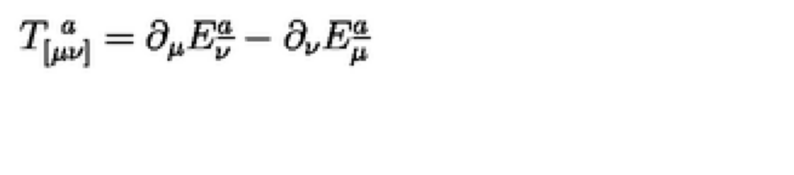

Tranny - Quiet - Our Eye
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0b\xe6IDATx\x9c\xed\xdc[l\x14U\x18\x07\xf0sfvvY\xba\xbb-+\x82$\x1a#D\ti\xf4\xc1\x0b5\xdavmKa\xa9\xac(\x9a\xa8\xc1\xf0\xe0-\xa0`\xdab\x95\xd6\xa6\xb5\xa6\xd0\x14m*\xfa Q\x12\xb56KD\xadX\xb3\xbd\xa1b\x8dQ\x93\x06\x12c\x82\x0f**)Vz\x9bY\xba\xb7\xb9\x1e\x1f>;\xd9\xeeB\xe9e\xa9L\xfc~\x0fe\xbb{f\xe6,\xdd\xff|\xe7\xcc\x9c\x962\xc6\x08B\xc8\x9a\xb8\xff\xba\x03\xff\x8d\x05;m\xe1\xf9\x11]VWz\x80\x19c\x19\xcf\x80a\x18\x94\xd2\xcc\xee\xf3b\x16\xec@\xe8\xff\xe9J\x0f0\xa549\x03\xaa\xaa\xaa\xaa:\x9f\x1d\x1a\x86\xc1q\\,\x163\x0cc\xde\xbd\xbb\x04\xc6\xd8\xd0\xd0\x10\x1c\x14K1\xba\x1c\xae\xe8\x00\xc7\xe3qI\x92"\x91\x88\xf9\xe9\x17\x04A\x10\x849\xefP\xd7u\x8e\xe3>\xfd\xf4\xd3\x1bn\xb8!\x16\x8be\xb6\xbc\xa7\xec\xca0\x0c]\xd7\x9fy\xe6\x99\x92\x92\x12\x8e\xe3\x16\xe0|\x81\xfe\x87\xae\xd0\x00k\x9aF\x089x\xf0\xe0\x8d7\xde\x98\x9b\x9b\x1b\x89D\x08!\x89D\xa2\xa9\xa9\xa9\xa9\xa9I\x96e2\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


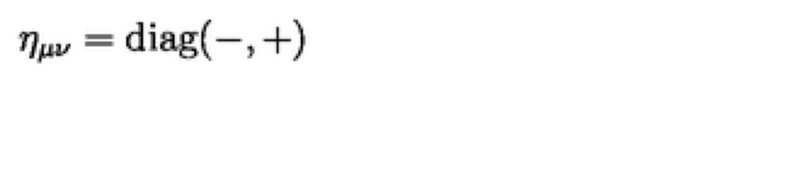

Marc Edias ( - t )
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0b\xb5IDATx\x9c\xed\x9colS\xd5\x1b\xc7\x9f\xfb\xb7\xbd\xa3\x9b:7C\xa6\x19\xf6\xcd0\x115\x12\xe3\xf6\xc2L\x94u\xab\x86L\xe1\x85\x06u\x1a\x17\xff!\x10e\x18\x99\x13\x183\x9b\xbad\x12E\x93\xbdS\xa3\xc6\x0410\xd7\x8d\r:\x08\x03\xa6\xbc\x18\x89\x1a_\x98\xa8H\x04\x83\xa3l+\xa5]\xb9\xbd\xf7\x9c\xf3{\xf1\xb8k)]\xddf\xf7\x8b7>\x9f\x17K{{{\xce\xf7v\xe7{\x9f\xe7<\xe7\xb4\x92\x10\x02\x08\x82p\'r\xd6\xa3\x0b\xe4\xea\x85\xbeY\xe4\xbd}\xba\xbb\x11\xffr\xa49\x8dQ!\x84m\xdb\xb2,+\x8a2\xcb\xb70\xc68\xe7\xaa\xaaJ\x924/\x85\x04A\xccHv\x03\'\x12\x89\x82\x82\x82\x0c\xcbq\xcee9{\xc4\x9e\r\x93\x93\x93\x92$\x15\x15\x15\xfd\x93Fr\x93U\xf6<\x10BH\x92\x14\x8dF\x01`!\x04\xe3}P\x92$!\xc4\x9c\xee\x86\x04\x91\xc1\x15C\x13\xcd|\xee\xdc\xb9;\xef\xbc\x13\x87o\xba\xbdeY\x8eF\xa3\xcd\xcd\xcd\xe1pX\x08\xc19\xcf\xd1\xaes\xc2\xbe}\xfb\xb6o\xdfn\x9a\xe6\xb7\xdf~\xbbl\xd92\xdb\xb6!\xdf\xa9in\xd9\xf3\x00\x95\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


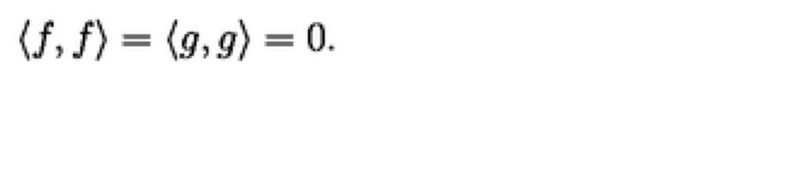

(F.S. - ( 9.9 ) # O.D.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x16\x9eIDATx\x9c\xed\x9d{PT\xd5\x1f\xc0\xcf\xbdw\x9f\xdc]\x10(\xc8\xa8D\x8cD\x1bMR\x1e\x82\xf9\xcb\x17* \x8a6jN\x93\x96\xa5\x19\xea?\x86=\\\x134\x9d,\x11\xfbC\x9dir\xd2\xd4FK\x11\x81U4\x08H0\xb5\xa9\x99jz7\x91\x99\xa5\xc2\xee\xc2.\xbb\xcb\xee}\x9c\xdf\x1f_\xf7z\xd9\x85ey(\xac\x9d\xcf\x1f\xcc>\xee\x9e{\xbe\xe7\x9e\xef\xf9~\xcf\xf9~\xcf\x81\xc2\x18#\x02\x81\x10\x9c(\x06\xba\x02w\t\xd28HQ\xd4\xc0\xd6\xa4w\xc8\xc7\xf1 \x15\xe1\xbf\t=\xd0\x15\x08z\xa0\xebS\x1ePGe\x08\nDQ\xa4d\x88\xa28\xd05"\x04\n\x15t\xbdmP\x811\x06\xa5\xfd\xfb\xef\xbf9\x8e\x8b\x8c\x8c\x0c\r\r\x95\x7f\x1e,\xd8\xed\xf6\x1b7n\x84\x85\x85i4\x9a\x90\x90\x90\x81\xae\x0e!P\x88\x05\xee=\x18c\x8c\xb1\xd5j]\xb4h\x91\xc1`\xa8\xa8\xa8x\xf0\xc1\x07\xb3\xb3\xb3\xdb\xda\xda\xe0\xab\x81\xae`\xf7\x08\x82\x80\x10:q\xe2DLL\xcc\xe1\xc3\x87\x93\x93\x93\xa3\xa2\xa2\x8cF\xa3\xf4\x15a\xb0\x83\t\xbd\xc5\xedvc\x8c\r\x06ClllMM

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


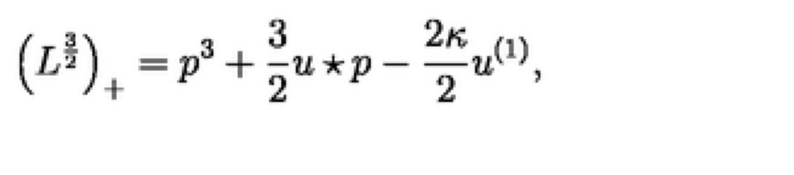

( GIDENT # PRDICTOR JENN.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x12\'IDATx\x9c\xed\x9d{l\x14\xd5\x17\xc7\xef<w\x87\xdd>v\xfb\xb0\xa1\xd5\x1f\x01C0\xfcA@\x8cm\xa5-\xa5\xb6\xd0\xf4\x01\x88(1\x12E\xb4\x80\x82h[ @\xb1R\x89\xb6B\x8b\x89\x06\x8d\x14\xa3\xd1\x90 \x16\n\xbb\xf4AK\xcb[\x0c>\x00\x03\xff\x88\x84\x04HIkw\xb7\xdb\xeesf\xf6\xfe\xfe8v\\\xb7\xbb\xdb\nmw\x17\xee\xe7\x0f\xd2\xbd;s\xef\xdd\x99\xf9\xdes\xee\xb9\xe7\x0e\x14\xc6\x18\x11\x08\x84\xc8\x84\x0eu\x07\x86\x01cL\x86\x18\x02!\x10a-`\x8f\xc7CQ\x14EQ\x08!Y\x96\xc7\xb9u2v\x10\xc2\x9f\xb0\x160M\xd3&\x93\xa9\xab\xab\x0b!\xc40\xccx6\x1d\xda\xb1\x83@\x18!!\x100\x0e\x80\xf71\xb2,{<\x1e\xa3\xd1\x98\x97\x97\xf7\xd6[oeee\xb5\xb7\xb7C\xe1(6\x1d\xa8?(\xa4c\x07\x810rB `*\x00\x08!Q\x14AB4M\xdbl\xb6\xc5\x8b\x17\xaf_\xbf\xfe\xc0\x81\x03\x0e\x87#??\xdf\xe5rQ\x14u?n\xed\xd0\x16\xfd\xf6\x07c<\xeac\x07\x810\x16\xb0\xe3\xdc\x9e\xc3\xe1p:\x9d`\xd3<\x1e\x0f\xa8\x82\xa6i\x95J%\x08\x02\xc7qPN\xd

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


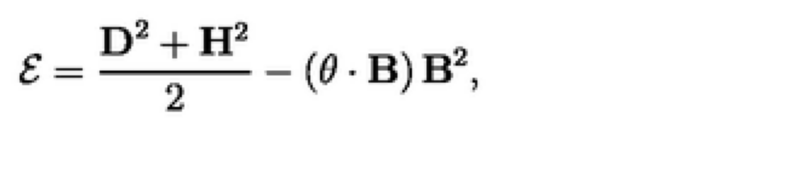

e-D"TH-0.B )B.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x13\xf3IDATx\x9c\xed\x9dyP\x14\xc7\xf7\xc0{fvY\xae\xe5*\x14\xcf\xe2+&&)\xa31\x06EA\x05V<"\x10b<\xa2\x89Z\xa6\xd4\x8a\x06<\x00/D"\xa0\x89\x96&V"\xa6\x8cGU\xca\xb3L\x95"\x87\xac(x+\xa9DKS\x95\xa3LJ\xfd\xc3\x08\x94\xa2\xbb\xec\xc1.;\xb33\xef\xf7\xc7\xfb1Y\x97kQ\x84\xdd\xd0\x9f?(vv\xa6\xe7\xcd{\xfd\xba_w\xbf\x9ee\x00\x80P(\x14\xcf\x84u\xfdT\xea\xean\x085J\x0f\xc7%\x07\x06\x00\xbb\xdd\xce0\xcc\xcb\x96\x86\xe2:\xa2(\x12B\xa8Qz8.90\xc30\n\x85\xc2h4\xdal\xb6\x97-\x10\xc5E8\x8e#\x84\x18\x0c\x86\xee\x16\x84\xd2\x9d\xb4\xef\xc0\x92$\xfd\xf5\xd7_\xe9\xe9\xe9\x03\x07\x0e\xfc\xfa\xeb\xaf\t!\x82 \xbc|\xc1(-\x03\x00\x92$=}\xfa\xf4\xe8\xd1\xa3\xe3\xc6\x8d{\xfd\xf5\xd7\x1b\x1a\x1a\x08\x8d\xa5{*\xed;\xb0 \x08\xe7\xce\x9d\xe3y\xdeh4Z\xad\xd6.\x90\x89\xd2\x06\x00\xc00\xcc\x9d;w\xee\xdc\xb9c\xb5Z\x9f>}J]\xb7\'\xa3h\xf7\x0c\x95J\xb5|\xf9rB\xc8\x9e={^\xbe<\x94v`Y\x96\x10\x12\x13\x13\x13\x13\x13

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


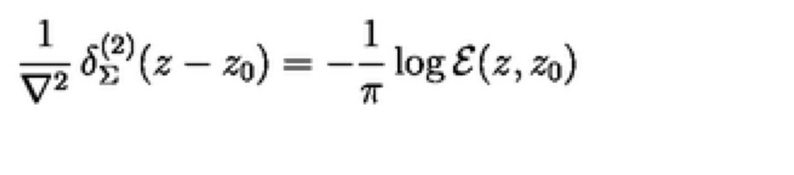

# # RO ) # # FOR E (s ( so ).
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0c\x99IDATx\x9c\xed\xdckL[\xe5\x1f\x07\xf0\xe7\xdc\x80\xb6\x0c\x81M\xb7h\\`\x88\x8b\xbe\xd8f\x1c\x1aJ\x02\x8c\xcb\x92\xa1d\x97x\x991\xc3K\xb21\xad\xb0KA\x1c\x95\x8b\xbaMY\x98\xd1D\x136o1&\x1a\x90\x9b\xed \xcb\xb2\x89\x1d\x89Cg\xf4\x85\x89\x89\x89\x8a8\x97\r\xd6\x96RJK{.\xbf\xff\x8b\x9f\xf4\xdfq_\xc6\x06\'\xf9}^\x90\xf1\xec\xf4\x9c\xe7$\xe7\xdb\xe7z\xe0\x00\x80\x11B\xf4\x89_\xd8\xd3\xd1\xd7\x01!\xb7\xd3\x82\x05\x18\x00\x14E\xe18NQ\x14]\xc7XUUUU\x17\xbb\x16\x84\xcc\xcb\x02\x048\x12]Q\x14eY\x16E\x91\xe38=f\x00\xeb,\x08\x82 \x08\x8cz\x13D\x0f\x16 \xc0\x18]\x8f\xc7c\xb5Z\xe3\xe3\xe3\xadV\xab\xa6i\x98\x01\xbd\xd04\r\x00\xb0\xce\xad\xad\xadmmm\x8c1\x8e\xe3dY^\xec\xaa\x112\x9b\x19\x03\x0c\x00\xf3i\x824M\x1b\x18\x18\xd8\xbf\x7f\x7fjj\xaa\xd3\xe9\xac\xac\xac\xec\xed\xed-((\xe8\xec\xec\x0c\x06\x83\x9a\xa6\xb1\x89&z\xce\xf3\xc8\xb2|\x1b\x1a=\xbc\x90,\xcbX7\xac\x1e\xc

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


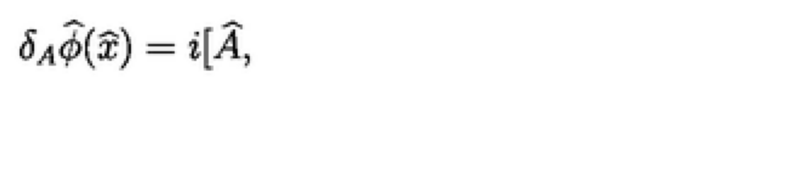

SUDED - MA,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\r\xf6IDATx\x9c\xed\x9c[LT\xd7\x1a\xc7\xd7\xbe\xcdEn\x03\x14\xa4\x98\x9a6}!\xa5\x89\xa1\x12\xa1\\D\xa8Z\xa8\x85D1\x04\xa9i\xd26\xf6\xa1DS\xd3J[;*\xa4\xf5A"\xa5\xa6\xb5Mh\xd36\xa5\xd5*\xa4\xad\\\x94\x00\xd6A\x90\xb4\xda\x98h\x8c\xb1\xedC\xb5\xa1V\x04\xe6\xca\xcc\xde3\xfb\xb2\xce\xc3w\xd8g\x9cA\x1d\xa0z\xce>\xfd~\x0fd\xcff\xef\xb5\xff\xb3\xf8\xfe\xeb\xf2\xad\xc5f(\xa5\x04A\x10c\xc2\xfe\xb7\x05\xdc\x16J\xe9\xfc\x1a\x97{\xda$\xfdo\xaaB\xfe\xb10\xd1\x81\x05g\x18\x86\x89\xbd\x94\xf0B\xf4\x1b\xf5\x93s*J\xbfw\x1ew\xe9h\x9a\xc6\xb2\xb3\xb4M\xb3\xea\xfc\xaf\xabB\x90y3K<1\x0cs\x870\x9d\xb5\'a\xc2\x88>9WM\xbaO\xfc~\x7f\xecwi\x9aF\x08q\xb9\\>\x9f\x8fe\xd9\xd8u\xde;Uzw}gU\x082o"\r\xaci\xda\xb5k\xd7\xa6\xa7\xa7eY\x9e\xf5\x86\xe8\xd0\x17E\xd1\xedv\xfb|>\xaf\xd7\xebr\xb9 F5Ms\xbb\xdd~\xbf\xdf\xe5r\x89\xa2\x18\xbb J\xa9\xaa\xaa\x94\xd2\xe5\xcb\x97\xb7\xb4\xb4\x10Bn\xa7$\xf2\x9b\xb0,!\xe4\xe2\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


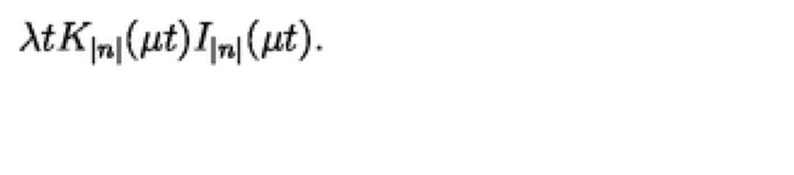

At Kipu ( but ) I am ( etc ).
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x13\x01IDATx\x9c\xed\x9diLTW\x1b\xc7\xef\xb9\xb31\xce\x0c\x0c\x8b\x04\x05y\x8d\xc6\xb4\xc5\x98V\x10\xd4TdW\xc1\xa9\xe0\xd2Z\xa5McR\xeb\x82\x88,-P@1nE\xc1%\xc6\xd6\xc6.)m5V\x05,\x9b\x88\x02J\xa4\xb4\xc5-m\xd4j\xd4/\xa4\x8a\x85\x19\x86a\xd6\xbb\x9c\xf7\xc3\x13o\xa7\xc3\xcc\xc8[}A\xf0\xfc>\x90;w\xee=\xf79\x97\xf3?\xcfs\xcey\xee\x1d\x841\xa6\x08\x04\xc2\xc8D<\xdc\x06P\x14EA\'\x82\x10\xb2\xffh\xbf\x87@ 8\x05\x11\x0fL \x8c\\\x86\xd3\x03c\x8c\x11B:\x9d\xcej\xb5*\x95J\xa9T*\x95Jy\x9e\xef\xe9\xe9\x91J\xa5:\x9d.88\x98\xa6\xe9a\xb4\x90@x\xce\x19Ny`\x8c9\x8e\xbbu\xeb\xd6\x9a5k\xc6\x8e\x1d\xbbg\xcf\x1e\x8e\xe3l6\xdb\xea\xd5\xab\'M\x9at\xfa\xf4i\x86a\x86\xd1<\x02\xe1\xf9g8\x05L\xd34\xcf\xf3\xb3g\xcf^\xb0`A@@@ii\xa9\xcdf\xf3\xf0\xf0\x986m\xda\xb2e\xcb222D"\xd10\x9aG <\xff\x0c\xb3\x07\x96H$Z\xad\xf6\xc0\x81\x03eee\xbd\xbd\xbd\x97/_\xe6y\xfe\xda\xb5k\x05\x05\x05\x1c\xc7\x9

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


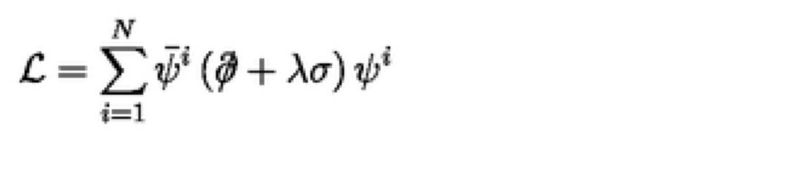

(EW ( O-AO #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0e\xf0IDATx\x9c\xed\x9cylT\xd5\x17\xc7\xef{o\xa63\xd3\x16\xba\xd0\xb2\xb4j\xa9\x1a\x1aRk+ L\rU6\xcbVP\t\x9a \rZ\xa1P\x8a,a\x13\xeb\xb4\x05\x84(\x8b\x80\x92\x98\x98\xd0\n\x18JAYlKJi+\x85T\xf9CM\xe4?c\xa2\xd1H\x98B\xb7\xe96\xf3f\xder~\x7f\x1c\xfb|\xcct\x03\x86\x1f>=\x9f\x7f\xday\xcb}\xf7\x9c9\xdf{\xcf]\xdep\x00\xc0\x08\x820&|\x10\xcb\x02\x80\xa17\x07\xff\xb5\x86c(\xf6\xfe\xd7|B\xdc?\\\xb0\x82\x06\x008\x8e\x1b\xe0\x02EQ\x18c\x82 \x04\xe5q\x0f\x91{0DUU\x9e\x0ff[I\x10Hp\xa2JSoOOO\x7f\xd7\x08\x82\xa0\x05=\x008\x9dN\xc6\x98\xaa\xaa\x86\xebv\xf4\x86\x0c\x05T\xaf\xdb\xedVUu\x80\xcb\x1e\x9cO\x00@\x92$Y\x96%I\xc2\xd6\x87\xf8\xd7\x10\x04\x01\x03\x80\xa2(\x000q\xe2\xc4\x8f>\xfa\x881&I\x92\xfe\x02\x8c\xc8\xf3\xe7\xcfWWW\xe3YEQ\xf2\xf3\xf3g\xce\x9c\xc9\xf3\xfc\xc0a\xfd\x8f\xc2\xcf\x90\xa1\x88AQ\x14\x9e\xe7\xcf\x9d;\x97\x98\x98\xe8v\xbb\xfb\x1be\xa8\xaa\xfa\xe0|\xc2q\x9c\xd9l6\x99Lf\xb3Y

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


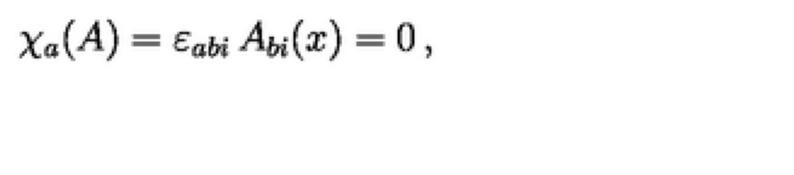

Xa(A ) # Eahi Abi (ee ) # D.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0b\x9aIDATx\x9c\xed\xdd\x7fL\x94u\x1c\x07\xf0\xef\xf7y\xee\xe18\xee\x0e\x0e\xa2\xa1\xe6\xc6\xa2\x7f\\\xab\xe9d\x85i\x92)\x92\x08\x17\xcd\xa2\xac\x1c\xd9\x1cZ\x93\xb4p\x9c6C\xca\xcd-M[F\x8b\x9ammm\x85\xff$p\x16\x84\x0c\xc3\x86\xe9\xda\xd2\x12p\xeb\x0fb6\x94\x18\xc2\xdd\xc1qw\xcf\xaf\xef\xb7?>q^\x80\xa1\'?|\x8e\xcf\xeb/\xefxx\x9e\xef9\xde\xcf\xf7\xf7s\x94sN\x10B\xc6$\xccv\x01\xa6\x1e\xe7\x1c\xefJh\x8e\x88\xa9\x00s\xce5M\xa3\x94RJu]\x9f\xed\xe2 4\xedb*\xc0\x94R\x93\xc9\xf4\xf7\xdf\x7f\xfb|>Q\x14g\xbb8\x08M\xbb\x18\t0\xb4\x99\x83\xc1\xe0\x9bo\xbe\xb9}\xfb\xf6%K\x96\xb8\xddnB\xc8\xff\xd7\xc3|\xd4\x0c\x95\x12\xa1\xa9f\x9a\xed\x02L\rM\xd3\x04A\xa8\xa8\xa8hnn\xee\xec\xect\xb9\\\x85\x85\x85\x81@ >>\x9e1F)\x8d<\x18^2\xc6\x04!F\xee_h\xce\x8a\x85\x00s\xce%I\n\x85Bn\xb7\xbb\xb9\xb9\xd9\xeb\xf5\x86B\xa1\x87\x1ez\xc8d2A\x7fx\xc2\xdf\x12\x04\xc1\xeb\xf5\xea\xbaN)\xb5X,\x1

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


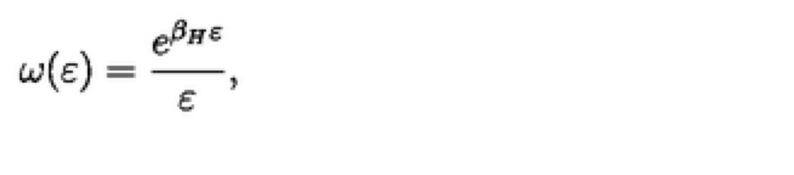

wte ) #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x13#IDATx\x9c\xed\x9c{PT\xd5\x1f\xc0\xcf\xbd\xbb\xcb\xfb!H.\xf1\x18HM\xb2F%\x1e\x16\xa4\t*\x84<\x84)\x06\x1f\xd58i\x0e\x12\x94\x81)\xaf\x05\x15\xccR4\xb3\x99F\xa7\xc9\xf1\x0f\x9f!*\xa0h\xa2\x0e\x94\x0e61Jc\xda8\xa6\xa8\xf9da\x97\xdde\xdf{\xef=\xbf?\xbe?n7\x16\x10X\xccn\x9d\xcf\x1fN\x9c=\xe7\xdc\xf3=\xf7|\xcf\xf7{\xbe\xe7{\xa30\xc6\x88@ \x88\x13z\xc4-\x9f\x84\xe6\x93\xdd\x84@\x18\x16#T`\x8e\xe3(\x8a\xe2\xff\xc4\xbd\xf4)\xe9\xd3\xca\xbeZ\x9f\xca\x14Eq\x1c7\xb2!\x11\x08\xffAF\xa2\xc0\x18c\x9a\xa6M&\x13\xaflT/|\x9d>\x7f\x0eTMX\xceq\x9c\xd1h\xa4\xe9\x91;\x05\x04\xc2\x7f\x8d\xc7kK\x1f\x83\xc9\xb2,EQMMM!!!F\xa3\x11Jn\xdf\xbe\xdd\xd3\xd3\xa3\xd7\xeb\xa1\x8eF\xa3\xd1\xe9t\x0f\x1f>\xec\xee\xee\xe6{\xe08\xee\xf6\xed\xdbz\xbd^\xaf\xd7C\tox{zz\xee\xdc\xb9c4\x1a\'L\x98P[[\x0b}\xf6\x19\x03\xc30\xa3!\xef\xe3\x05\xfc\xf7!.\x01\x19\x86\xe9\xf3\xf6\t\x830\xa0\x02c\x8cm6\x1bB\x08\x0c&\xcb\xb2\xbc\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


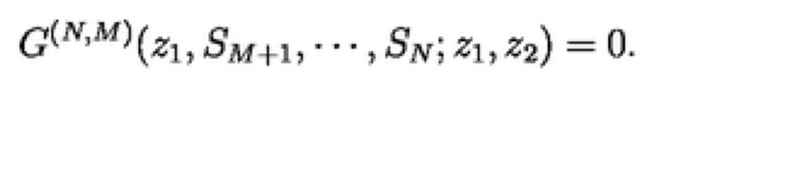

O(N.M. ( 21, S.H.... ", S.N
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x11RIDATx\x9c\xed\x9c}PTU\x1f\xc7\xcf\xbdw\xef\xee\xb2\xeb\xf2\xa6\xa6d:\x93\x8eM3\xfe\xd1\xcb$\x06"(\x81A\xe8P\xf86cZ\xda\xe4HB\xa440\x82\x0b\x02\x89J\x08\xa95\xa5\x953:9BJ\xe8\xa0@\n\xb6(\xa6I\xfcaj\xf9R\x9aS\x82\xbc\xec\x0b\xecrw\xf7\xee}9\xcf\x1f\xbf\xb8\xcf\xba RO\xcf\xe8\xe2\xf9\xfc\xc1\xec={\xef\xb9\xe7\x1c\xee\xf7\x9c\xef\xf9\x9ds\x97\xc2\x18#\x02\x81\xe0\x9f\xd0\x0f\xba\x00\x84\xfb\x831&\xfd,aP(\xf2d\x10\x08\xfe\x8b\xeaA\x17\x800\x08\x82 \xf8\x1c\xaaT*\x95JE\xd3\xc41\x11\xee\x82\x8c\xc0~\xc0\xc6\x8d\x1b{{{\xb7o\xdf.\x08\x02\xcb\xb2\x0f\xba8\x84\x87\x88\x87B\xc0P\x06\x8a\xa2\x1etA\xfe\x1d0\xc6\x92$\xa9T\x83\xb8\x1bY\x96\xe1+\x9f\xca\x8a\xa2\xa8R\xa90\xc6\x14E\xb9\xddn\xa3\xd1\xe8v\xbb\x11Bp\xf2\xcf?\xffl2\x99\x9a\x9a\x9abbb$Ib\x18F\xb9P\x92$\x84\x90w\n\xe1\x91\xe2\xa1\xb0\xd0\xff\x0f\xe9\xfa\xb8P\x80\xa6\xe9!\x9e\xf5\x7f\xa5\x1f\x01\x11\x0e\xaa^(\xc0

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


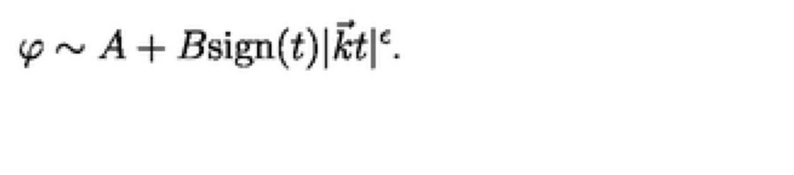

own A # Design ( to ) Rome.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0b7IDATx\x9c\xed\xdckLS\xe7\x1f\x07\xf0\xe7\\ZZZ\n\x1d\xce&\xdb\xcc\xb6\xf8\x92dF\xb2\x10\xc50\xb0\x0c\xa4\x10G\xb39c$\xd3e\xc9f\x06\x98\xf1B\x93y\x99\x94m\xea\x8c\x893\xd1-\x9b\xd9\x96-\xcbt\xc2\\\x00-\x17\t\n\xc4eq^^\xf8J\x13^x\t1\x8b\x94\xf5Bi{.\xcf\xf3\x7f\xf1\xfbs<\xb4\xe5\xa2T\xf0l\xbf\xcf\x0b\xd2\xcb\xd3\xd3\xe74\xe7{\x9e\xf3\\\x0e\x1cc\x8c \x84\x8c\x89_\xec\n \x84\x1e\x1f\x0683(\xa5\x8b]\x05\xf4_\x84\x01\xce\x00UUy\x9e\xc7\xce\x08Zxs\n06/\x1a6\x95,\xcb\x8c\xb1O?\xfd\xb4\xa3\xa3\x83\xe38I\x92\x16\xbb\x82\xe8\xbfe\xf6\x00c\xf3\xa2\xc7Me2\x998\x8ec\x8c\xed\xdc\xb9\x93\x10b6\x9b\xf1\x87B\x0b\x89\xd3\x1fpI\x07\x9f\xa2(\xa2(\xfa|\xbe\xc2\xc2\xc2\xda\xdaZI\x92\xccf\xf3\x82\xd7p!0\xc6TU%\x84p\x1c\'\x08\xc2t\xc5(\xa5w\xee\xdc\xa1\x94Bh\xb5\xcf\xc6b\xb1\xba\xba:\x97\xcb\xf5\xfe\xfb\xef\xbf\xf9\xe6\x9b<\xcf\xf3<\xf6M\xd0B\x10\xf5O8\x8e\xd3?5\x99L\x84\x10h^jkk\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


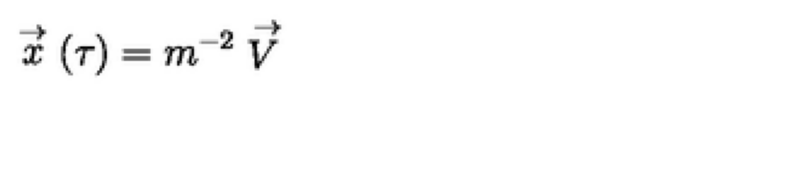

at ( or ) - m.2.7 in the
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1c\'IDATx\x9c\xed\\yTT\xf7\xf5\xff\xbe\xd97`\x86 BX\x82\xa61\xad\x9e\x94\x12\x8dH\xdc\x19\x11\x8ckc\xaa\xa9\xadi\xad6Q\x88Q\x83\xe02 \xb8\xa0\xa2b\xb4i\xac\x89Z\x97Dc\x13\xa9\x16\x01Q\x10w$6\x9e\x93\x93?<i\x02\xd1X\x8a0\xce\xc6\xeco\xde\xf2\xfd\xfdq\x0f/\xe3\x0c\x0c\x03\xae\x93\xdf\xfb\xfc\xc1\xe1\xbdy\xef}\xef\xbd\xdf\xef]\xbe\xf7\xde\xf7\x08\x8c1\xe2\xc1\x83GhB\xf0\xb8\t\x08I`\x8cy\xc3\xc7\xe3I\x00\xaf\xc0\xbd\x06\xcb\xb2\x04A\x10\x04\xf1\xb8\t\xe1\xc1\x03\x11\xbc\'\xe9\x03\xecv;\xc6X*\x95J$\x92\xc7E\x03\xcb\xb2\x0c\xc3<\xae\xd1y<$\x88\xc5\xe2^]\xcf+p/\xc00\x8c@ \xb8x\xf1\xe2\xeb\xaf\xbfn\xb3\xd9V\xadZ\xa5\xd3\xe9(\x8a\xea\xad\xd0y\xf0xP\x10=n\x02B\x0c\x04A\xe4\xe6\xe6N\x9b6\xad\xa2\xa2\x82$\xc9\xc7B\x03\xc30B\xa1\xb0\xb1\xb1\xf1\xf0\xe1\xc3\x02\x81\x80\xf7\xc3?\x19\xc8d\xb2\r\x1b6\xc8d2\x8cq\x90{4\xde\x03\x07\x0bP\x9bS\xa7NM\x9d:\xd5`0\x88D"\x91H$\x93\xc9\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


S-Tow ( PROV-DONGap-2nd Pap ),
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x16\xf1IDATx\x9c\xed]{pT\xd5\x19?\xf7\xb1\xbb\xd9\xcdn^\r\x08\xc4\x98\xaa8$\xa64N&\x02Q\x90\xa0\x02\t\xaf&\x11\x85Be\x8a4\x8a\x82<\x841\x081\xc9\x12\xa2M(\xce0P\xac-\xca88\xd8\xda\x16H6.I!\r\x02\x81AQF\xf1\x91\x96\x972\x01!\xec.\xfb\xca\xbe\xee\xe3\xf4\x8f\xcf\xbd\xbd\xecn6\xbb!\x84<\xce\xef\x8f\xcc\xe6\xec=\xe7|\xe7\xee\xfd\xce\xf7\x9d\xefu)\x8c1"  \x18\x98\xa0\xef4\x01\x83\rdC$\xe8K\x10\x06\xeeM\x88\xa2HQ\xd4\x9d\xa6\x82`\x08\x810po\x82\xa6i\x9b\xcd\xe6\xf5z{\xd6\x1dc\xcc\xf3|\xef\x92\x04\x10\x04A\x10\x84\xdb12\xc1\x9d\x05a\xe0\xde\x01\xb0Gkk\xeb\xfd\xf7\xdf\xff\xd6[o!\x848\x8e\x93\xbe\x15E\x91\xe7y\x8e\xe3DQ\x94\x1a1\xc6\x1c\xc7\xf1</5R\x14\xc5\xb2lT]\xa4\xf6\x00z0\xc6r\xa6e\x18\x86a\x98\x80^\x04\x83\x00\x84\x81\x11\x8a^\xf4\xf1<\x1f \xd0h\x9a\xe68.33s\xce\x9c9\x97/_\x0e\xb8\x9e\xa6i\x96e\x15\n\x05M\xff\xff\x86S\x14\xa5P(X\x96\xa5i\x1ac,\x8a\xa2\xc3\xe

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


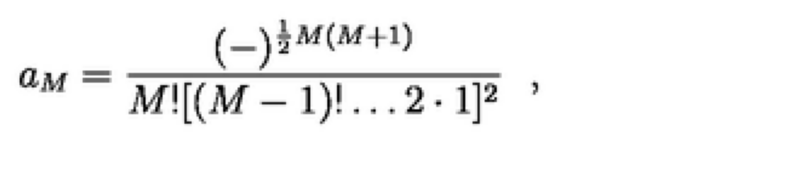

an - more # we
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1aEIDATx\x9c\xed\x9d{X\x14\xd7\x15\xc0\xef\xcc\xec.\xfb\x80\x05\x04\x85\x88\xb5\xf1\xd5\xd8\xa46\xd4\x04|\x0b\x8a\xe0\x03\x8a\xa44&\xa4y\xb4_}\xd4\xa0M\x01Q\xc4\xa0PE|\xa0\xa9\x96Xj\xdb\xb4\x91|M\xd4\xe2\x03\x04\xe4i\x02E!Fc\x9a\xd6\xaf_\x82\x8a\x8dZ\x01\xf7\xc5\xee\xb2\xb3\xb33s\xfb\xc7\xf9v\xbaa\x97uy\x07\x99\xdf\x1f|\xcb\xec\xcc\xbdw\xee\xce\xb9\xe7\xdcs\xcf=C`\x8c\x91\x88\x88\xc8\xc8D2\xdc\r\x10y\x080\xc2\x12\x04\xe1\xf8\xaf\xe3\x11\x0f/\x14y$!D\r\xfcH\xc2\xb2\xacD"\x8e\xce\x8f>\xe4p7@\xc450\xb0\xeat\xba\xfb\xf7\xef\x9bL&\x86a\x10B<\xcfwtt\x18\x0c\x86\xd6\xd6V\x9e\xe7\xdd\\\x0e\xd2\xdb\xd5\xd554\xad\x15\x19.F\xa9\x00\xf3<os\xc0\xf1+\xe1\xa0{\t\x19l0\xc6\x1c\xc7\xfd\xfb\xdf\xff^\xb7n\xdd\xd8\xb1c\xf7\xef\xdf\xcfq\x1c\xc30k\xd6\xac\x99<y\xf2\xd9\xb3g\xbb5[\xb8\n!\xd4\xd5\xd5\xb5y\xf3\xe6\xf0\xf0\xf0}\xfb\xf6!\x84\\\x9e\xe9I\x03\x84\xae\x80b\x85#\x1c\xc7\xf5\xef\xe6D\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


INSRE # #
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x0bTIDATx\x9c\xed\xdd[l\x14\xd5\x1b\x00\xf03sf\xf6\xda\xe9e%\xd5\xa0\xa9i4\x91\xaa\xd1\x06\x05\x8dT\x0b\xa5\x96\xa6x\x8b\x18\x13\x12\x1f\x0c\xa8D\xb1\x0f-\x8d\xa1\xa55\x02\xb5\xd2\x04\x89\x17L\x1byh\x8a!\x84\xc6\x08\x96\x96\x07\t\xd2\x1a\xb4 J\xa2O<(>\xb4\x91B\xd8\xdd.\xdd\xdd\xd9\xd9\x99s\xce\xff\xe1\xfb3n\xbb\xed\xd2\x9bt\x07\xbf\xdf\x03\xd9\x99\xce\xec~\xb3\x99o\xbe3\xe7\x9cY$!\x04A\x089\x93\xbc\xd8\x01\xcc\x14^h\x10J\xe7\x80\x04f\x8c\x11B$IZ\xec@\x10\xca:\x0eH`J)!$\x12\x89,v \x08e\x9d\xecM`!\x04\xe7<\x18\x0c\x1e:t\xa8\xac\xacl\xd9\xb2e\xb1X\x8c`[\x1a\xa1\x14Y\x9d\xc0\x92$]\xbcx\xf1\xe2\xc5\x8b\xba\xae\x07\x83AL]\x84&Q\x16;\x80i\xc9\xb2L\x08Y\xb5j\xd5\xaaU\xab4M\xbbp\xe1\x82\xa2do\xb4\x08-\x8alO\t\xc30(\xa5p\x03\x8c\x15\x18\xa1I\xb2\xb7\t\rdYV\x14\x05\xaa1Bh\x12L\x0c\x84\x1c\x0c\x13\x18!\x07\xc3\x04F\xc8\xc1\xa6\xee\xc4\x9a\xb2\xbbhQ\xe6Bq\xce\x19c\xb2,\xc3\xa7[\x96\x05\xf

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


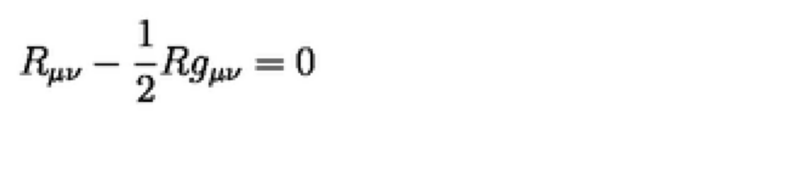

Rose- " Roger # O.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x16\xe6IDATx\x9c\xed\x9d}PT\xd7\x15\xc0\xcf\xdb\xb7o\xf7\xed\x07\xcb\x87h\xa2\x99N\xa8\xcd85\x99i\x10A\r\x1f\x160 \x02\x8a\x8ci3\x99t\x9ctZL[LZ)\xd5\x8e\x1a\x044\xd3\xa4\x8a\x93\x86\xf4\x1fk\x8311\x19c\x15R\x81\xe8\xea"\xc1\x04\xd3\xd1I\xc7t&u\x1a4mSke\x81\xfd\xfez\xfb\xde\xbb\xfd\xe3\x0c/O>\x96\xdde\xd9u\xcd\xfb\xfd\xb5\xf3v\xf7\xbes\xef}\xe7\xdes\xcf=\xf7<\x8a\x10\x02\n\n\n\xc9\x89*\xd1\x02D\x0c!\xe4\x9e\x19t\xee\xa5\xba($\x04*\xb9\x1e B\x08EQ\x89\x96"\xc6\xdc\x93\x95R\x88\x0f\xc94\x03K\x0f\xba\xc7\xe3I\xb4,\xb1\x01+BQ\xc91\x8c\x12Bx\x9eO\xb4\x14\nw\x904\n,ioNNN[[\x1b\x00\x04\x83\xc1HK\x08\x06\x83\xa2(\xce\x89|\x11\x82\xc2\xb7\xb5\xb5\xad\\\xb9\x12\x00\x04AH\x94\x0e\x0b\x82\xc0\xf3<\xcf\xf3\xc1`P\x10\x84\x10\xbf\xa4(J\xadV\xc7M0\x85pH\x9a\xb1_\x10\x84`0X]]\xed\xf3\xf9\xccf\xb3^\xaf\xa7(*|\xcbS\x10\x04\x9a\xa6\xe7T\xc8\x88 \x84\x88\xa2\xe8\xf3\xf9V\xacX\xb1p\xe1B\x8

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


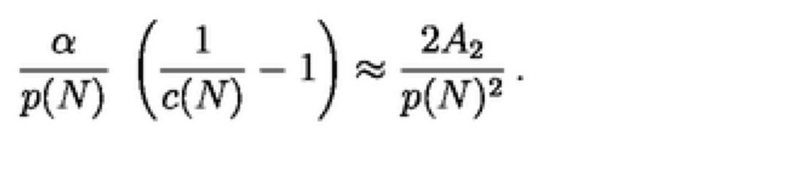

pins ( cms - 1 ) # perve.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1a7IDATx\x9c\xed\x9ckT\x14G\xf6\xc0\xab\xa7\xe7\xc1\x0c\x0c\x03**\x0f\r&\xcaF#\xf1\xc45+\xa8\xa8\x10@!\xb2\xa0\xe2\xc6G\xd4\xc4dA\x05V\x05\x91\xc72\x04\x11\xd6\x07\xa0k\xf0${V\xdd\xc4\x8dq7\x1b\x16\x11\x13P1j\xa21\xc9\xc9\xd9$\xfb\xc1s<9*&*\xa00\xcc{\xa6g\xba\xa7\xeb\xff\xe1\xee\xf4\xb60 \n\x98\xcc\xfe\xeb\xf7\x81\x03\xdd\xd5Uuo\xd7\xbdu\xebV5\x14\xc6\x18\x11\x08\x04\xefD\xf2Sw\x80@@\x03\x9cE\xc8d\xd3\x1b\xea\xe7\xa0\x14\x9e\xe7].\x97\xf8\nM\xd3\x12\tq.\x84\xff\xc2\xf3<\x19\x12\xbd\xe9\xd3\x80\xe1:EQ\x8f\xb7?\x0f\xc1\xcf\xb9\x87\x18\xe3G\xeb\xd8#?\xf8\x93\xf3\xc8=\xb7\xdb\xed\x1c\xc7)\x95J\xa9T\xda\x7fI\x93\xc9$\x97\xcb}||\x86\xaa\xe9\xff\x01<\xb84\x8c1\xc7q\x14E\xf5\xa5\x14\x8c\xb1\xcb\xe5bY\xd6\xe5r\xf5\xb6\x7f\x8c\xf1\xc0gu\x98x\x9b\x9a\x9a\xb2\xb2\xb2rrr2337n\xdc\xb8q\xe3\xc6\x8f?\xfeX\xb8\xdb\x17\xd0C\x8e\xe3\x06\xd8\xd6c\x83\xe7yP\x1d\xee\x03q\xe1\x1e\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


( Qa, Qa ) - if Fa )a - if Rabate ) Giz
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x12vIDATx\x9c\xed\x9dyl\x14\xd5\x1f\xc0\xdf\x1c{\xf4X\xba\xdb\x94C\x9b`\x05\xbc\x90\x84\xab\x14\xb6\xa6\x1c=\x84-W\xb9lS\x83X\x109\x14\xac\xa5V\x88@K\x15B\rm\xc1TC$\x91`\xb4\x1cr\xb4\xa5\xad\xa5\xf4\x16\x8a\xa6(\x12\x91\x18\xc1\xa2\xa9\x18{\xb0\xbb=\xb6{\xcd\xcc\xfb\xfd\xf1\xfd\xed\xb8\xeen\xb7\xd7nq\xf5}\xfeh\xda\xd9\xb7\xf3}of\xbe\xc7\xfb\xbe\xef\x9bR\x18cD \x10|\x13\xfaaw\x80@ \x0c\x1d\xaf+0xx\x8c1q\xf5\x04\x82\xc7\xf1\xae\x02\xf3<OQ\x94 \x08\x14EQ\x14\xe5UY\x04\xc2\x7f\x10/*\xb0\xd5je\x18\xe6\xab\xaf\xbe\xca\xce\xce6\x1a\x8dz\xbd\x9e8a\x02\xc1\xb3P^R*A\x10h\x9a\xae\xac\xac,,,<y\xf2\xa4\xc5b\x19;v\xec\xdd\xbbw\x03\x02\x02\x10B>\xe7\x8d\xff\xc9\xa6\xc7\xe7.&\xc1\x83\xb0\xde8)\xcf\xf3\x0c\xc3466.\\\xb8p\xe1\xc2\x85\xe7\xcf\x9f\xbfz\xf5\xea\xdc\xb9s\x03\x02\x020\xc64\xed{\x993\xa2$\x84\x7f&^\xf1\xc0<\xcf\xf3<\x1f\x13\x13s\xf3\xe6\xcd\xb6\xb66\xb9

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


VERVARI-R (R ),
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x13>IDATx\x9c\xed\x9b{LT\xc7\xf7\xc0\xe7\xde\xbb\xcb\xa2E^"T\xd0\xaf\x18[k]\x8c\x0f@\xd4\nE\x91w5jm\x9a&\xb61\xb5"\x05T\x14\xc5*E\x04\x9b\xfa\x8a\xf1\x19[\xadQ\xd36j\xad\n\xf5\x11@\x10\x05\xe9S\xdbZmZ\x9b\xf8J-\x92\x05\xf6\xfd\xbc\xbb\xf7\xde\xf9\xfdq\xba\xd7\xeb\x02\xcb\xe2\xda\xca\xf67\x9f?\x08\xdc{\xe7\xcc\x993sf\xce\x9c\x19(\x8c1"\x10\x08\xbe\t\xdd\xe5S\xe2\xd5}\x90>\xd8)\x18\xe3>\xa8Uw\xf8\x90\xaa\x9e\xd3\x85\x03\x0b\x82@QTw\x050\xc6\x1c\xc7=A\rx\x9e\xe7y\xde{9\xbe5\x98\x1e\x03\x8a\xa2\x04Ax\xdaZ<\x04cLQ\x94\x9b\xa1\xd2\xd7\xf0!U=\xc7\xd5\x81\x05A\xa0i\xdab\xb1t7V(\x8a\x92\xc9dOP\x03\x86a\x18\x86\xf1^\x8eo\r&\xcf\x81YI\xab\xd5\x1a\x8dF\x9a\xa6\xfb\xc8$\x05\xde\x8b\x102\x9b\xcd]\xbe\xfd\xd75\xea\xa1v\x8cqkk+BH\x10\x84>b\xc3\'\xc2#\x0e\xcc\xf3<M\xd3\x95\x95\x95\xc3\x87\x0f\xb7X,.k\x1a\xc6X\x10\x04\x83\xc1\xb0m\xdb6\x9b\xcd\x86\xbc\xee\'0eUUUuu5\xd4\xee\x8d4\xa3\xd1\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


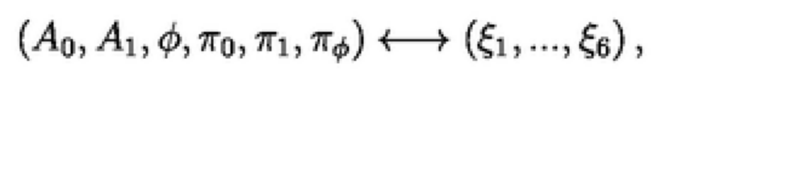

( AO,A.P. TO.T. TO ) # ( E.S
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x15\xfbIDATx\x9c\xed\x9ckpTE\x16\x80\xfb\xbe\xe6\x91\x17C\x12e\x93\x89A\xa4D\x0b\x10\xb2\x044l\x12\x8c!A\x8c\xc1lD-wu\xb7\xf8\xb1J\xb6\x02b\x82.\x9b0!$\xc8*&\xc0Z\xab\xa8\xa5\xb5\x85!"%\x92\xa8\x11Ry\x90\xb0\x98\x18v\xd1\xd2*\x95-d ++\x18\xf2\x98wf\xee\xdc\xb9\xf7\xf6\xfe8\x95\xbb\x97\x99d2y\xf0\x98\xaa\xfe~LMfnw\x9f>}N\xf7\xe9\xd3=\xa10\xc6\x88@ \x84\'\xf4\x14\xcb\x87\xee\xff7\xdbL\x811\x0eQ\xa4\x9bMr\x02A\x81\x1a\xd5:\x83\x98,EQ\xca{Y\x96i\xda\x7f\nP\x97U?<\xd6\xf3S$DQ\x03K\x05~\xebWU\x90\xe2\xd3\xcbX]\xb8\x0e\x02LN{\xd3\xd8\xf4X\xad(\x82M\xaf\x18\xc1\x1b\xf5C\x92$Y\x96Y\x96\xbdn\x960\tFw\xe0P\x00ot\xbb\xdd:\x9d.\x88[\x82\xabX\xadV\x96e\xa3\xa3\xa3G\xf5\x9c\xeb\x8c"\xc3\xf0\xf0pdd\xe4\xb8\x0f\xf7\xf5\xf5%$$\xc8\xb2LQ\xd4\r\x17\x9ep}\xb8\x16\x8b\xcd\xb5`\x14\x07\xc6\x18\xdb\xedv\x9a\xa6i\x9a\xf6\xf9|\x8a\xb9\xc3T\x14\x19\x19IQ\x94$I\x0c\xc3466\x16\x15\x15\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


E (U ) -Eo ( ) - But Ev. # MooshO,
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x141IDATx\x9c\xed\x9dyPTG\x13\xc0\xe7\x1d{\xb0,\xa8x\x8b\x961\x89Z\x89\xb1,\x0fTb\x94\x00Q\x14P#\x1ac\xd4(D41\x82\x1a\xc0#\x08~\n\xf1\x00\x8fJiY*\xd1\x8a\x9a\xd2BEP\x11\x05\xf1\x00\xc4\xa8e\x94\xaa\x18+Z\x89\xc6\x0b\x03\x08\xc8\xb2\'\xfb\x8e\xf9\xfe\xe8\xf0\xb2.\xcb\xaa\xb8\x0b\xac\x99\xdf\x1f\xd42\xbc\xdd\xd7ogz\xa6\xa7\xbb\xa7\xa10\xc6\x88@ \xb8&tK\x0b@\xf8\x072\x93\x12\x9a\x00E\xc6M3\x03_8EQ\xf6/\xb0\x7f\r\x81\x00\x90\x15\xb8Y\xe1y\x9e\xa2(\x9b\x9a\xa9\xd5j1\xc6\xa2(R\xf5\x88\xa2\xd8\xfc\x12\x12\\\x0b\xa2\xc0\xcd\n\xcb\xb2\x08!\x83\xc1 \xb5\xc0z[QQ\xf1\xc1\x07\x1fh4\x1a\x9a\xa6kjj\x1e?~l0\x18h\x9a\xf4\x0e\xe19\xb8\xf0\x10\xc1\x18\xb7*\xfb\xdf\x8e<\xd0n0\x18\x96.]:t\xe8\xd0\xd4\xd4T\x84\x10\xc7q\x08!\x9e\xe7EQLJJ\xea\xd7\xaf_\x9b6m\x8e\x1c92t\xe8\xd0\xa8\xa8\xa8\xae]\xbb\x9e={\x16!$\x08B3>\x04\xc1\xc5pU\x05\xc6\x187f\x8b\xb6\x14 \xcfs\xe7\x14\xbd^/\

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


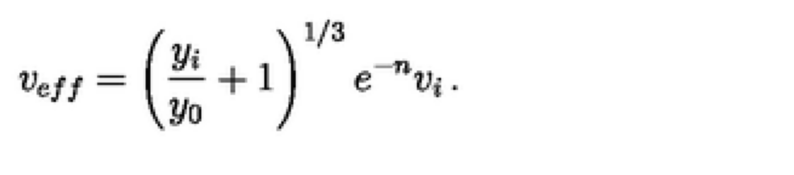

ness - ( # # I ) " " earn.
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x1a\xffIDATx\x9c\xed\x9dy\\T\xd7\xf5\xc0\xef\x9b\xf7\xde,03\x0c\xc3j\xc1\x96\xd4\xb4\xb55\xb1Zm\x15\x84\xd0\xa8\xa8,\xa6\x18\xd3\x98\xf4\x93\x92\xc6%"\xa4.\x91H\x14\x04%*\x89\x8a\x9a~\x1a\x93O\xdc\xa2\xad\xb6\xd6\xb2*\x8bD\x14\x8c[\xea\x92\x8fI5&\x01\xfd\xa4n\x04\x98\x8d\xd9g\xde{\xf7\xf7\xc7\xf9\xcd\xcbdf\x18F$\xea$\xef\xfb\x87\x1f\xe6\xcd\xbb\xef\x9es\xd7s\xcf9o$0\xc6H@@ 8\x11\xddo\x01\x06\x8e\xb0\xf4\x08\x08\x04\xe5\x04fY\x16!D\x10\xc4\xfd\x16D@\xe0>\x13\x94\x13\x98$I\x84\x90\xc1`\xb8\xdf\x82\x08\x08\xdcg\x82i\x02c\x8c9\x8e\xd3h4{\xf7\xeeMNN\x1e>|\xb8\xd9lF\x82--\xf0=&\xc8&0A\x10W\xae\\\xb9r\xe5\x8a\xd5j\xd5h4\xc2\xd4\x15\xf8\x9eC\xddo\x01\xee\x00\x91H\x84\x10\x9a0a\xc2\x84\t\x13\x14\n\xc5\x85\x0b\x17(*\x98\xe4\x17\x10\x18t\x82o\x02\xd8\xedv\x92$\xe1\x00,\xec\xc0\x02\xdfs\x82\xc9\x84\x06D"\x11EQ\xb0\x1b\x0b\x08|\xcf\x11\xa6\xc1\x00\xc1\x18\x0b\xfb\x7f\x808

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


wa-m ( 12/2,40-Ao.Ao.A.H
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00@\x08\x02\x00\x00\x00\xe4\x859I\x00\x00\x11\xccIDATx\x9c\xed\x9dilT\xd5\x17\xc0\xef{o\xdeL\xa7C\x0b\x9dBY+\x08\x88F\x83\x9a.\x80\x01,-\x14\xd9\x1aL\xd1@$1\xb8\xd1\xd4\xa6\x82\x9dF \x0c`\x0b\x88+j\x8d\x10\x94\x0f\xa6\x18\xd4\x90\xb2\xa4\x95\x8a\x94R@\xf4\x83\x10A\x13\x13\x17b@B\xe9Lg\xed\xaco\xbb\xff\x0f\xe7?\xcf\xe9Lg\xe9\xcc\xb43S\xee\xefC\xd3\xbe\xe5.\xe7\xdes\xef\xb9\xe7\x9e\xfbJa\x8c\x11\x81@HO\xe8d\x17\x800T`\x8c\xc9\xe8\x9c@RS\x9e\xf7\x96\x02\xa7`\x03DC\xc4b\x07? I\x12EQ\x14E!\x84DQ\x1c\xa2R\x11y&\x9d{H\x81\xa1\r\x92]\x8a~D\xa3\x03\xd1\x14\x9b\xa2(I\x92\xfc\xaf\xd04m6\x9b\xbb\xbb\xbb\x11B\x0c\xc3\xc4Y\xce`0\xc6r\x87N\x1d\xd2W\x9e1s\xaf(\xb0$I4M\xbb\\\xae\x80\x86I.\xd1\xe8\x00M\xd3\x0e\x87#\xa0\xd8\xfe\xdd\xd4b\xb1\xf4\xf5\xf5\xd14\r\x17EQ\x94$\xa9\xad\xadm\xe9\xd2\xa5555%%%\x1d\x1d\x1dp1Q\xc5\x06\xedE\x089\x9d\xceD\xa5\x99\x10\xd2T\x9eq\x81\xef\x01\x04A\xc0\x18\x1f?~<//\xaf\xaf\xafO\x92$I\x92\x

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# # (m-n-4 )? # (m-nk-4 )


C:\Users\csabe\AppData\Local\Temp\ipykernel_2304\2563662466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df.apply(OCR, axis=1)


In [3]:
df = df.head(100)
df["text"] = df.apply(OCR, axis=1)

In [9]:
df.shape[0]

100

In [10]:
df.to_csv('ocr_results.csv')

In [11]:
def get_patterns(ocr_results=['alma', 'korte', 'balma', 'almkortelma'], pattern_len=3):
    patterns = []    
    for res in ocr_results:
        word_len = len(res)
        start_index = 0
        print(f"checking patterns with: {res}")
        for i in range(0, word_len-1):
            end_index = i+pattern_len
            possible_pattern = res[start_index : end_index]
            if (len(possible_pattern) != pattern_len):
                break
            print(f"\tpossible_patter: {possible_pattern}, indexes: {start_index}:{end_index}")
            
            #compare with other results
            for other_result in ocr_results:
                if (possible_pattern in other_result and other_result != res):
                    patterns.append(possible_pattern)
            start_index += 1
        print()
    print(f"results: {patterns}")
    return patterns

def filter_patterns(patterns, min_occurance=3):
    pattern_ocs = []
    values = {}
    
    for pattern in patterns:
        counter = -1
        for other in patterns:
            if (other == pattern):
                counter += 1
        if (counter >= min_occurance):
            values = {}
            values["pattern"] = pattern
            values["counter"] = counter
            pattern_ocs.append(values)
    return pattern_ocs

In [16]:
possible_patterns = get_patterns(ocr_results=df['text'].to_list(), pattern_len=3)

checking patterns with: shape # An year
	possible_patter: sha, indexes: 0:3
	possible_patter: hap, indexes: 1:4
	possible_patter: ape, indexes: 2:5
	possible_patter: pe , indexes: 3:6
	possible_patter: e #, indexes: 4:7
	possible_patter:  # , indexes: 5:8
	possible_patter: # A, indexes: 6:9
	possible_patter:  An, indexes: 7:10
	possible_patter: An , indexes: 8:11
	possible_patter: n y, indexes: 9:12
	possible_patter:  ye, indexes: 10:13
	possible_patter: yea, indexes: 11:14
	possible_patter: ear, indexes: 12:15

checking patterns with: ( Ladies #O, ( LaHickshire # O.
	possible_patter: ( L, indexes: 0:3
	possible_patter:  La, indexes: 1:4
	possible_patter: Lad, indexes: 2:5
	possible_patter: adi, indexes: 3:6
	possible_patter: die, indexes: 4:7
	possible_patter: ies, indexes: 5:8
	possible_patter: es , indexes: 6:9
	possible_patter: s #, indexes: 7:10
	possible_patter:  #O, indexes: 8:11
	possible_patter: #O,, indexes: 9:12
	possible_patter: O, , indexes: 10:13
	possible_patter: , (, in

In [23]:
patterns = filter_patterns(patterns=possible_patterns, min_occurance=5)
print(patterns)
pattern_df = pd.DataFrame.from_records(patterns)
pattern_df = pattern_df.drop_duplicates()
pattern_df.to_csv("patterns.csv", index=False)

pattern_df

[{'pattern': 'e #', 'counter': 41}, {'pattern': 'e #', 'counter': 41}, {'pattern': 'e #', 'counter': 41}, {'pattern': 'e #', 'counter': 41}, {'pattern': 'e #', 'counter': 41}, {'pattern': 'e #', 'counter': 41}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': ' # ', 'counter': 1701}, {'pattern': 

pattern  counter
0        e #       41
6         #      1701
43       # A        5
45       ear        5
47        (      1547
...      ...      ...
3619     te         5
3859     - O        5
3861     .S.       23
3909     # D        5
4487     s (        5

[61 rows x 2 columns]